In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from conf_ensemble_dataset import PlatinumConfEnsembleDataset
from litschnet import LitSchNet
from collections import defaultdict
from rdkit import Chem
from torch_geometric.loader import DataLoader

In [2]:
platinum_dataset = PlatinumConfEnsembleDataset('data')

Creating molecule encoders


100%|█████████████████████████████████████████████| 8/8 [00:02<00:00,  3.83it/s]
Processing...
100%|███████████████████████████████████████| 4548/4548 [08:17<00:00,  9.15it/s]
Done!


In [3]:
litschnet = LitSchNet.load_from_checkpoint(checkpoint_path="lightning_logs/scaffold_wo_plat/checkpoints/epoch=22-step=52393.ckpt")

In [4]:
litschnet.to('cuda')
litschnet.eval()

LitSchNet(
  (schnet): SchNet(hidden_channels=128, num_filters=128, num_interactions=6, num_gaussians=50, cutoff=10.0)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
)

In [5]:
def group_data_by_smiles(data_list) :
    d = defaultdict(list)
    for data in data_list :
        d[Chem.MolToSmiles(data.mol)].append(data)
    return d

In [6]:
data_dict = group_data_by_smiles(platinum_dataset)

In [17]:
data_dict['CCC(C)C(NC(=O)C(CC(=O)N[O-])Cc1ccccc1)C(=O)NC(CC(C)C)C(=O)[O-]'][0].x

tensor([[6., 1., 0.,  ..., 0., 0., 0.],
        [6., 1., 0.,  ..., 0., 0., 0.],
        [6., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [6., 1., 0.,  ..., 0., 0., 0.],
        [6., 1., 0.,  ..., 0., 0., 0.],
        [6., 1., 0.,  ..., 0., 0., 0.]])

CCC(C)C(NC(=O)C(CC(=O)N[O-])Cc1ccccc1)C(=O)NC(CC(C)C)C(=O)[O-]
tensor(4.9023)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([51, 1])) that is different to the input size (torch.Size([51])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


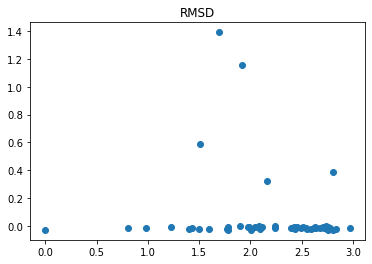

CC(C)Cn1c(=O)n(C)c(=O)c2c(-c3ccncc3)n(Cc3cccc4ccccc34)nc21
tensor(3.7591)


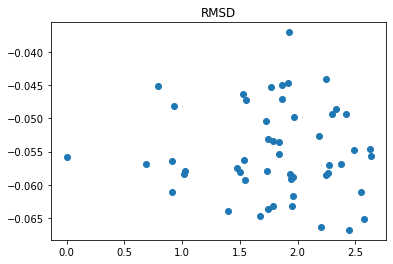

CNC(=O)c1c(C)oc2cc(Oc3ccnc4cc(OCC[NH+]5CCOCC5)ccc34)ccc12
tensor(5.8143)


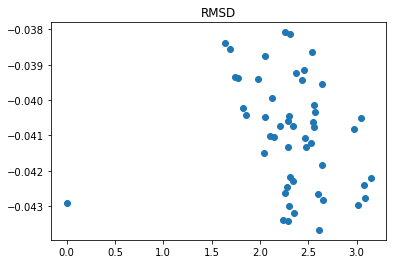

CC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)OC1COC2OCCC12)S(=O)(=O)c1ccc(N)cc1
tensor(9.6512)


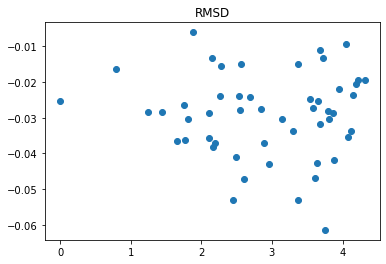

O=[N+]([O-])c1cc(C(F)(F)F)ccc1NCc1ccsc1
tensor(1.7430)


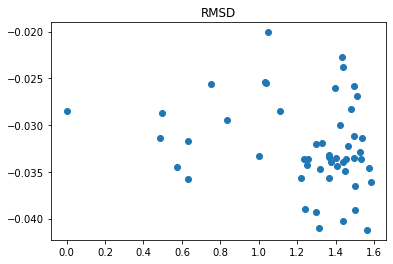

O=C([O-])c1cc2cc3ccc4oc(C(=O)[O-])cc4c3cc2o1
tensor(0.0110)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


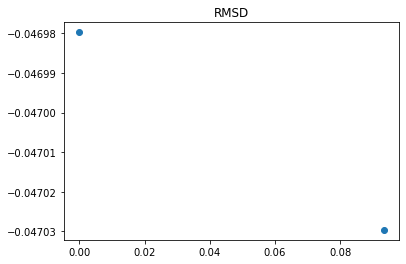

O=[N+]([O-])c1cc(C(F)(F)F)ccc1NCc1ccco1
tensor(1.4929)


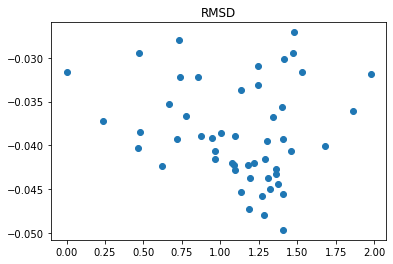

Cc1cc(C(N)=O)ccc1-n1c(CCC(=O)[O-])ccc1-c1ccc(-n2ccnc2)cc1
tensor(0.6309)


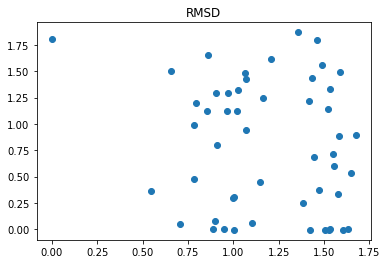

CNC(=O)C(NC(=O)C(CCCc1ccccc1)C(C)N([O-])C=O)C(C)(C)C
tensor(2.2954)


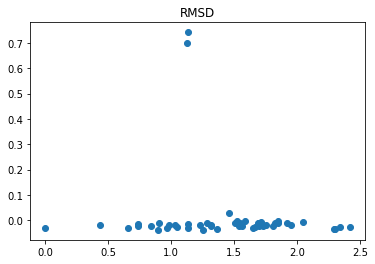

O=C([O-])COc1c(C(=O)[O-])sc(-c2cccc(NC3CCCCC3)c2)c1Br
tensor(3.6472)


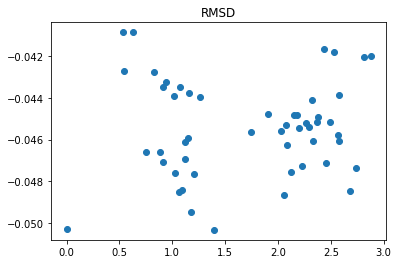

Cc1cc(Nc2nn(C(C)C)c(=O)c3cc(N4CC[NH+](C)CC4)ccc23)n[nH]1
tensor(0.7471)


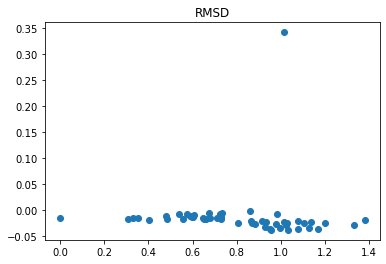

NC(=O)c1sc(Nc2ccccc2)nc1N
tensor(0.9803)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([38, 1])) that is different to the input size (torch.Size([38])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


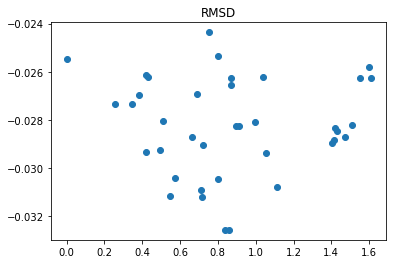

CC(CCc1ccc(-c2ccc(OCCC[NH+]3CCOCC3)cc2)cc1)(C(=O)N[O-])S(C)(=O)=O
tensor(1.3551)


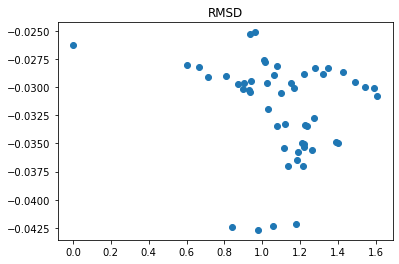

NC(=O)c1ccc(C(=O)Nc2cc(C3CC3)[nH]n2)cc1
tensor(0.9386)


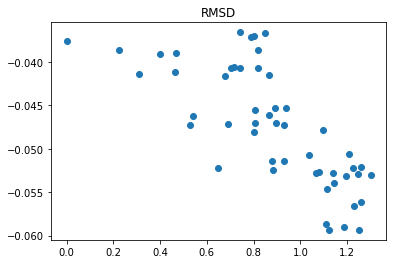

CC/C(O)=C(\C#N)C(=O)Nc1ccc(-c2ccc(F)cc2)c(C(=O)OC)c1
tensor(2.0989)


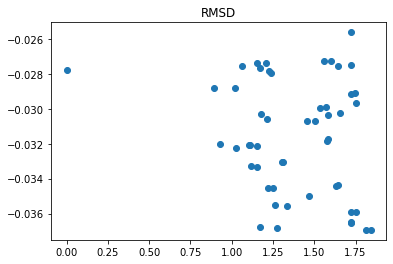

COc1cc2nccc(Oc3ccc(NC(=O)c4c(C)n(C)n(-c5ccccc5)c4=O)cc3F)c2cc1OC
tensor(5.1778)


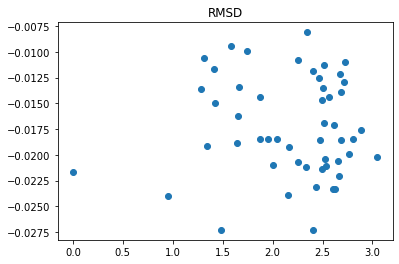

Nc1nc(Nc2ccc(S(N)(=O)=O)cc2)sc1C(=O)c1ccccc1
tensor(3.4333)


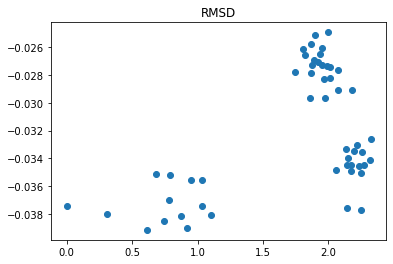

COc1ccc2c(Oc3ccc(NC(=O)c4c(C)n(CC(C)O)n(-c5ccccc5)c4=O)cc3F)ccnc2c1
tensor(4.2718)


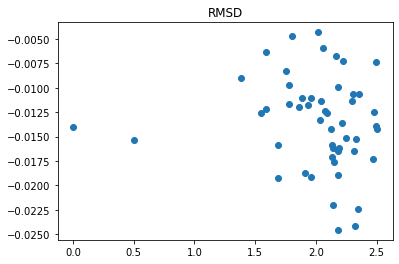

CC(=O)Nc1cc(Oc2ccc3c(c2)CCN3C(=O)Nc2ccc(C[NH+]3CC[NH+](C)CC3)c(C(F)(F)F)c2)ncn1
tensor(6.8239)


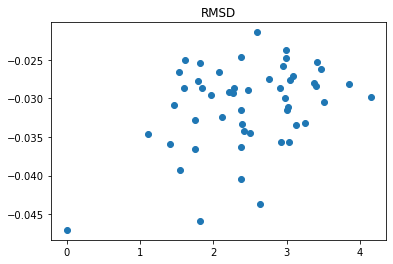

Cc1ccc(NC(=O)/C=C/c2ccccc2)cc1C(=O)Nc1cnc2[nH]c(-c3ccccc3)nc2c1
tensor(2.2879)


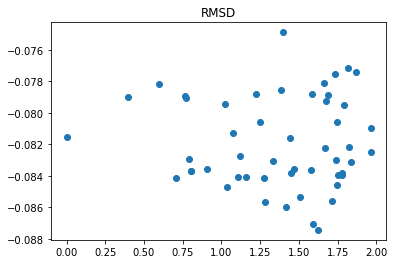

COc1cccc(C(=O)c2sc(Nc3ccc(S(N)(=O)=O)cc3)nc2N)c1
tensor(4.4269)


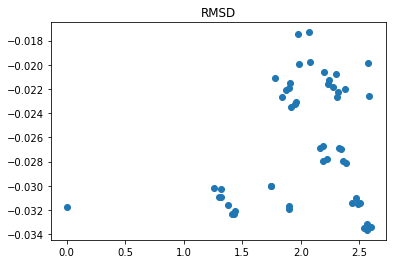

Nc1cc(Cn2c(C(=O)[O-])c(-c3ccc[nH]c3=O)c3cc(C(F)(F)F)ccc32)ccn1
tensor(2.6682)


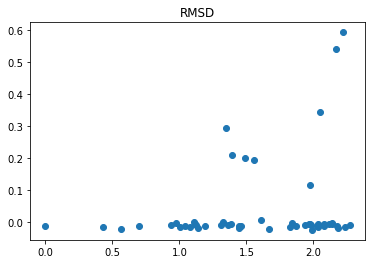

Nc1cc(Cn2c(C(=O)[O-])c(-n3c(=O)[nH]c4cscc4c3=O)c3cc(C(F)(F)F)ccc32)ccn1
tensor(3.1702)


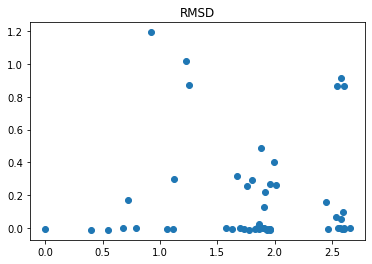

O=C1NCC2(CC[NH2+]CC2)c2[nH]c(-c3ccnc(-c4ccc5c(c4)OCO5)n3)cc21
tensor(4.2727)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([9, 1])) that is different to the input size (torch.Size([9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


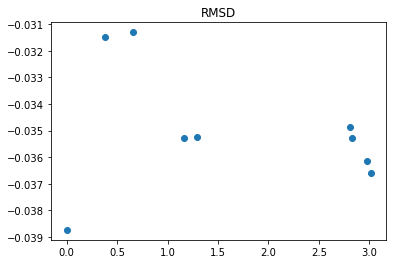

CC(C)c1onc(-c2c(Cl)cccc2Cl)c1COc1ccc(/C=C/c2cccc(C(=O)[O-])c2)c(Cl)c1
tensor(3.4603)


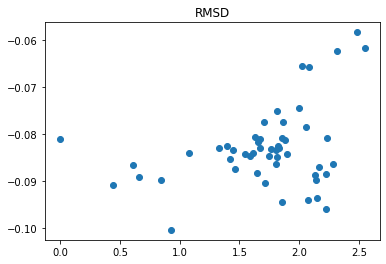

CC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)OC1COC2OCCC12)S(=O)(=O)c1ccc2c(c1)OCO2
tensor(11.2237)


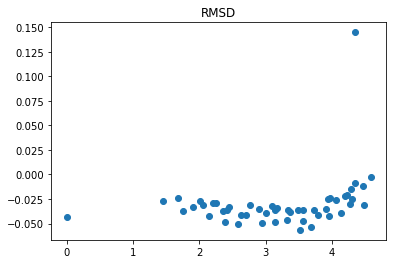

CC(=O)c1ccc(-c2ccc(CCC(O)CC(=O)[O-])cc2)cc1
tensor(1.6047)


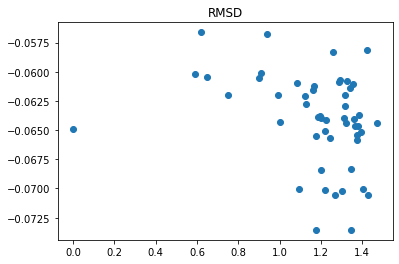

Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2cccc(Nc3ccc4c(c3)CCCCC4=O)c2)cc1
tensor(4.4165)


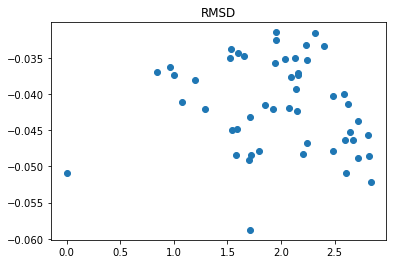

Cc1c2c(n3c1CCC[NH+]1CCCC1CNc1cc-3ccc1C(N)=O)CC(C)(C)CC2=O
tensor(0.2482)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


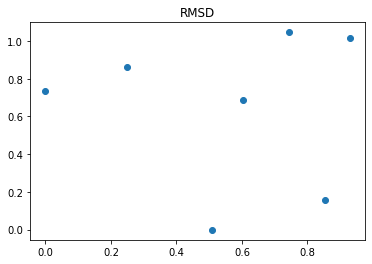

C[n+]1ccc(CNC(=O)C2CCCN2C(=O)C([NH3+])Cc2ccccc2)cc1
tensor(3.4671)


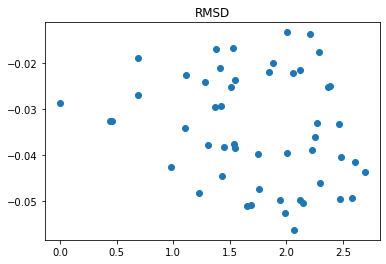

Cc1c2c(n3c1CCN(C(=O)C(C)[NH3+])CC(C)C(C)Nc1cc-3ccc1C(N)=O)CC(C)(C)CC2=O
tensor(4.9465)


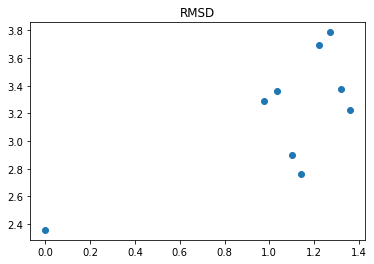

Nc1nc(Nc2cccc(F)c2)sc1C(=O)c1ccccc1
tensor(3.3176)


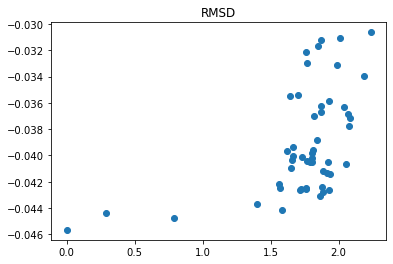

CC(C)C(NC(=O)COc1ccccc1)C(=O)NC(Cc1ccccc1)C(O)C1OC1Cc1ccccc1
tensor(12.9055)


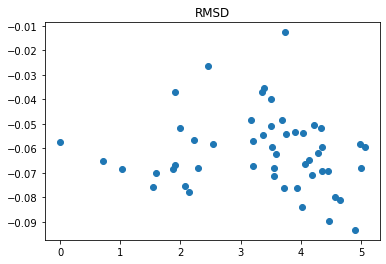

O=C([O-])CC(O)CCc1ccc(-c2ccccc2)cc1
tensor(1.3846)


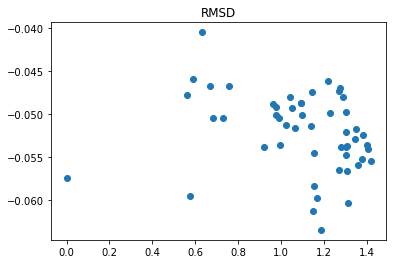

CC(C)C(NC(=O)COc1ccccc1)C(=O)NC(Cc1ccccc1)C(O)C([NH3+])C(O)Cc1ccccc1
tensor(11.0883)


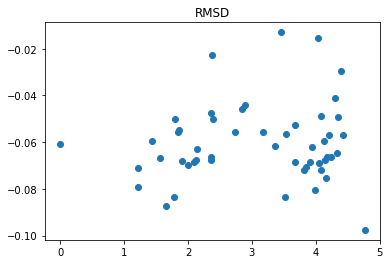

Cc1[nH]c(C(=O)NC2CCN(c3ncc(C(=O)[O-])s3)CC2F)c(Cl)c1Cl
tensor(2.6848)


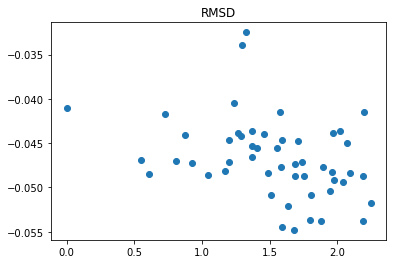

CC(C)([NH3+])CNc1nc(-c2ccncc2)cc2cnccc12
tensor(0.8711)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([17, 1])) that is different to the input size (torch.Size([17])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


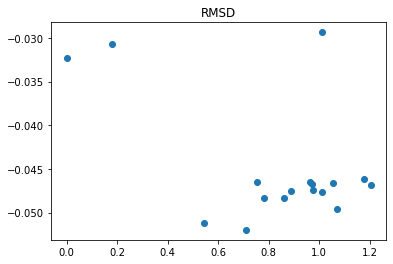

C=C(C)C1CC=C(C)C(=O)C1
tensor(0.1845)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


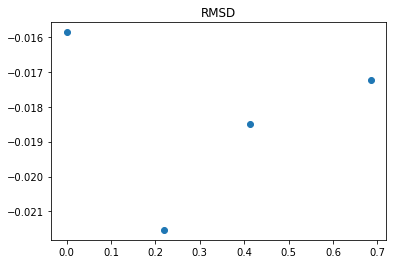

COc1ccc2c(-n3c(=O)n(Cc4cccc(C5(C)OC(=O)NC5=O)c4)c4ccccc43)noc2c1
tensor(5.7607)


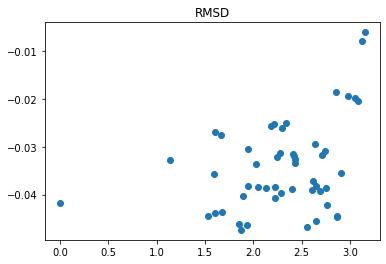

NC(=O)c1ccc(-c2nc(-c3ccccn3)c(-c3ccc4c(c3)OCO4)[nH]2)cc1
tensor(1.3592)


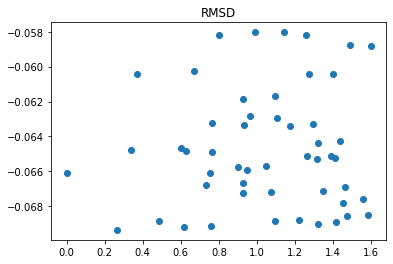

Cc1[nH]c(C(=O)NC2CCN(c3cc(C(N)=O)cc(Cl)n3)CC2)c(Cl)c1Cl
tensor(2.8384)


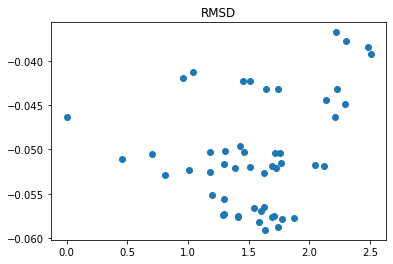

Cc1[nH]c(C(=O)NC2CCN(c3ncccc3[N+](=O)[O-])CC2)cc1Br
tensor(1.4020)


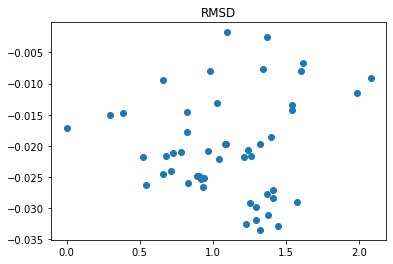

COc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1
tensor(0.1965)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


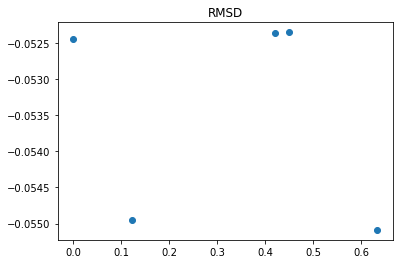

Nc1cc(Cn2c(C(=O)[O-])c(-c3ccc[nH]c3=O)c3cc(Cl)ccc32)ccn1
tensor(2.2378)


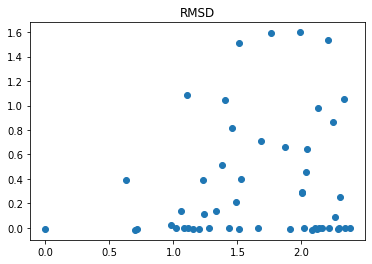

Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NC2
tensor(1.1548)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


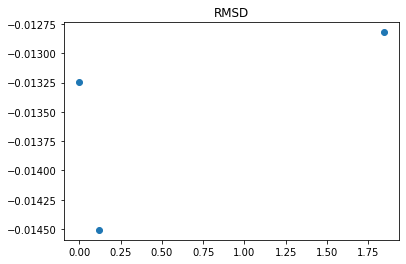

Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2
tensor(2.0948)


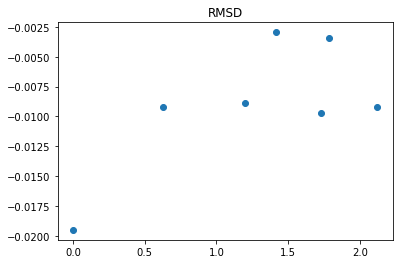

Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NN2C
tensor(0.0844)


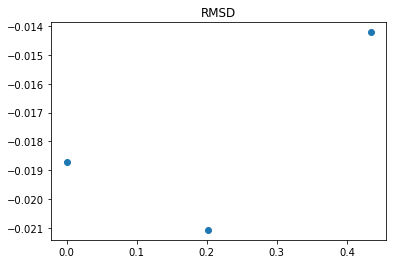

CNC(=O)c1cn(-c2cc3c(=O)n(NS(C)(=O)=O)c(=O)[nH]c3cc2C(F)(F)F)cn1
tensor(1.8127)


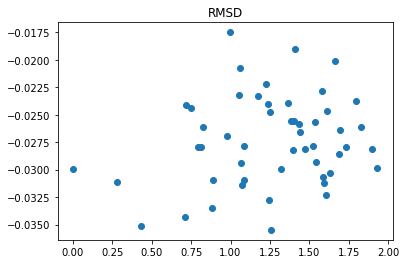

NC(=O)c1ccc(Nc2nc(N)c(C(=O)c3cccnc3)s2)cc1
tensor(3.9637)


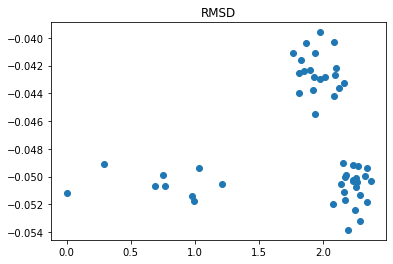

CNC(=O)C(NC(=O)C(CC(C)C)C(O)C(=O)N[O-])C(C)(C)C
tensor(1.5564)


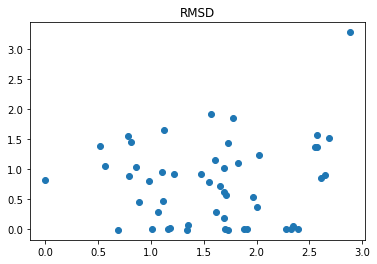

O=C(CC(Cc1cccc(O)c1)C(=O)NC1c2ccccc2CC1O)N[O-]
tensor(3.8567)


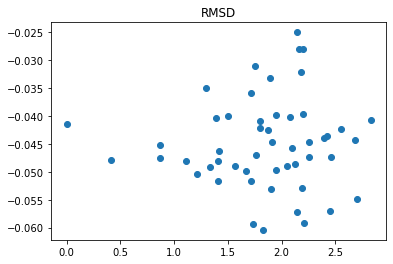

O=C(OCc1ccccc1)C1CC2(C[NH2+]1)C(=O)Nc1ccccc12
tensor(2.3079)


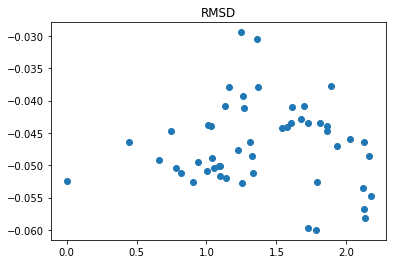

O=C(OC1CCSc2ccc(Br)cc21)C1CC2(C[NH2+]1)C(=O)Nc1ccccc12
tensor(2.7216)


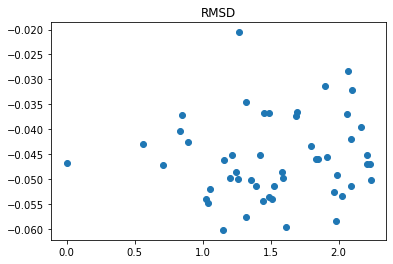

N#CC1(OC(=O)C2CC3(C[NH2+]2)C(=O)Nc2ccccc23)CCCCC1
tensor(3.2630)


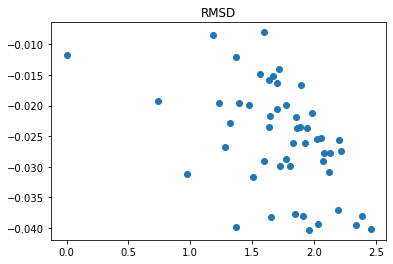

N#Cc1ccc(COC(=O)C2CC3(C[NH2+]2)C(=O)Nc2ccccc23)cc1Br
tensor(2.8208)


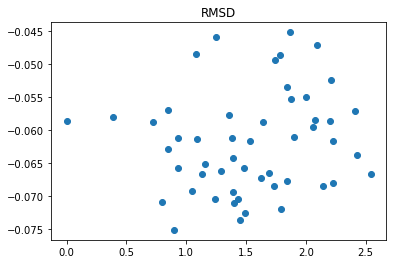

O=C(Nc1ccccc1N1CC[NH2+]CC1)c1csc(-c2ccc3c(c2)CCO3)n1
tensor(4.0765)


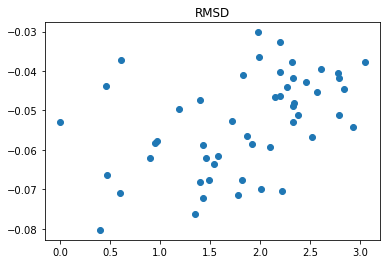

CCn1c(=O)c(-c2cc(C(=O)NC3CC3)ccc2C)cc2nnc(-c3c(F)cccc3Cl)n21
tensor(3.7724)


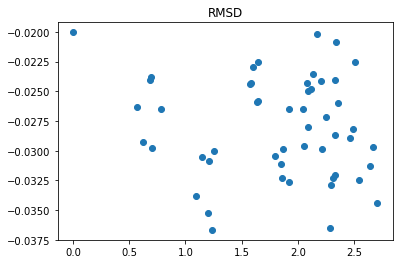

O=C(Cc1ccc(OC(F)(F)F)cc1)Nc1cc(C2CC2)[nH]n1
tensor(1.8478)


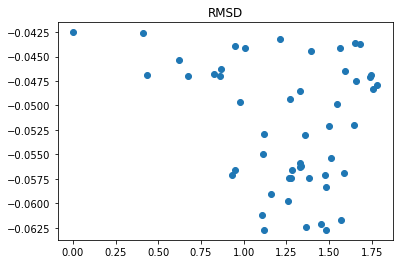

O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(=O)C2CC2)CC1
tensor(5.2731)


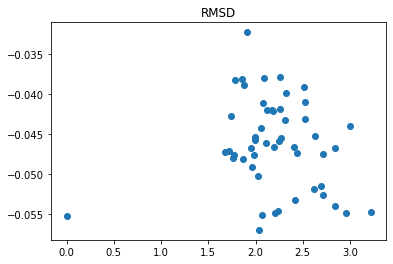

CC(C)Nc1nc(N)c(C(=O)c2cccnc2)s1
tensor(2.2627)


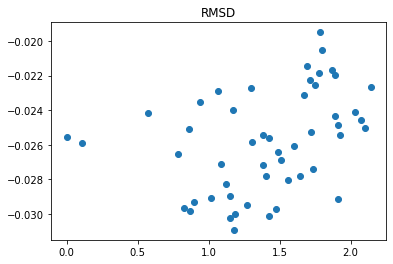

COc1ccc(CC([NH3+])C(=O)[O-])cc1
tensor(1.4273)


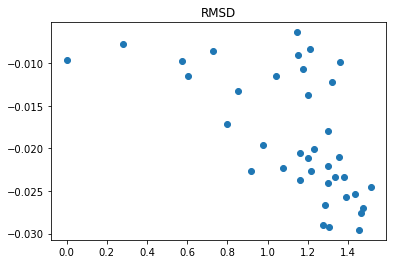

COc1cccc(-c2cccc(C3CC3c3cc(=O)n(C)c(N)n3)c2)c1
tensor(4.2691)


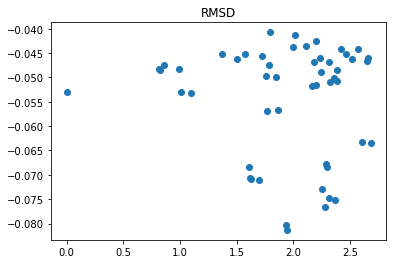

CN1C(=O)CC(C)(CCc2ccccc2)N=C1N
tensor(1.3702)


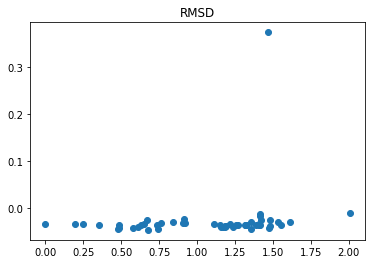

O=C([O-])c1ccc(Nc2nccc(Nc3ccccc3)n2)cc1
tensor(2.9183)


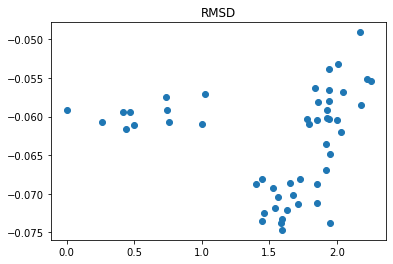

O=C([O-])c1ccc(Nc2nccc(Nc3ccccc3Cl)n2)cc1
tensor(3.8752)


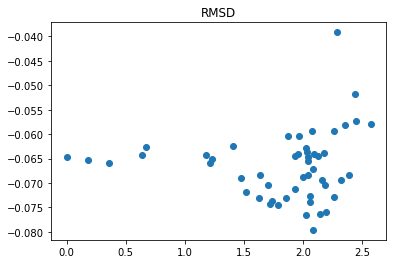

CS(=O)(=O)NC(=O)c1c(-c2ccc[nH]c2=O)c2c3c(ccc2n1Cc1cc(F)ccc1F)CCO3
tensor(1.3084)


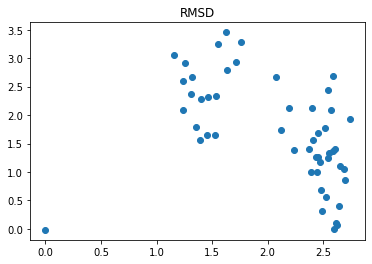

O=C([O-])c1ccc(Nc2nccc(Nc3ccccc3OC(F)(F)F)n2)cc1
tensor(4.6989)


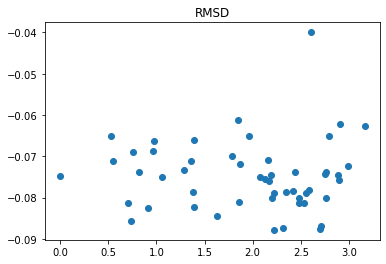

CC(=[NH2+])N1CCC(Oc2cc(C(=O)[O-])c3cc(C(C)C)n(Cc4ccc5ccc(C(N)=[NH2+])cc5c4)c3c2)CC1
tensor(6.1286)


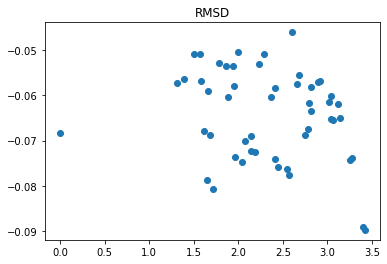

CC(=[NH2+])N1CCC(Oc2ccc(N(Cc3ccc4ccc(C(N)=[NH2+])cc4c3)S(=O)(=O)CC(=O)[O-])cc2)CC1
tensor(5.5124)


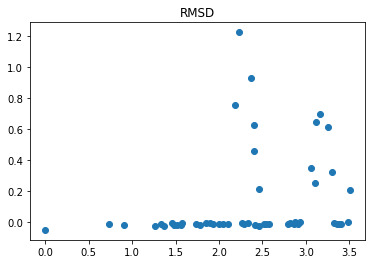

O=P([O-])([O-])OP(=O)([O-])OCCCCO
tensor(2.6975)


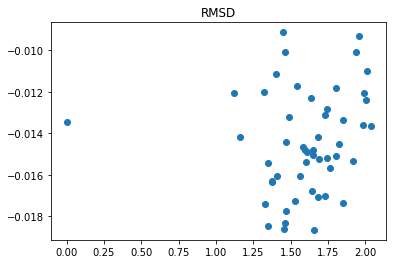

CC(=O)CCCOP(=O)([O-])OP(=O)([O-])[O-]
tensor(3.4353)


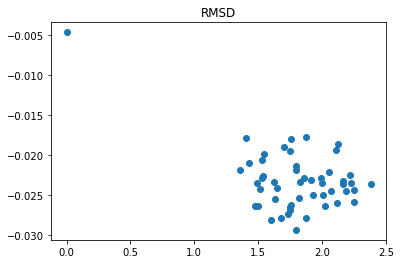

Nc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCCCC2)n1
tensor(1.4620)


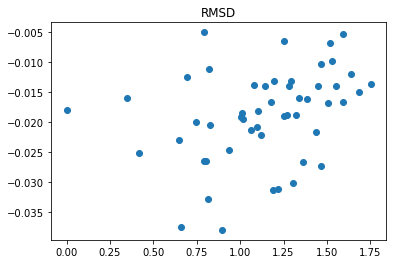

C=C=CCOP(=O)([O-])OP(=O)([O-])[O-]
tensor(1.9303)


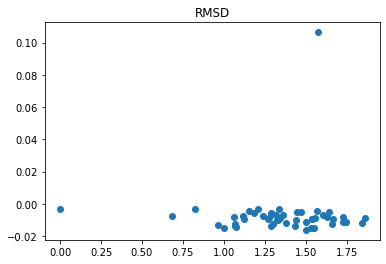

C=C1/C(=C\C=C2/CCCC3(C)C2CCC3C2(C)CC(CC(C)(C)O)CO2)CC(O)CC1O
tensor(1.8768)


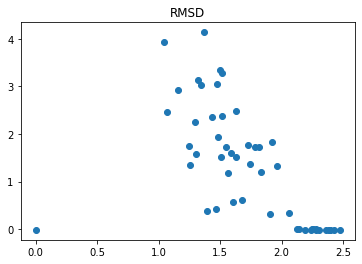

Oc1ccc(C(c2ccc(O)cc2)(C(F)(F)F)C(F)(F)F)cc1
tensor(0.0274)


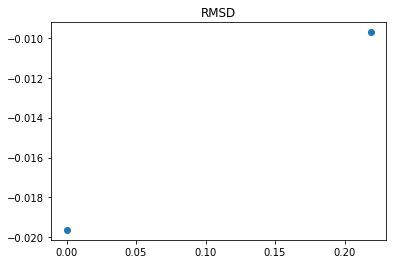

O=C1NC(=O)C(c2ccccc2)(C2(c3ccccc3)NC(=O)NC2=O)N1
tensor(2.9097)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([11, 1])) that is different to the input size (torch.Size([11])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


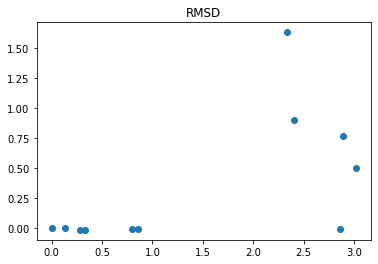

Cn1c(=O)[nH]c2ncc(-c3ccccc3)cc21
tensor(0.1596)


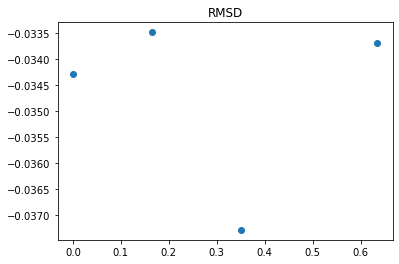

NC(Cc1cccc(Cl)c1)C(=O)N1CCN(C(=O)c2cc(F)ccc2F)CC1
tensor(4.7069)


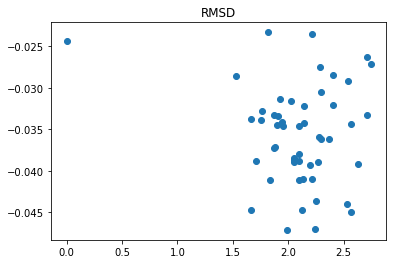

Cn1c(=O)[nH]c2ncc(-c3cccc(C(N)=O)c3)cc21
tensor(1.6170)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


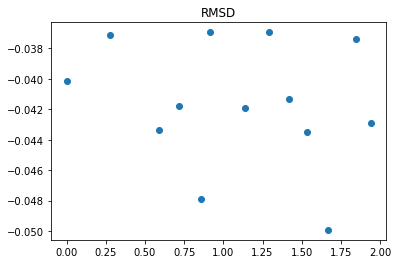

Cc1cn(C2CC(O)C(CF)O2)c(=O)[nH]c1=O
tensor(1.1461)


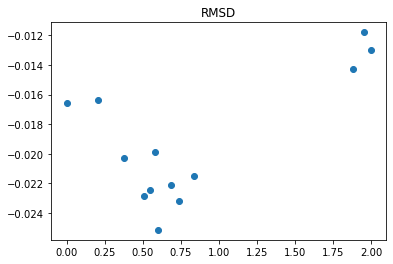

CC(C)(CO)C1Cc2[nH]c(=O)c3ccccc3c2CO1
tensor(0.8055)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


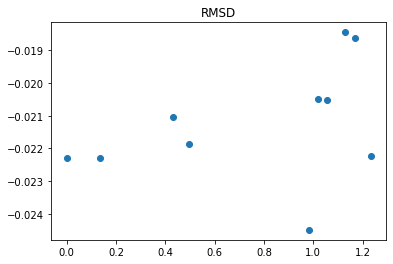

Oc1ccc(Cl)cc1-c1cc[nH]n1
tensor(0.4489)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


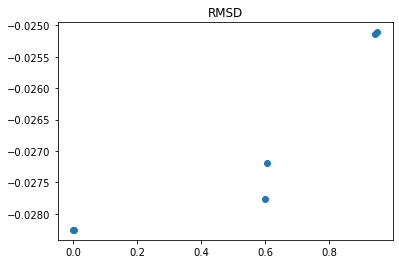

NC(=O)c1ccc2cccc(O)c2n1
tensor(0.2957)


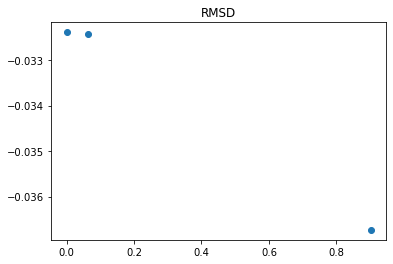

O=C(c1ccco1)c1c[nH]c2ccccc12
tensor(0.3934)


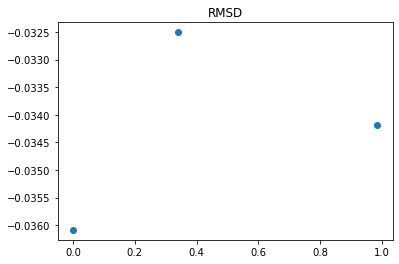

CC(C)=CCC/C(C)=C(\F)COP(=O)([O-])OP(=O)([O-])[O-]
tensor(2.8878)


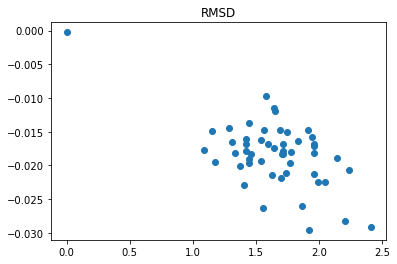

Cc1cn(C2CC(O)C(COP(=O)([O-])OP(=O)([O-])OC3OC(C)C([NH3+])C(O)C3O)O2)c(=O)[nH]c1=O
tensor(5.5193)


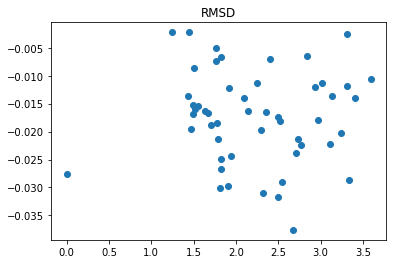

CCC(O)(CC)c1ccc2c(-c3ccc(OC)cc3)c(-c3n[nH]c4ccsc34)[nH]c2c1
tensor(1.2977)


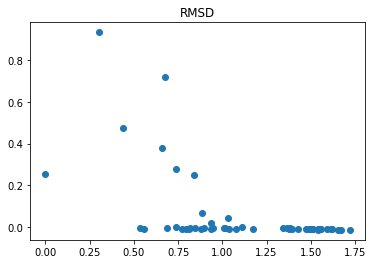

CCC(O)(CC)c1ccc2cc(-c3n[nH]c4cc(-c5ccccc5)sc34)[nH]c2c1
tensor(1.4435)


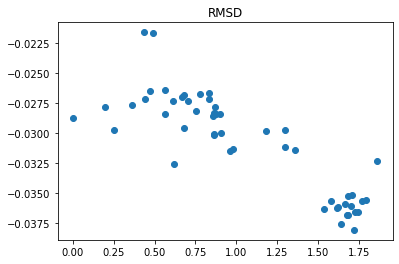

Nc1ccn(C2CSC(COP(=O)([O-])OP(=O)([O-])[O-])O2)c(=O)n1
tensor(2.3104)


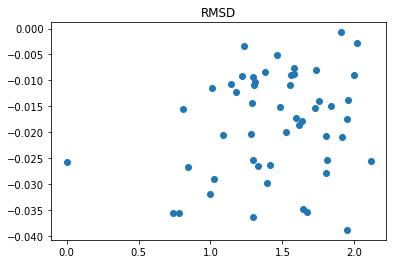

C/C=C(\Oc1cccc(C(=O)[O-])c1O)C(=O)[O-]
tensor(1.8435)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([36, 1])) that is different to the input size (torch.Size([36])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


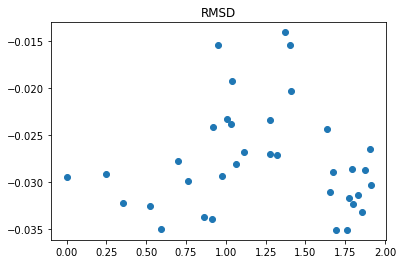

Cc1cc(N)[nH+]c(-c2ccc(C[NH2+]CCc3cccc(F)c3)cc2)c1
tensor(4.1923)


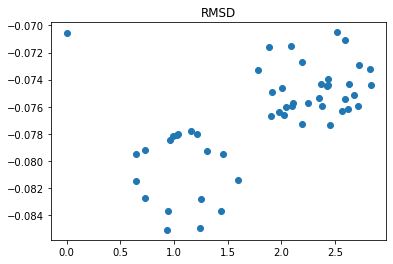

CCC[NH+]1CCCC12CCN(C(C)C(=O)NC(Cc1ccccc1)C(O)C[NH2+]Cc1cccc(C(C)C)c1)C2=O
tensor(9.1226)


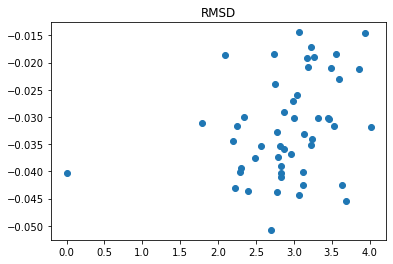

CCCOc1sc(C(=O)N2C3CCC2CC(c2cc(C[NH3+])ccc2F)C3)c(C)c1Br
tensor(4.1251)


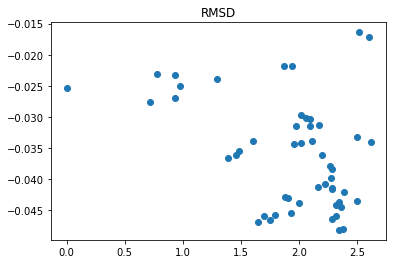

O=C([O-])/C=C(\C=C(/O)C(=O)[O-])C(=O)[O-]
tensor(0.8917)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([27, 1])) that is different to the input size (torch.Size([27])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


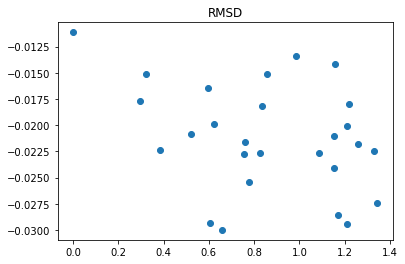

COc1ccc2ncnc(Nc3ccn(C)n3)c2c1
tensor(1.3818)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([47, 1])) that is different to the input size (torch.Size([47])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


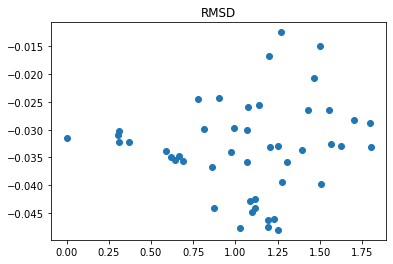

COc1ccc(C[NH2+]CCS(=O)(=O)[O-])cc1
tensor(1.5062)


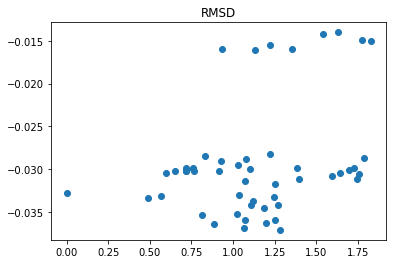

O=C(NCCc1ccccc1)Nc1ccc2[nH]ncc2c1
tensor(2.1841)


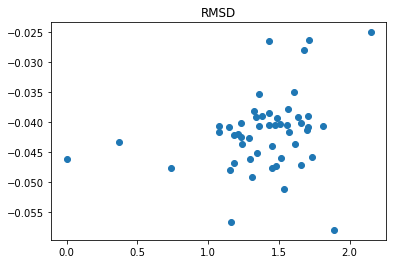

COc1ccc2ccc(S(=O)(=O)N(Cc3ccsc3)C3CCN(Cc4csc(C(N)=[NH2+])c4)C3=O)cc2c1
tensor(6.2701)


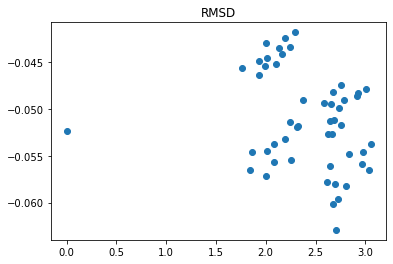

[NH3+]Cc1ccc(NC(=O)c2c(O)ccc[n+]2Cc2nccn2Cc2ccccc2)cc1
tensor(7.4573)


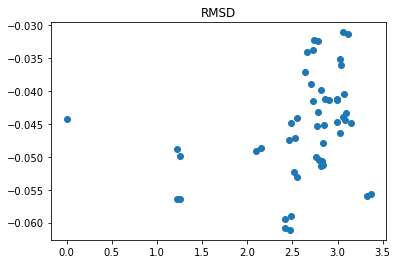

O=C([O-])c1ccc2c(c1)OCO2
tensor(0.0057)


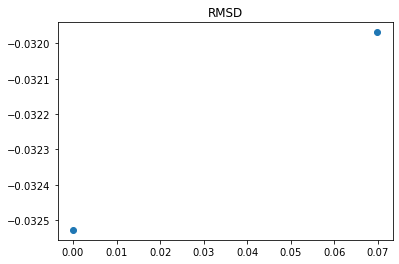

O=C([O-])c1cccc(Nc2ccc([N+](=O)[O-])c3ccccc23)c1
tensor(1.9214)


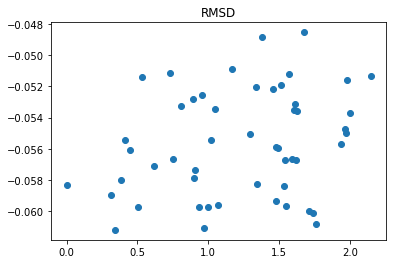

CC(CC(=O)[O-])c1n[nH]c2nc(N)[nH]c(=O)c2c1=O
tensor(1.2127)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([21, 1])) that is different to the input size (torch.Size([21])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


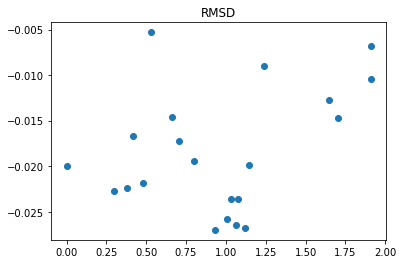

C[NH+]1CCN(c2cnc3cc(C(F)(F)F)cc(NCc4cccc([N+](=O)[O-])c4)c3c2)CC1
tensor(3.6068)


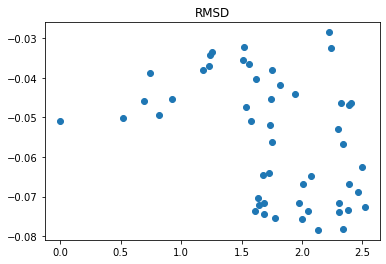

O=C(Nc1cccc(-c2nnn[n-]2)c1)c1ccc2n[nH]cc2c1
tensor(1.2979)


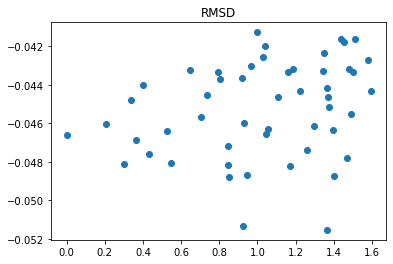

O=C(Nc1cccc(-c2nnn[n-]2)c1)c1cccc(-c2ncccn2)c1
tensor(3.1653)


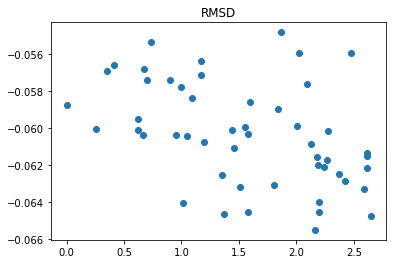

O=[N+]([O-])c1cccc(CNc2nc(C(F)(F)F)nc3ncc(-c4cnn(C5CC[NH2+]CC5)c4)cc23)c1
tensor(4.8246)


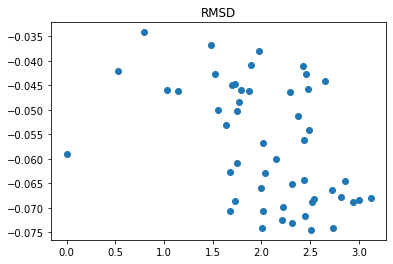

N#CC1(c2cccc(C(=O)Nc3cc(Oc4ccc5nc(NC(=O)C6CC6)sc5n4)ccc3F)c2Cl)CC1
tensor(7.3252)


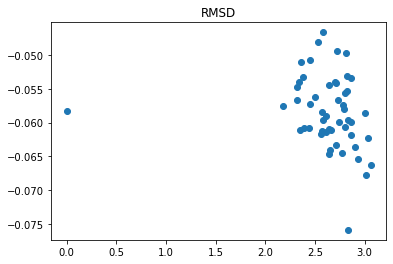

O=C(Nc1cccc(-c2nnn[n-]2)c1)c1cccc2[nH]cnc12
tensor(2.2178)


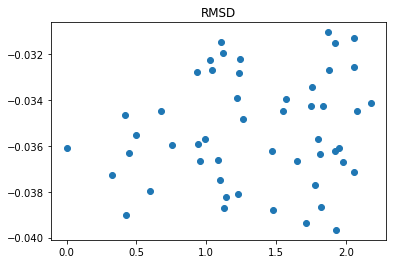

O=C([O-])C1COc2ccccc2O1
tensor(0.5138)


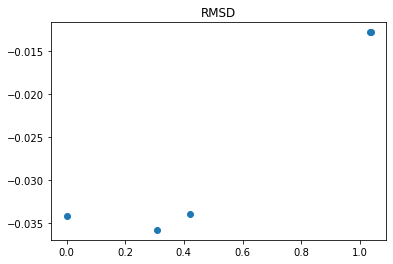

CCOc1cc2[nH]c(-c3n[nH]cc3NC(=O)N(CC)CC)nc2cc1F
tensor(2.2169)


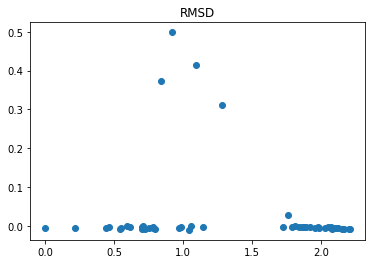

COc1cc(Nc2nccc(N3CCCC(C(=O)NCc4ccc(C)cc4)C3)n2)cc(OC)c1OC
tensor(5.9190)


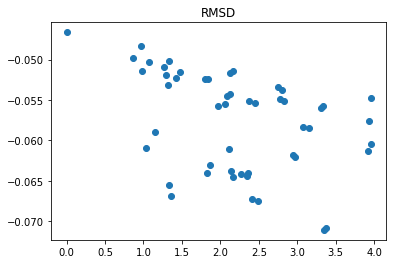

COc1cnc2c(NCc3nnc4ccc(-c5cc(C)ns5)nn34)ccnc2c1
tensor(6.0052)


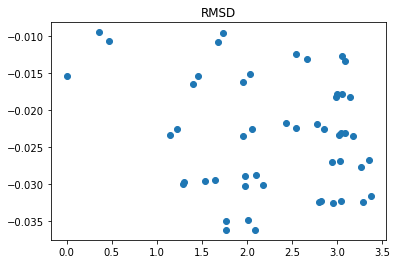

C=C(/N=C/c1c(COP(=O)([O-])[O-])cnc(C)c1O)C(=O)[O-]
tensor(1.4177)


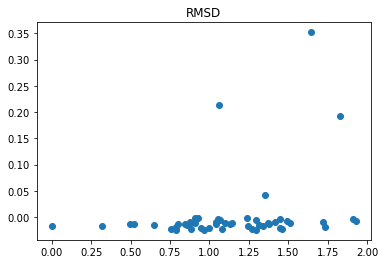

O=P([O-])([O-])OP(=O)([O-])OCC/C=C/O
tensor(2.0194)


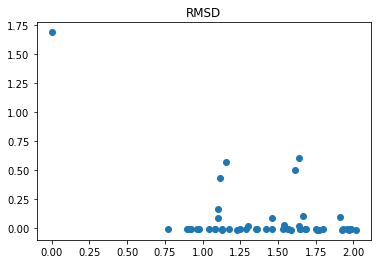

CS(=O)(=O)Nc1cccc(-c2cnc(N)c(C(=O)NCC3CC[NH2+]CC3)n2)c1
tensor(6.9586)


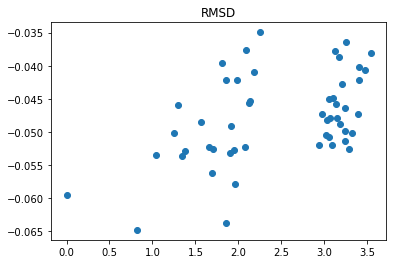

COC(C)C(=O)NC(Cc1cccc(-c2nccs2)c1)C(O)C[NH2+]C1CC2(CCC2)Oc2ncc(CC(C)(C)C)cc21
tensor(8.3840)


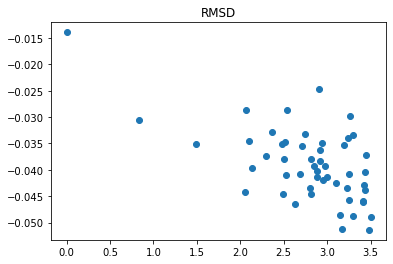

O=C(COc1ccccc1P(=O)([O-])[O-])NC1CCCC1
tensor(1.7224)


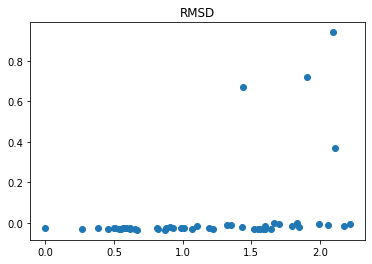

Cc1cc(C(=O)Nc2cccc(Oc3ccc4nc(NC(=O)C5CC5)cn4n3)c2)n(C)n1
tensor(5.5177)


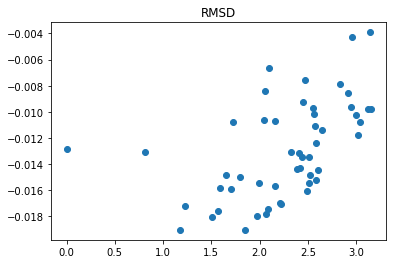

O=C(COc1ccccc1P(=O)([O-])[O-])NC1CCCCC1
tensor(2.2396)


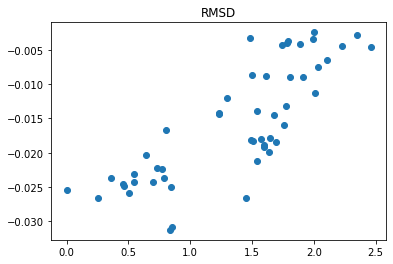

O=C(COc1ccccc1P(=O)([O-])[O-])Nc1cccc(Cl)c1Cl
tensor(3.5212)


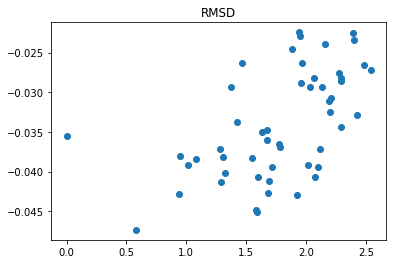

CCC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)OCC1CCC(=O)N1)S(=O)(=O)c1ccc2ncsc2c1
tensor(13.3987)


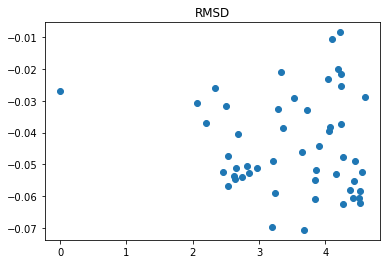

Nc1ccn(C2CC(O)C(COP(=O)([O-])NP(=O)([O-])OP(=O)([O-])[O-])O2)c(=O)n1
tensor(3.5490)


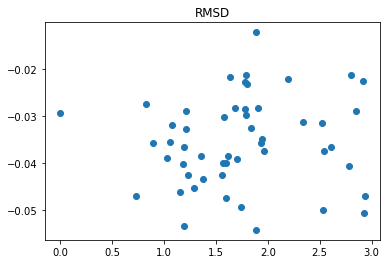

Nc1nc2c(c(C#CCCC[NH3+])cn2C2CC(O)C(COP(=O)([O-])OP(=O)([O-])OP(=O)([O-])[O-])O2)c(=O)[nH]1
tensor(6.5808)


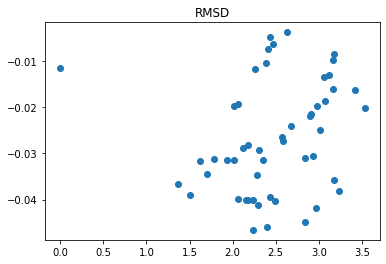

Cc1[nH+]cc(COP(=O)([O-])[O-])c(CNc2cc3cn(-c4ccccc4)nc3n(O)c2=O)c1O
tensor(5.4337)


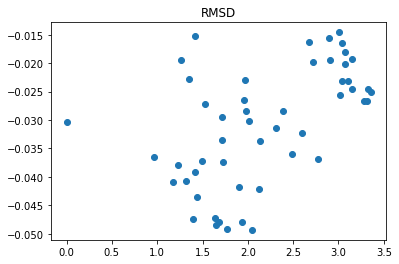

[NH3+]CCn1ccc2ccccc21
tensor(0.6565)


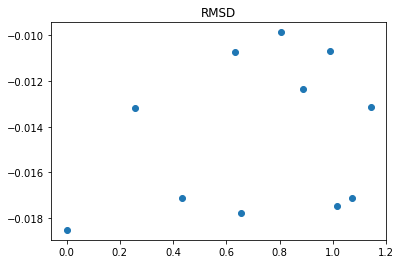

Cc1ccc(C(=O)Nc2ccc(C[NH+]3CC[NH+](C)CC3)c(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12
tensor(5.7888)


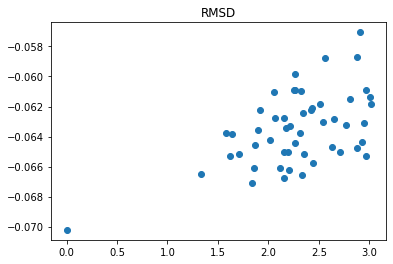

C[NH+]1C(C)(C)CC(NC(=O)C(=O)Nc2ccc(Cl)c(F)c2)CC1(C)C
tensor(1.6601)


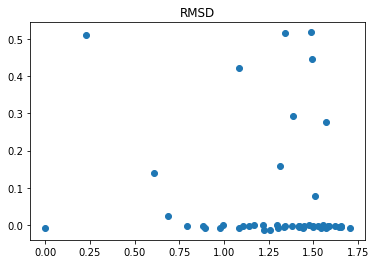

O=C1C(=O)N(C(c2ccccc2)c2ccccc2)C2C[NH2+]CC2N1C(c1ccccc1)c1ccccc1
tensor(0.5807)


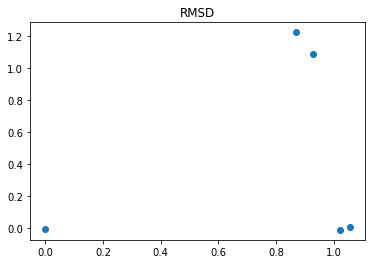

c1ccc(C2CC[NH2+]CC2OCc2ccc3ccccc3c2)cc1
tensor(1.6414)


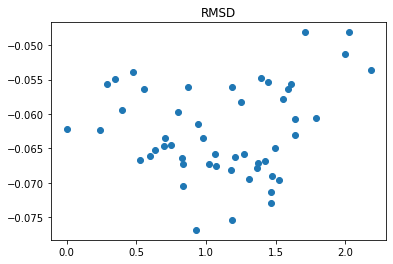

OC(CC1c2ccccc2Sc2ccccc21)C[NH+]1CCCC1
tensor(1.5584)


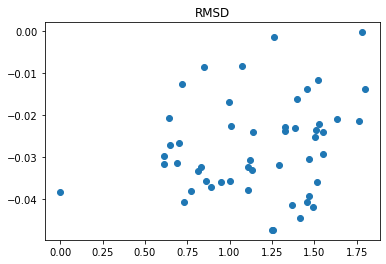

COC(CC(CCCC[NH2+]Cc1ccc(F)cc1)C(=O)N[O-])c1ccc(F)cc1
tensor(5.8937)


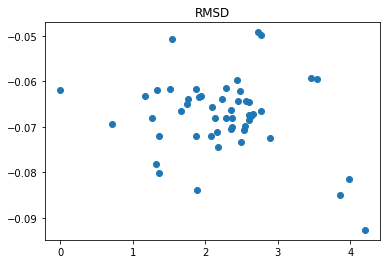

O=C(NCC12CCCC1C[NH2+]C2)C(=O)Nc1ccc(Cl)c(F)c1
tensor(2.5916)


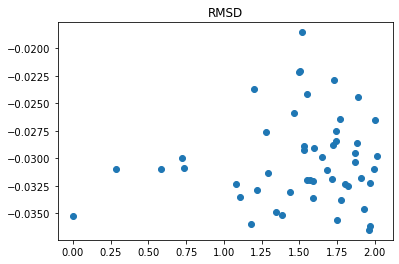

COc1cccc(OCC(=O)Nc2ccc(-c3nc4ccccc4s3)cc2)c1
tensor(3.3624)


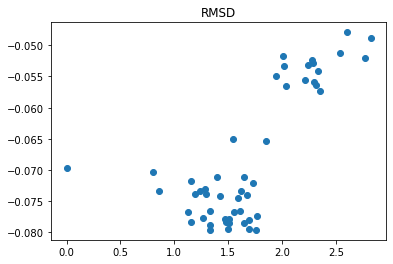

Cc1cn(C2CC(O)C(COP(=O)([O-])OP(=O)([O-])OC3CC([NH3+])C(O)C(C)O3)O2)c(=O)[nH]c1=O
tensor(7.2174)


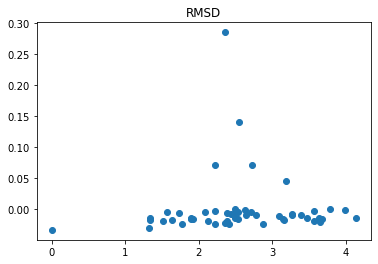

COc1cc2c(Nc3ccc(NC(=O)c4ccccc4)cc3)ncnc2cc1O
tensor(0.7616)


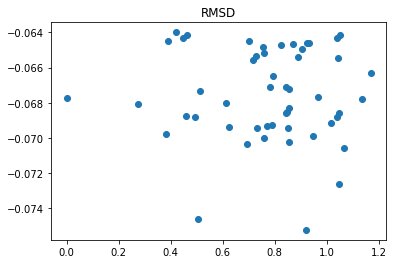

N#Cc1cccc(CC(NS(=O)(=O)c2ccc3c(c2)CC[NH2+]C3)C(=O)N2CCCC2)c1
tensor(9.6594)


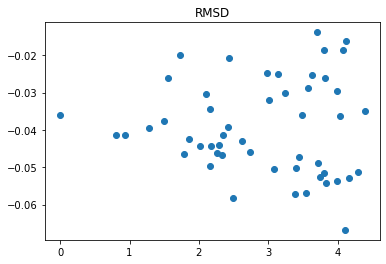

CC1(n2cnc3cnc4[nH]ccc4c32)CCN(S(C)(=O)=O)CC1
tensor(1.0979)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([23, 1])) that is different to the input size (torch.Size([23])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


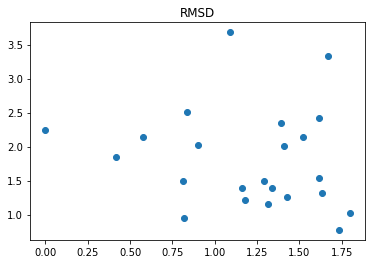

COc1ccc2nc(-c3ccccc3F)sc2c1
tensor(0.8700)


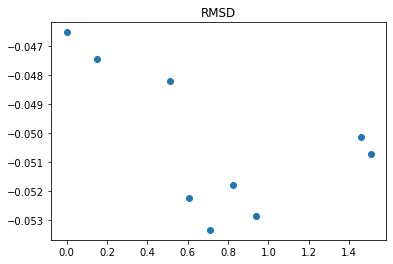

CC(C)(C)OC(=O)NC1CCC(n2cnc3cnc4[nH]ccc4c32)C1
tensor(1.7527)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([42, 1])) that is different to the input size (torch.Size([42])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


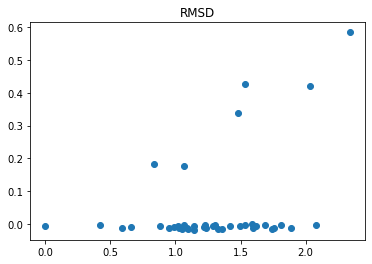

[N-]=[N+]=NC1C(CO)OC(n2ccc(=O)[nH]c2=O)C1F
tensor(1.3051)


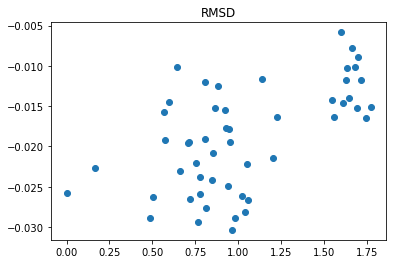

COC(=O)c1c(Cc2ccc(C(=O)NC3C4CC5CC3CC([NH3+])(C5)C4)cc2)c(=O)c2cccnc2n1-c1ccccc1
tensor(1.4773)


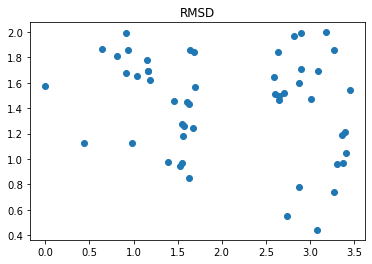

COc1ccccc1S(=O)(=O)Nc1ccc2c(c1)CN(C)C(=O)N2
tensor(3.6167)


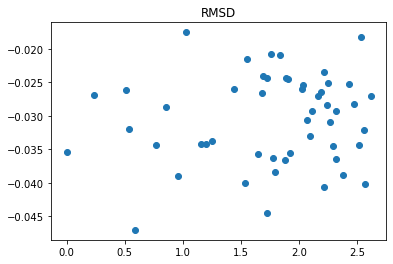

CC(C)[NH+]1CCCC1C(=O)N1CCC(n2cnc3cnc4[nH]ccc4c32)CC1
tensor(0.7780)


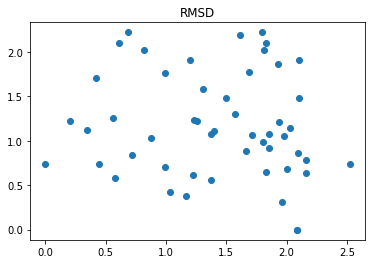

N#CCC(=O)N1CCCC(n2cnc3cnc4[nH]ccc4c32)C1
tensor(0.9671)


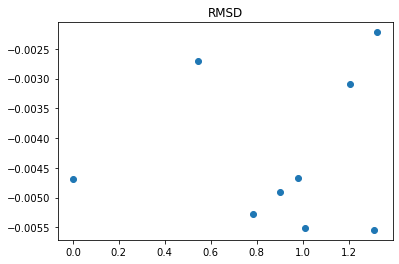

c1ccc(C[NH+]2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cc1
tensor(1.5806)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([25, 1])) that is different to the input size (torch.Size([25])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


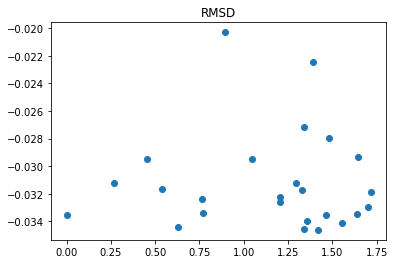

COc1ccc2c(NC(C)Cc3cc(C)[nH]n3)ncnc2c1OC
tensor(2.2284)


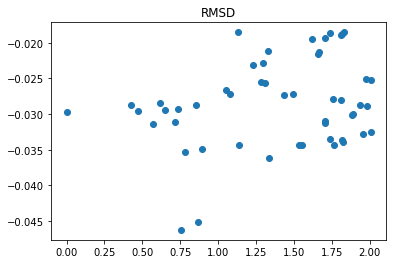

O=C(NCC[NH+]1CCOCC1)c1ccc(-c2nccc3ccccc23)cc1
tensor(3.5848)


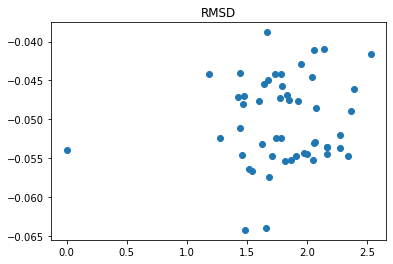

Cc1cc2ccccc2c(-c2ccc(C(=O)NCC[NH+]3CCOCC3)cc2)n1
tensor(3.4864)


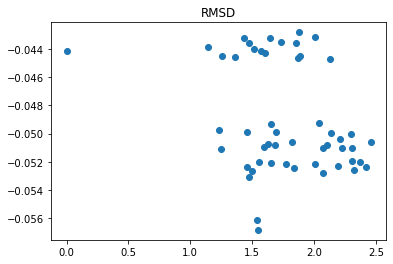

CCc1ccc(-c2ccc3c(c2)-c2[nH]ncc2S(=O)(=O)N3C)cc1
tensor(0.6413)


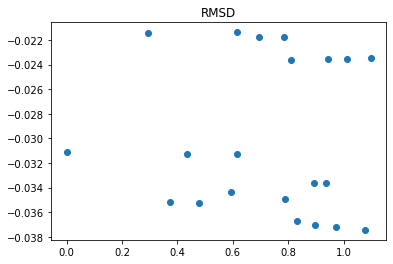

O=C([O-])c1ccc(-c2ccc3c(c2)nc(-c2c[nH]nc2-c2cccc(Cl)c2)n3CCCn2ccnc2)cc1
tensor(5.3590)


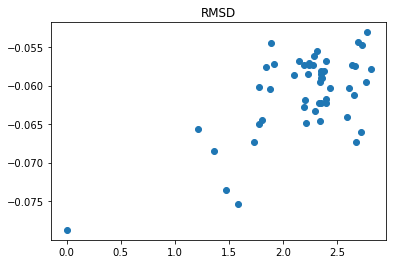

CCN1C(=O)C(c2cc(O)cc(-c3cccnc3)c2)C(=O)N(c2ccccc2)c2cc(C(F)(F)F)ccc21
tensor(7.2273)


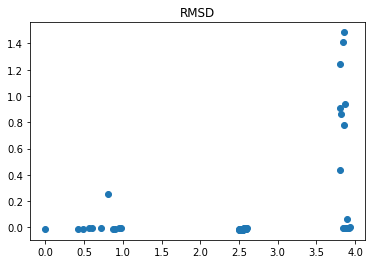

CCc1cc(-c2ccc(C)o2)n(-c2ccc3c(c2)nc(-c2cc(C(=O)[O-])ccc2O)n3Cc2ccc(=O)[n-]c2)n1
tensor(5.5673)


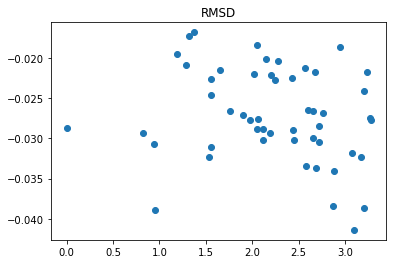

O=c1c2ccccc2ncn1-c1ccccc1
tensor(0.0476)


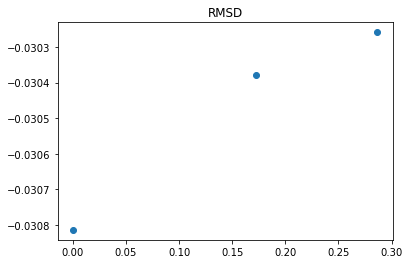

O=C(Nc1ccccc1)c1cccnc1
tensor(0.6676)


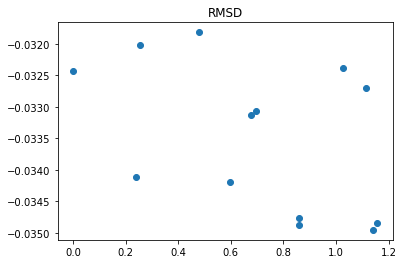

CC1CCCCC1Oc1nc(N)c2c(=O)ccn(CC#N)c2n1
tensor(2.3450)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([34, 1])) that is different to the input size (torch.Size([34])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


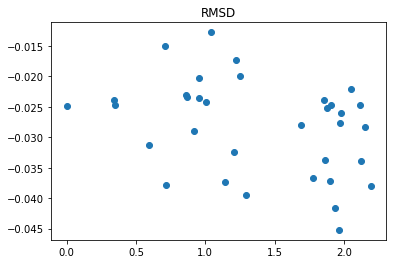

NC(=O)c1cnc(OC2CCCC2)nc1N
tensor(0.9925)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([39, 1])) that is different to the input size (torch.Size([39])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


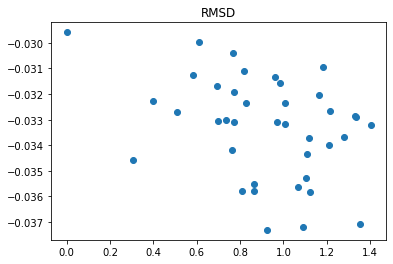

O=C(c1ccc(O)cc1)N1CCOCC1
tensor(0.2521)


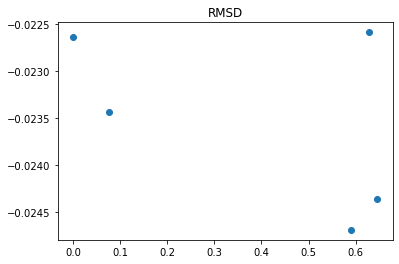

Cc1noc(C)c1-c1ccc2c(c1)C(O)(c1ccccc1)CC2
tensor(1.5006)


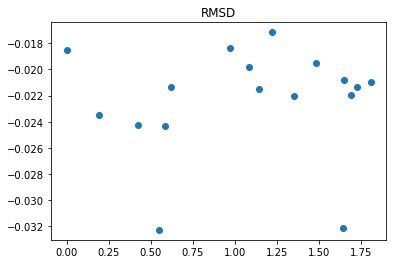

CN(CCCC(=O)c1cccnc1)N=O
tensor(1.7295)


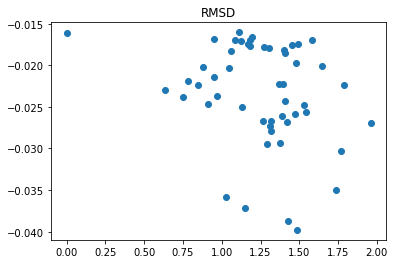

Nc1cccc(NS(=O)(=O)c2ccc(F)cc2)n1
tensor(1.7178)


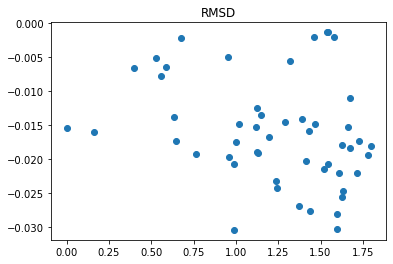

OC1CCN(C(=S)c2c[nH]c3ccccc23)CC1
tensor(1.7517)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([22, 1])) that is different to the input size (torch.Size([22])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


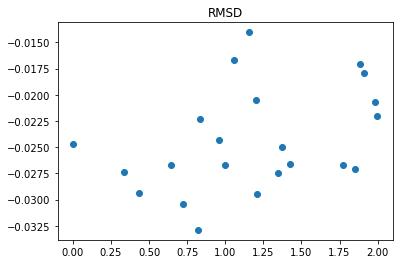

Oc1ccccc1C(=S)N1CCCC1
tensor(1.3238)


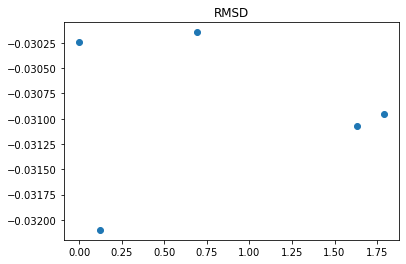

c1ccc2c(Cc3nc4cnccc4[nH]3)c[nH]c2c1
tensor(2.1153)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([33, 1])) that is different to the input size (torch.Size([33])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


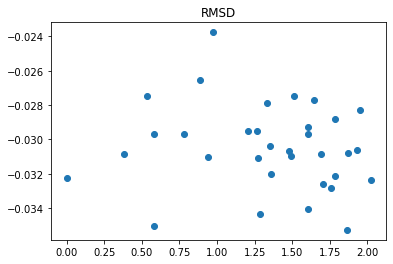

CCC(C(C)O)N1C(=O)C(C)(CC(=O)[O-])CC(c2cccc(Cl)c2)C1c1ccc(Cl)cc1
tensor(1.7018)


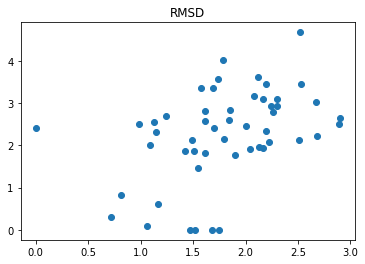

CC(=O)Nc1cccc(-c2ccc3nc(-c4cccnc4N)n(-c4ccc(CNC(=O)c5cccc(F)c5)cc4)c3n2)c1
tensor(6.4534)


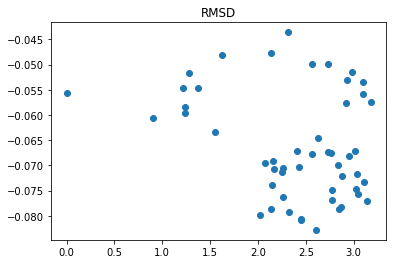

C#Cc1ccc(C#Cc2cn(C3CC(O)C(COP(=O)([O-])OP(=O)([O-])OP(=O)([O-])[O-])O3)c(=O)[nH]c2=O)cc1
tensor(3.2080)


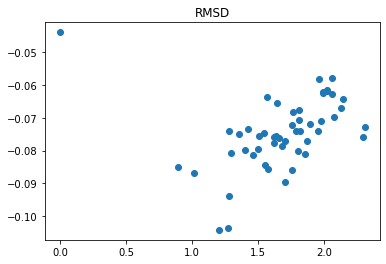

CCNC(=O)c1cc2c(-n3ccc(C(F)(F)F)n3)c(-c3cncc(C(=O)[O-])c3)cnc2[nH]1
tensor(2.7317)


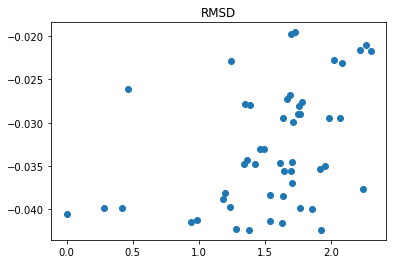

Nc1nc(=O)c2ncc(C(=O)NCc3cnn[nH]3)nc2[nH]1
tensor(2.0310)


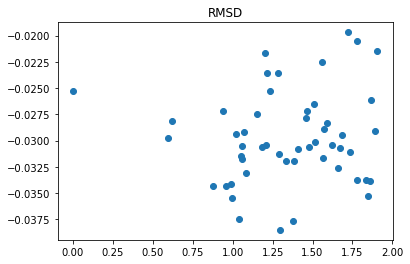

CC(C)[NH2+]CC(C(=O)N1CCN(c2ncnc3c2C(C)CC3O)CC1)c1ccc(Cl)cc1
tensor(3.1483)


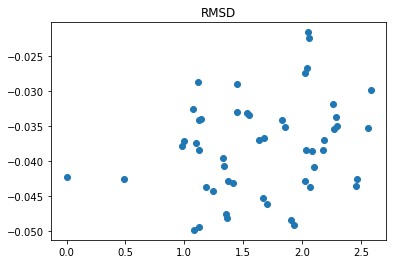

COc1cccc(OC)c1C(=O)NC(C(=O)[O-])C1NC(C(=O)[O-])C(C)(C)S1
tensor(3.2244)


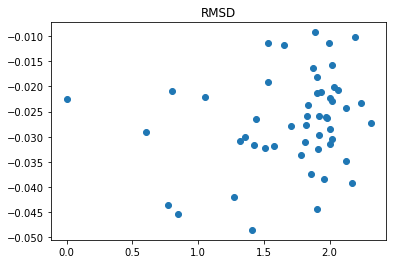

NC(=O)c1cccc(NC(=O)/C=C\C(=O)[O-])c1
tensor(2.0257)


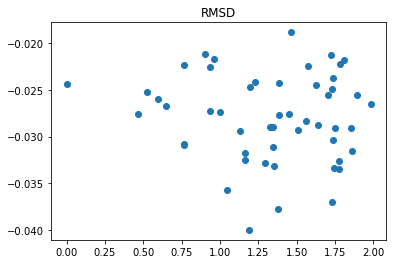

CC1CCC(C(=O)N(c2cc(C#CC(C)(C)C)sc2C(=O)[O-])C(C)C)CC1
tensor(4.0042)


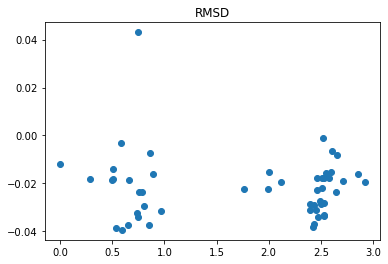

CC1CCC(C(=O)N(c2cc(C#CC(C)(C)C)sc2C(=O)[O-])N(C)C)CC1
tensor(4.4027)


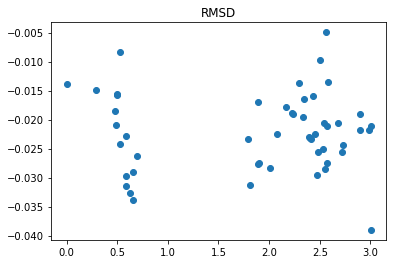

O=CN([O-])CC(CC1CCCC1)C(=O)N1CCCC1C(=O)NC(=O)c1ccccc1
tensor(3.5046)


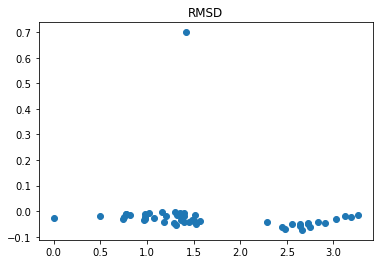

COC(=O)CC1N=C(c2ccc(Cl)cc2)c2c(sc(C)c2C)-n2c(C)nnc21
tensor(0.8172)


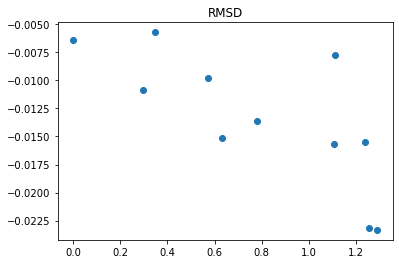

COCCCc1cc(Nc2nc(NCc3cc(C)no3)ncc2Br)n[nH]1
tensor(5.3983)


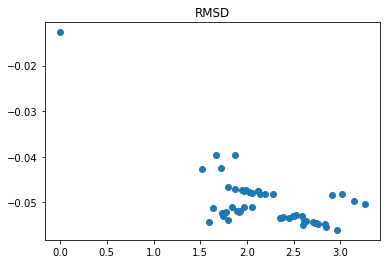

Cc1cc(CNc2ncc(Br)c(Nc3cc(CCc4ccccc4)[nH]n3)n2)on1
tensor(6.6947)


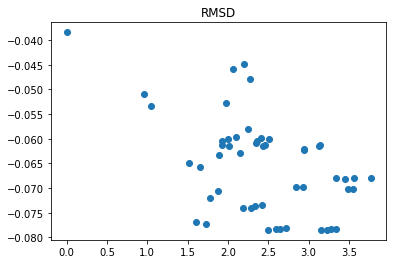

O=C([O-])C1CCCN(S(=O)(=O)c2ccc3ccccc3c2)C1
tensor(3.3317)


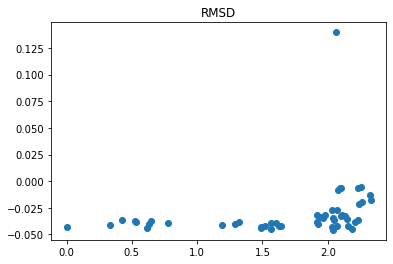

Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)NCCC[NH+]2CCOCC2)cc1
tensor(2.6503)


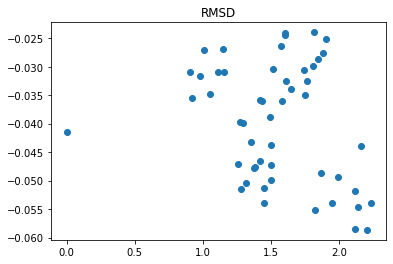

O=c1nc(C2CCC[NH2+]2)[nH]c2c1oc1ccc(Cl)cc12
tensor(0.6358)


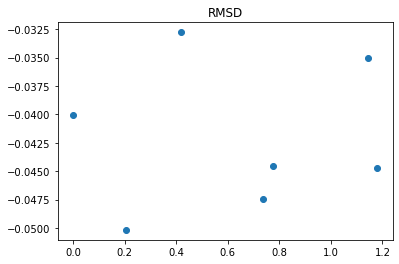

O=C([O-])c1cccc(S(=O)(=O)N2CCc3ccccc3C2)c1
tensor(3.0619)


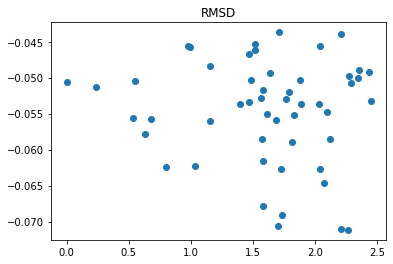

NCCCC([NH3+])C(=O)NCCCCC([NH3+])C(=O)[O-]
tensor(2.6632)


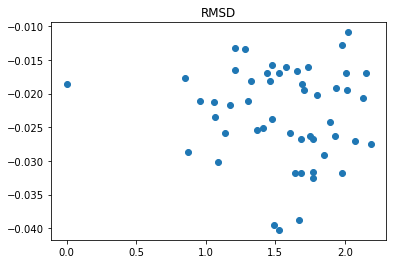

[NH3+]CCCC([NH3+])C(=O)OP(=O)([O-])[O-]
tensor(1.4873)


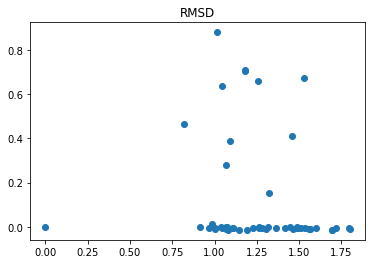

CC1(Cc2cn(C3CC(O)C(CO)O3)c(=O)[nH]c2=O)CN(C2CC(O)C(CO)O2)C(=O)NC1=O
tensor(5.5142)


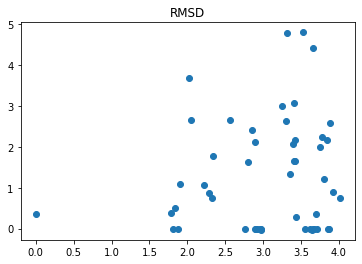

OCC12OCC3OC(CO)(OCC(O1)C(O)C2O)C(O)C3O
tensor(0.1691)


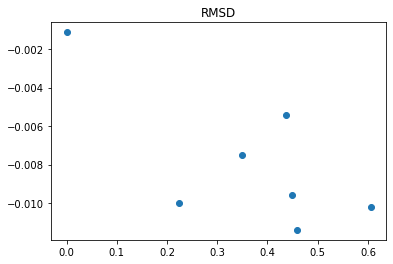

OCC1OC(CO)(OCC2OC(CO)(OCC3OC(O)(CO)C(O)C3O)C(O)C2O)C(O)C1O
tensor(5.5760)


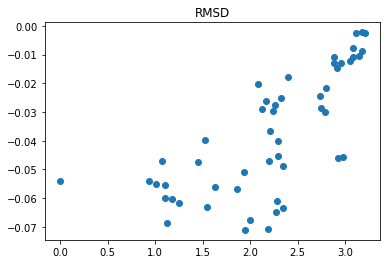

CS(=O)(=O)NCc1nc2cnc3[nH]ccc3c2n1C1CC2CCC1C2
tensor(1.0446)


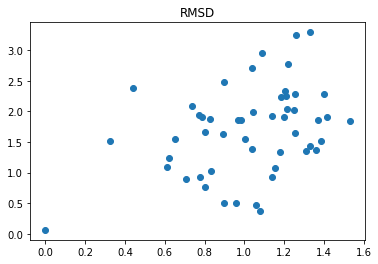

CC(C)Oc1cc(C[NH+]2CCC3(CC2C)CN(C)S(=O)(=O)N3c2cccc(F)c2)ccc1O
tensor(4.3632)


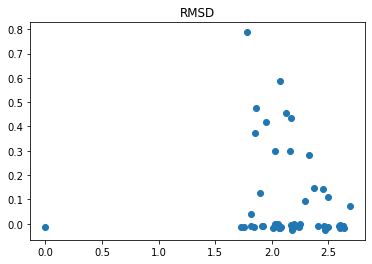

CC(C)Oc1cccc(C[NH+]2CCC3(CC2C)CN(C)S(=O)(=O)N3c2cccc(F)c2)c1
tensor(4.0881)


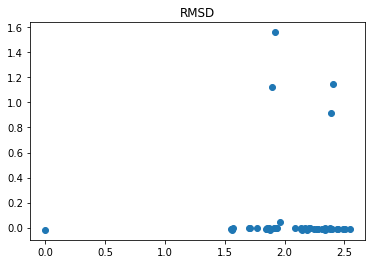

COC(=O)C1CCC(n2c(NC(=O)c3ccccc3)nc3ccc(C[NH+]4CCCCC4)cc32)CC1
tensor(5.1824)


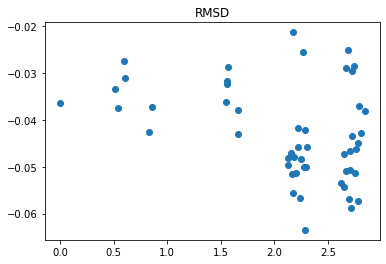

CNc1nc2c(CC[NH2+]CC34CC5CC(CC(C5)C3)C4)c3[nH]c(N)[nH+]c(=O)c3cc2[nH]1
tensor(2.4037)


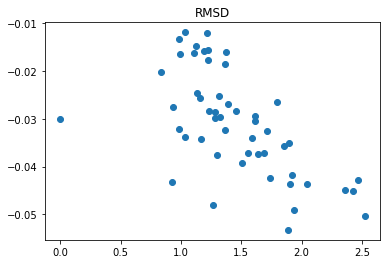

CCOc1cc(OCC#Cc2ccc3ccncc3c2)ccc1C[NH3+]
tensor(4.2541)


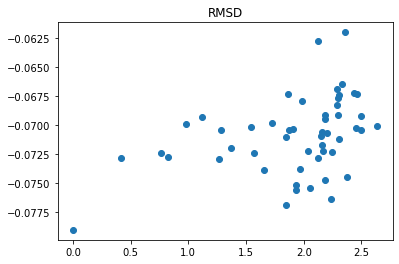

COCC1CCC2/C1=C\C1(C)CCC(C(C)C)=C1C(OC1OC(CO)C(O)C(O)C1O)C(O)C2C
tensor(1.3174)


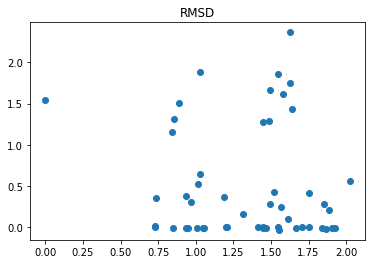

CC(OP(=O)([O-])[O-])C(=O)[O-]
tensor(0.4014)


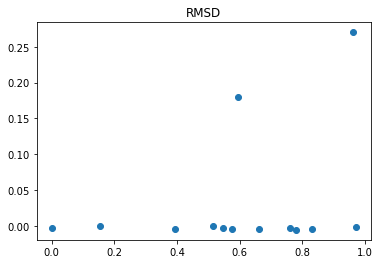

O=S(=O)([O-])CC[NH2+]Cc1cccc(F)c1
tensor(1.5954)


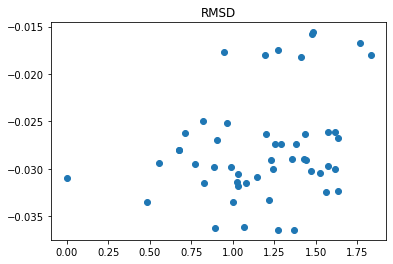

O=S(=O)([O-])CC[NH2+]Cc1cccc(Br)c1
tensor(1.8011)


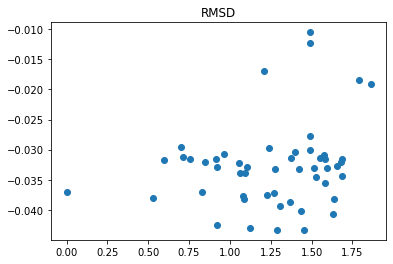

COCCC1CC1c1cncc(OCC2CC[NH2+]2)c1
tensor(2.3817)


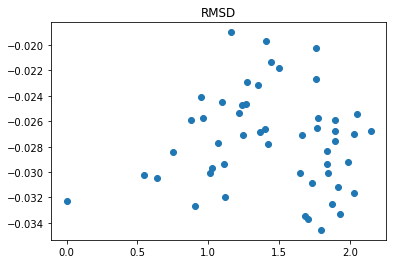

COc1ccc(Nc2nc(N3CCC(NC(=O)c4ccc(C(=O)[O-])cc4)C3)nc3scnc23)cc1OC
tensor(6.0404)


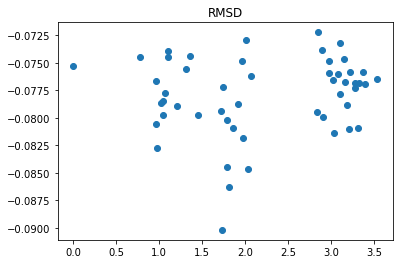

CC1CCCN1c1cccc(Nc2cc(-c3ccccc3)nn3ccnc23)n1
tensor(5.2954)


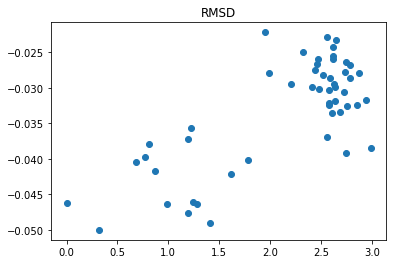

CCc1cccc(Nc2cc(NC3CCCCC3[NH3+])nnc2C(N)=O)n1
tensor(2.9097)


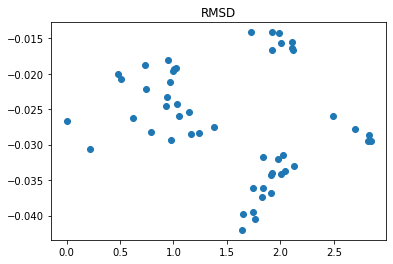

N#Cc1ccc2nc(Nc3ccc(Oc4ncccc4C(F)(F)F)cc3)[nH]c2c1
tensor(2.8252)


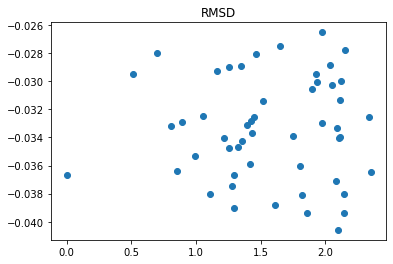

CC(C)(C)c1ccc(Nc2nc3ccc(C#N)cc3[nH]2)cc1
tensor(1.4322)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


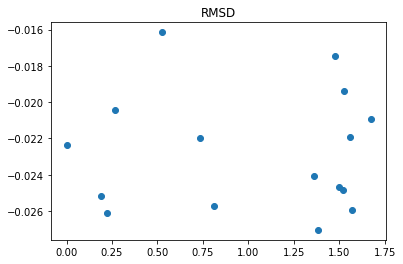

N#Cc1cccc(-c2csc(Nc3cc(F)ccc3O)n2)c1
tensor(3.8340)


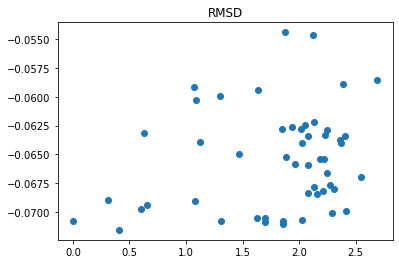

CC(O)(C#Cc1ccc2c(c1)N(c1nc(N)ncc1Cl)CC2)c1nccs1
tensor(3.7369)


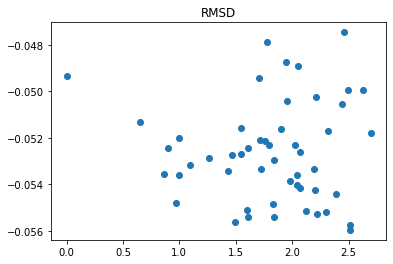

Cc1c(CN(C)C(=O)CCc2cnc3c(c2)CCC(=O)N3)oc2ccccc12
tensor(4.8424)


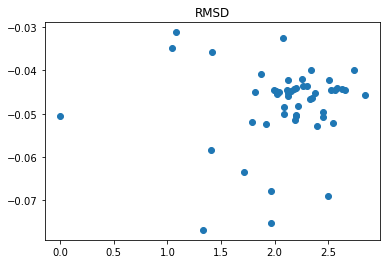

Cn1cc(-c2ccc3c(c2)CCN3C(=O)Cc2cccc(C(F)(F)F)c2)c2c(N)ncnc21
tensor(4.6281)


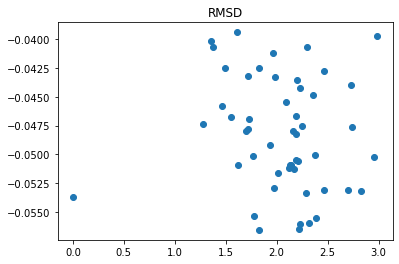

Cc1onc(-c2ccccc2)c1C(=O)NC(C(=O)[O-])C1NC(C(=O)[O-])C(C)(C)S1
tensor(4.6140)


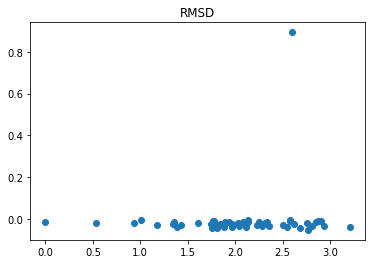

CCc1[nH]c2nc(Oc3cncnc3)nc(N3CC4C([NH3+])C4C3)c2c1Cl
tensor(1.6505)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([48, 1])) that is different to the input size (torch.Size([48])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


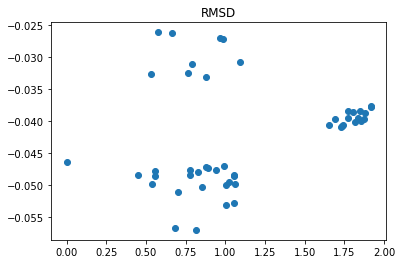

O=c1[nH]cnc2c(CC[NH2+]CC3CCCCC3)c3nc(NCc4cccs4)[nH]c3cc12
tensor(2.8470)


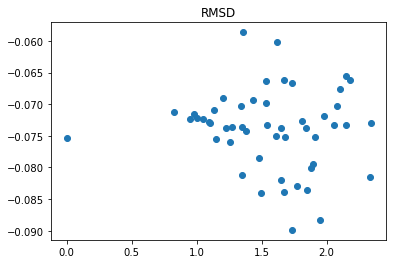

Nc1[nH]c2c(CC[NH2+]CC3CCCCC3)c3nc(NCCc4ccccc4)[nH]c3cc2c(=O)[nH+]1
tensor(2.5691)


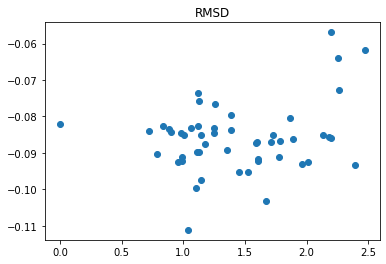

O=C(Nc1ccnc(NC(=O)C2CC2)c1)c1c(Cl)cccc1Cl
tensor(1.3497)


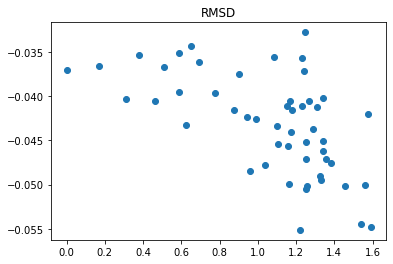

O=C([O-])C1OC(Oc2cc3oc(-c4ccccc4)cc(=O)c3c(O)c2O)C(O)C(O)C1O
tensor(2.1423)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([44, 1])) that is different to the input size (torch.Size([44])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


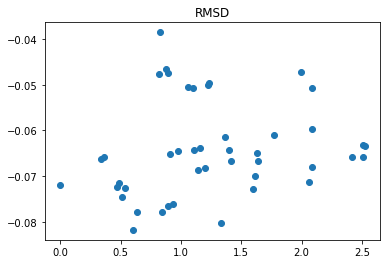

Cc1ccc(Nc2cc(NC3CCCCC3[NH3+])nnc2C(N)=O)nc1C
tensor(3.2538)


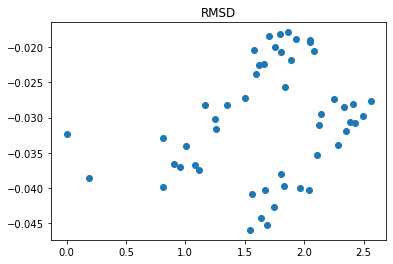

NC(=O)c1cc2cc(Br)c(C(F)(F)F)nc2nc1N
tensor(0.2395)


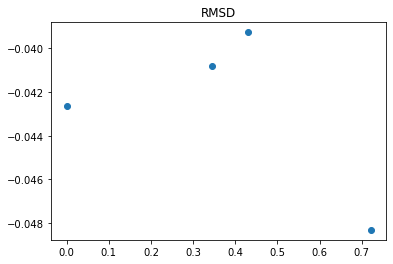

COc1nc2nc(N)nc(N)c2nc1C
tensor(0.0022)


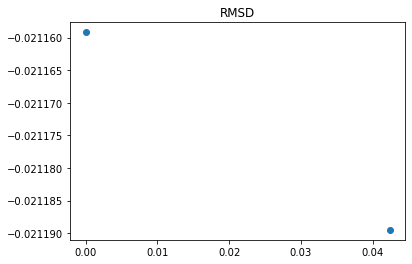

Nc1ncnc2c1ncn2C1O/C(=C/C([NH3+])CCC([NH3+])C(=O)[O-])C(O)C1O
tensor(2.1318)


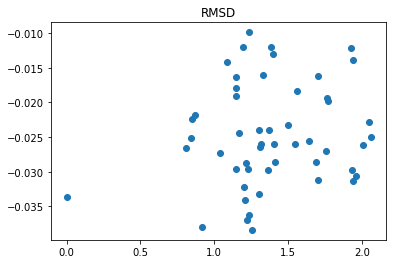

C[N+]1(C)CC(O)CC1C(=O)[O-]
tensor(0.4201)


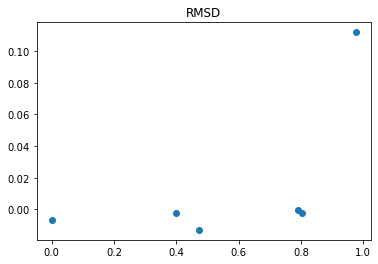

[NH3+]C1(C(=O)NC(CCO)c2ccc(Cl)cc2)CCN(c2ncnc3[nH]ccc23)CC1
tensor(3.6005)


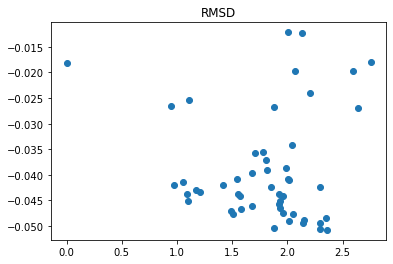

CC(=O)Nc1cc(Nc2cc(Nc3cn(C)c[nH+]3)n3ncc(C#N)c3n2)ccc1C
tensor(5.0706)


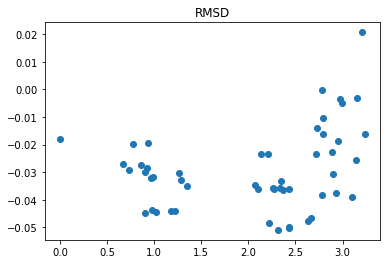

Cc1cn(C2CCC[NH+](Cc3ccc(C(=O)[O-])c(Oc4cccc(C(F)(F)F)c4)c3)C2)c(=O)[nH]c1=O
tensor(8.4797)


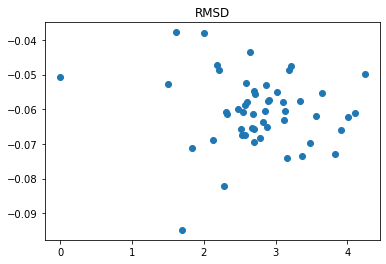

CCC(CO)N1C(=O)C(CC(=O)[O-])CC(c2cccc(Cl)c2)C1c1ccc(Cl)cc1
tensor(1.6527)


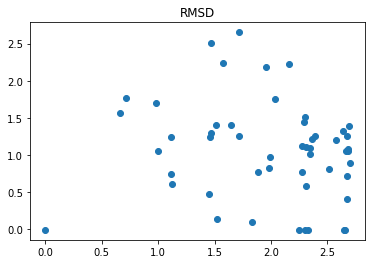

Cc1cn(C2CCC[NH+](C(CC(C)(C)C)c3ccc(C(=O)[O-])c(Oc4cccc(Br)c4)c3)C2)c(=O)[nH]c1=O
tensor(9.0677)


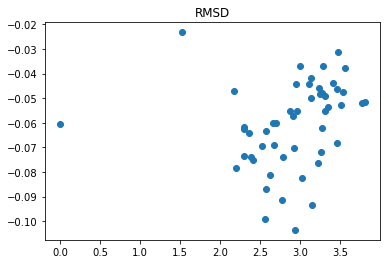

Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2cccc3cc(C(=O)NC(C)C)[nH]c23)cc1
tensor(6.0365)


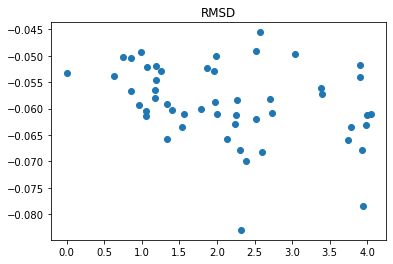

Cc1ncc(Cc2csc(CCO)c2C)c(N)n1
tensor(2.0343)


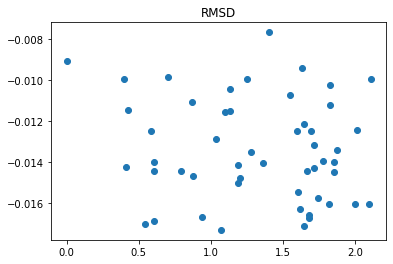

O=C(N[O-])C(O)C(O)C(O)CO
tensor(2.1164)


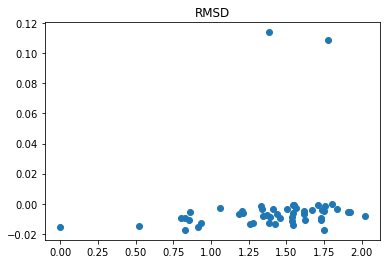

C/C(=C\COP(=O)([O-])OP(=O)([O-])[O-])CN
tensor(2.7807)


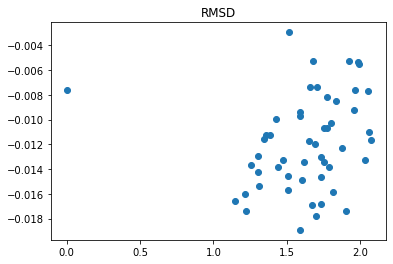

C/C(=C\COP(=O)([O-])OP(=O)([O-])[O-])C[S-]
tensor(3.2580)


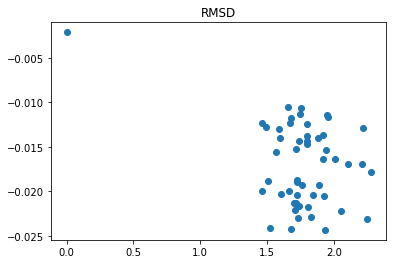

CN(c1ncccc1CNc1c(C#N)cnc2[nH]c(-c3ccccc3)cc12)S(C)(=O)=O
tensor(5.0466)


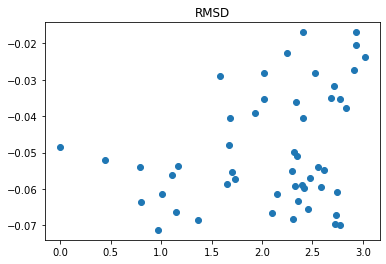

C[n+]1cccc(CNC(=O)C2CCCN2C(=O)C([NH3+])Cc2ccccc2)c1
tensor(3.7789)


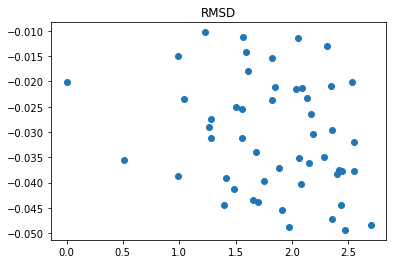

NC(=[NH2+])c1ccc(CNC(=O)C2CCCN2C(=O)C[NH2+]C2CCCC2)cc1
tensor(3.8440)


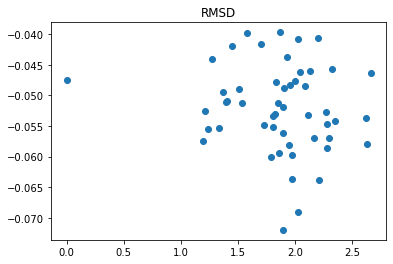

CC(C)n1c(/C=C/C(O)CC(O)CC(=O)[O-])c(-c2ccc(F)cc2)c2ccccc21
tensor(3.8424)


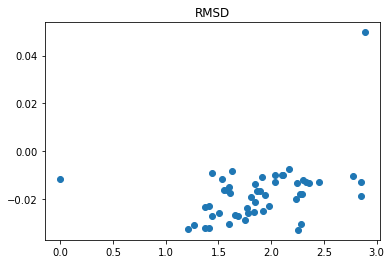

CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F)cc2)n1CCC(O)CC(O)CC(=O)[O-]
tensor(4.5393)


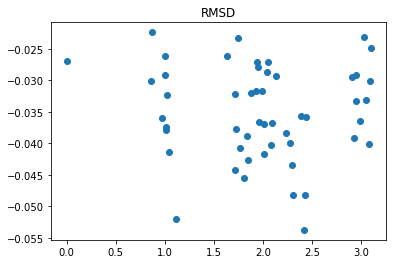

[NH3+]C(CCCC(=O)[O-])C(=O)[O-]
tensor(1.2986)


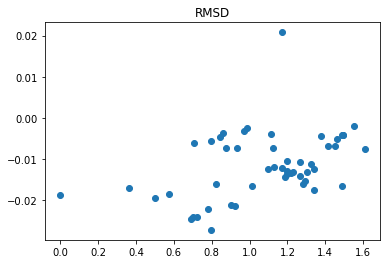

CN(C)c1cccc2c(S(=O)(=O)NCCCCCCCCCCC(=O)[O-])cccc12
tensor(5.1222)


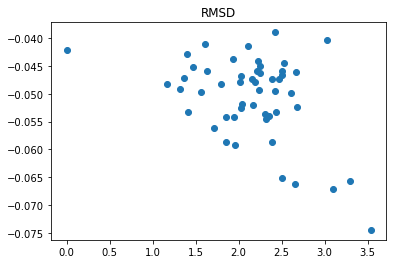

CCC1C(=O)N(C)c2cncnc2N1C1CCCC1
tensor(0.5354)


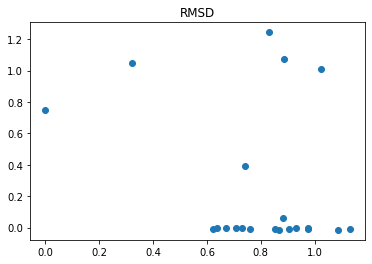

O=C1c2ccc(S(=O)(=O)[O-])cc2C(=O)c2ccc(S(=O)(=O)[O-])cc21
tensor(0.1246)


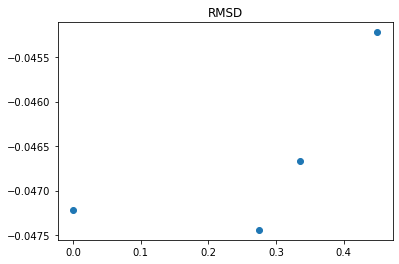

[NH3+]Cc1ccc2c(c1)C1(CCN(C(=O)/C=C/c3ccccc3)CC1)CO2
tensor(2.3322)


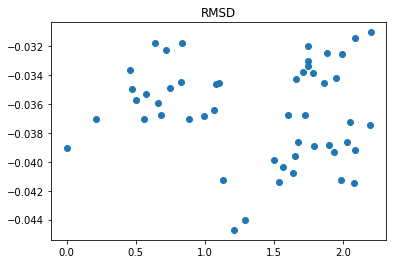

O=P([O-])([O-])C(O)(C1CCc2ccncc21)P(=O)([O-])[O-]
tensor(0.8591)


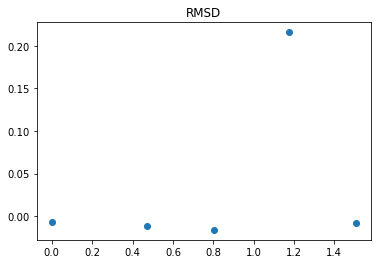

NC(=[NH2+])c1ccc(CNC(=O)C2CCCN2C(=O)C[NH2+]C2CCCCC2)cc1
tensor(3.8825)


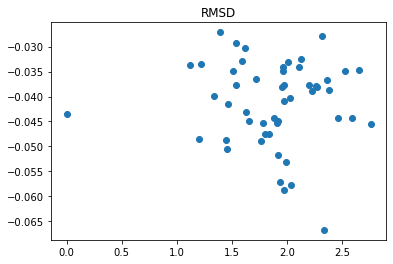

c1ccc(NCc2cccnc2)cc1
tensor(1.1010)


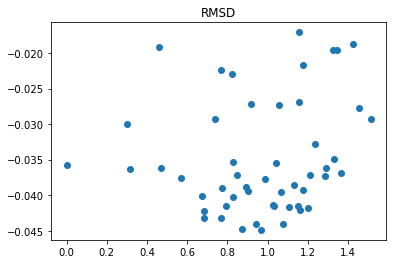

O=C(C1=C(O)C(=O)N(c2ccc(Cl)c(C(=O)[O-])c2)C1c1cc(Br)cs1)c1ccccc1
tensor(3.5202)


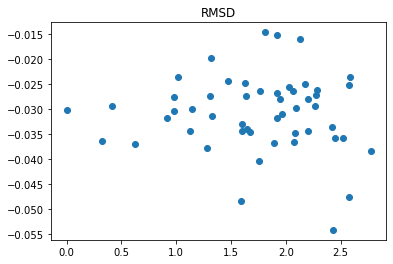

NC(=[NH2+])c1ccc2nc(-c3ccccc3[O-])[nH]c2c1
tensor(0.8817)


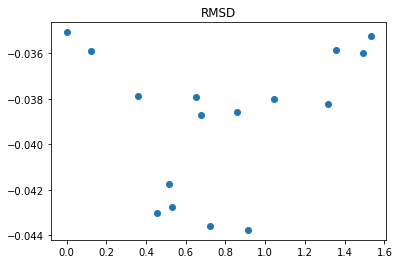

OCC1OC(NC(=S)N/N=C/c2ccncc2)C(O)C(O)C1O
tensor(2.7163)


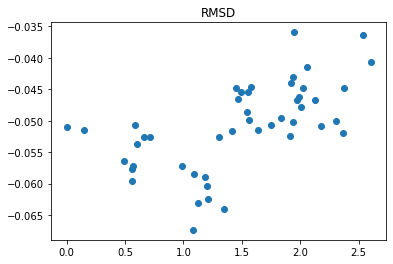

C[NH+]1CCN(c2ncnc3ccccc23)CC1
tensor(0.5931)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([14, 1])) that is different to the input size (torch.Size([14])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


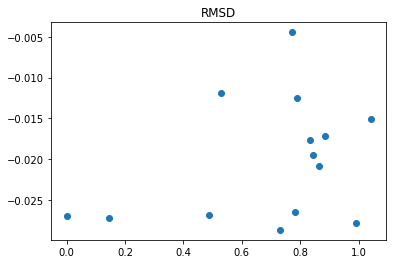

CCc1ccccc1CO
tensor(0.3609)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


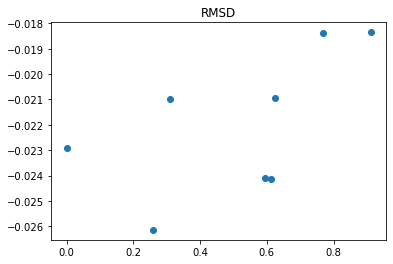

Nc1nc(NC2CCCCC2)sc1C(=O)c1cccnc1
tensor(2.8454)


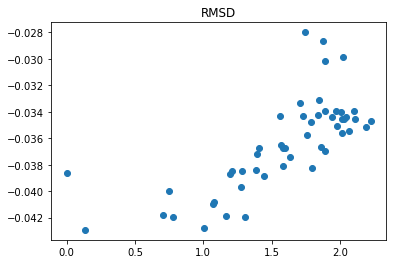

NC(=[NH2+])c1ccc2nc(-c3cccc(-c4ccccc4)c3O)[nH]c2c1
tensor(1.2617)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([41, 1])) that is different to the input size (torch.Size([41])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


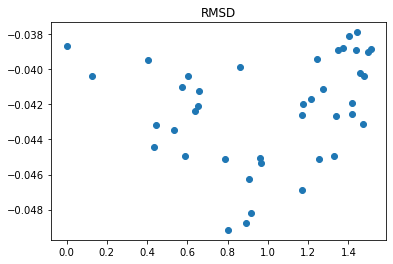

NC(=[NH2+])c1cc2cc(-c3cccc(-c4ccccc4)c3[O-])[nH]c2cc1Cl
tensor(1.4261)


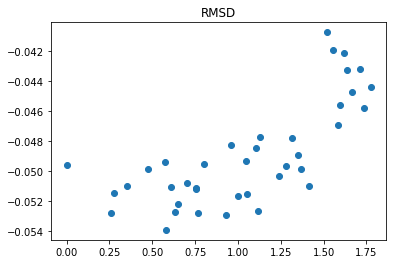

CC(C)COc1cccc(-c2nc3cc(F)c(C(N)=[NH2+])cc3[nH]2)c1O
tensor(1.5436)


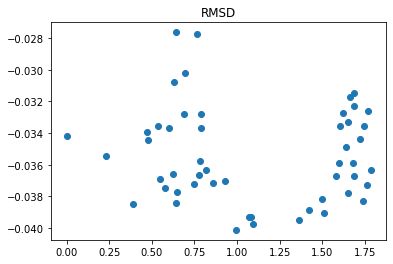

NC(=[NH2+])c1ccc(NC(=O)c2ccccc2[O-])cc1
tensor(0.8524)


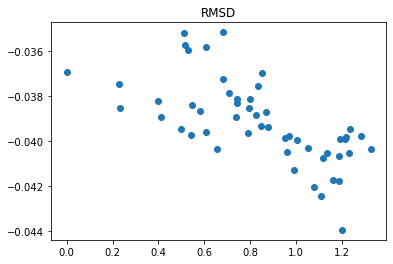

Cc1cc(I)c(O)c(C(=O)Nc2ccc(C(N)=[NH2+])c(Cl)c2)c1
tensor(1.8984)


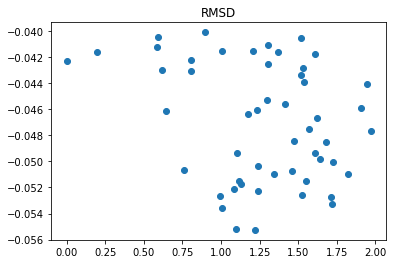

O=C1NS(=O)(=O)Nc2c1ncn2C1OC(CO)C(O)C1O
tensor(1.9558)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


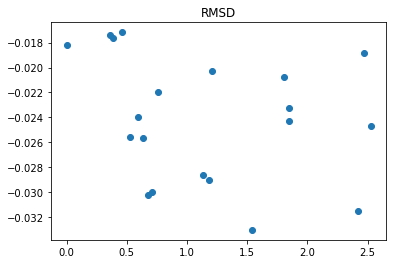

CCC(Cc1ccc(OC)c(CNC(=O)c2ccc3ccc4cccc5ccc2c3c45)c1)C(=O)[O-]
tensor(5.1613)


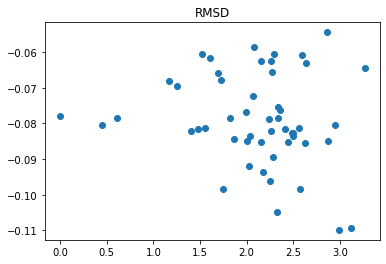

O=C1NCC/C=C/CCCC(C(=O)NCc2ccccc2)C(=O)Cc2c(Cl)c(O)cc(O)c21
tensor(2.0801)


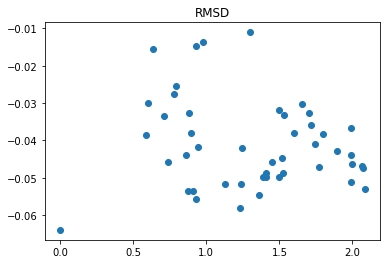

O=C(CO)COP(=O)([O-])[O-]
tensor(0.6136)


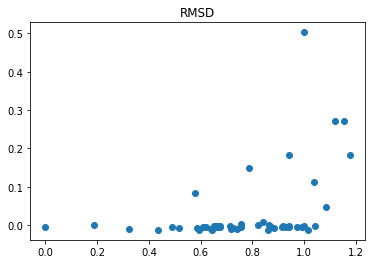

Cc1cn(C2CCC[NH+](C(CC(C)C)c3ccc(C(=O)[O-])c(Oc4cccc(Cl)c4)c3)C2)c(=O)[nH]c1=O
tensor(8.9466)


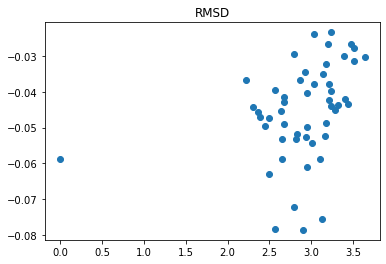

CCCCCCCCCCCCCCCC(=O)NCC(=O)[O-]
tensor(3.8281)


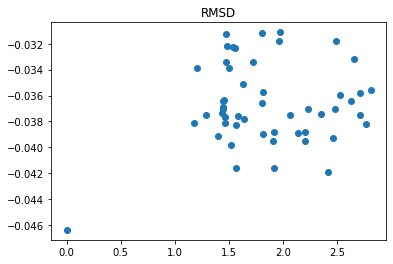

O=[N+]([O-])c1ccccc1OC1OC(CO)C(O)C(O)C1O
tensor(1.1871)


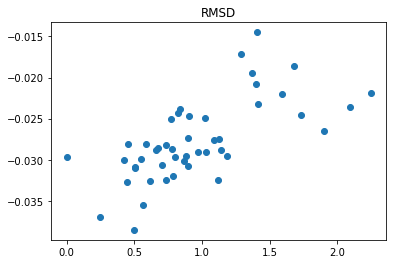

O=C1OC(CO)C(O)C(O)C1O
tensor(0.2901)


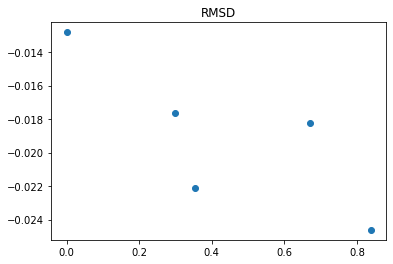

Cc1cn(C2CCC[NH+](Cc3cccc(Oc4cccc(C(F)(F)F)c4)c3)C2)c(=O)[nH]c1=O
tensor(9.7598)


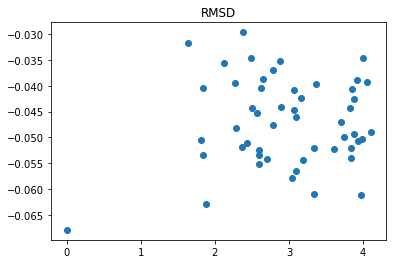

O=C([O-])c1cc2c(ccc3ccc4oc(C(=O)[O-])cc4c32)o1
tensor(0.0016)


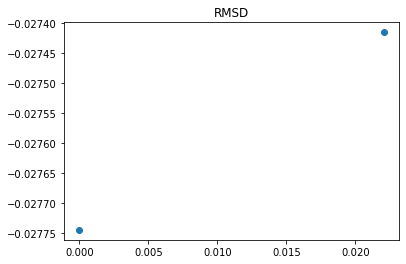

CCNS(=O)(=O)c1ccc2c(c1)CN(C)C(=O)N2
tensor(1.8361)


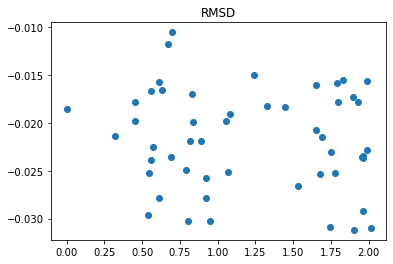

C[N+](C)(C)CC(O)CC(=O)[O-]
tensor(0.4495)


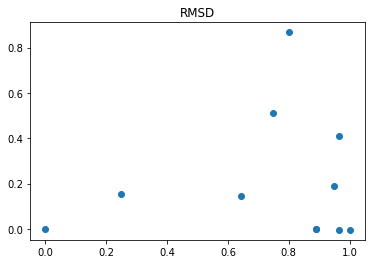

CC(O)C1CCN(c2nccnc2Oc2ccc(Nc3nc4ccccc4s3)cc2)CC1
tensor(2.4193)


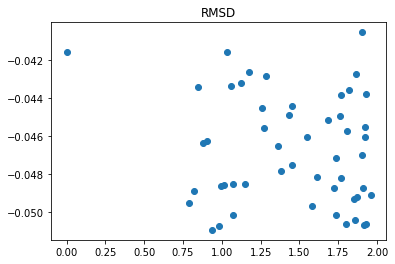

c1nc(N2CCC3(CCC[NH2+]C3)CC2)c2nc[nH]c2n1
tensor(0.8428)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([49, 1])) that is different to the input size (torch.Size([49])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


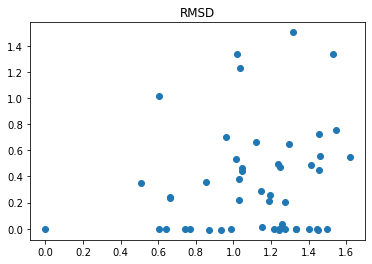

OCC1CCN(c2ncccc2Oc2ccc(Nc3nc4ccccc4[nH]3)cc2)CC1
tensor(2.4289)


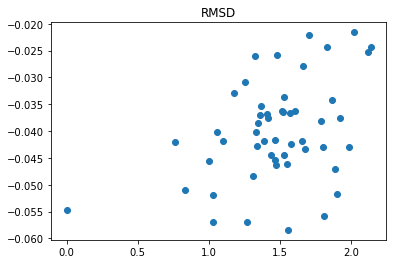

CCNC(=O)CCC/C=C\CC1C(O)CC(O)C1/C=C/C(O)CCc1ccccc1
tensor(8.2231)


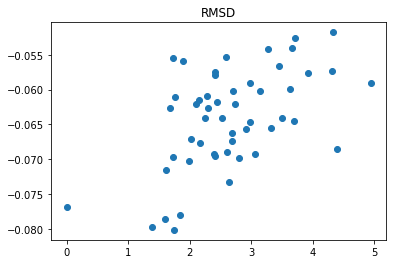

CC(O)c1nc2cnc3[nH]ccc3c2n1C1CCC(CCC#N)CC1
tensor(0.5791)


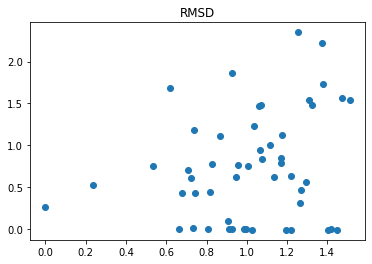

Cc1cc(NC(=O)c2cnn3cccnc23)n(-c2cccc(Cl)c2)n1
tensor(2.5871)


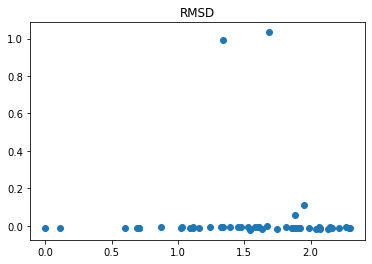

COc1ccc(-c2cc(=O)c3ccc(O)cc3o2)cc1
tensor(0.1022)


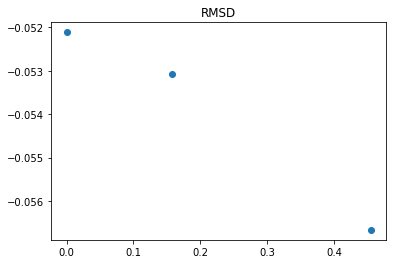

O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)ccc12
tensor(0.7242)


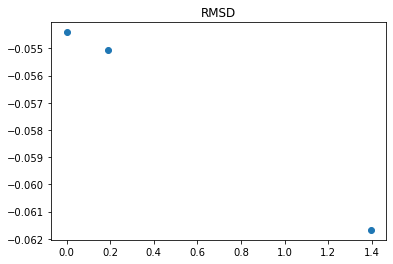

O=C([O-])CCC(=O)C1=CC=CC(O)C1C(=O)[O-]
tensor(1.4084)


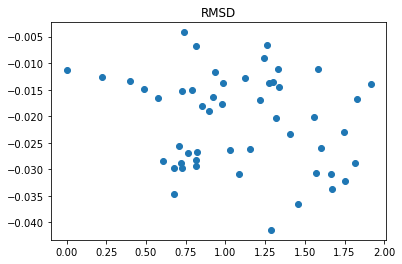

OCC1OC(NC(=S)N/N=C/c2cccc(O)c2)C(O)C(O)C1O
tensor(3.1921)


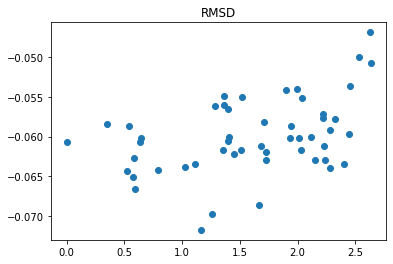

CC(=O)NC1C(O)OC(COP(=O)([O-])[O-])C(O)C1O
tensor(1.0953)


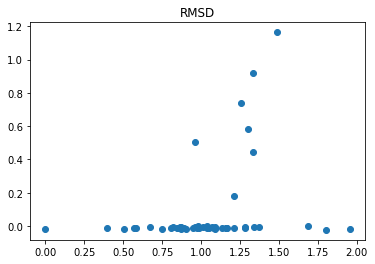

O=C(Nc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1)c1cccs1
tensor(0.8657)


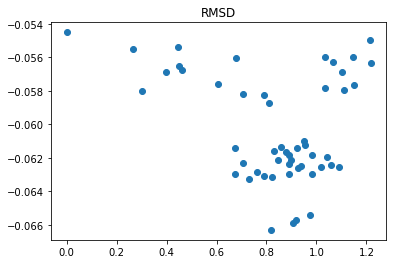

OCC1OC(NC(=S)N/N=C/c2ccc(Br)cc2)C(O)C(O)C1O
tensor(2.5924)


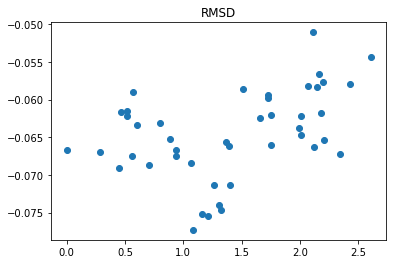

O=c1cc(-c2ccc(O)c(O)c2)oc2ccccc12
tensor(0.7607)


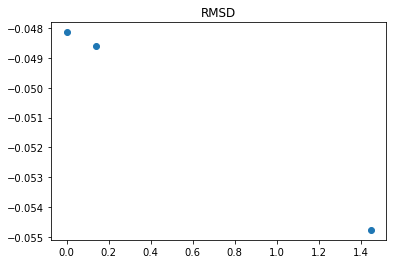

Cc1cn(C2CCCN(S(=O)(=O)c3ccc(O)c(Oc4cccc(Cl)c4)c3)C2)c(=O)[nH]c1=O
tensor(6.6228)


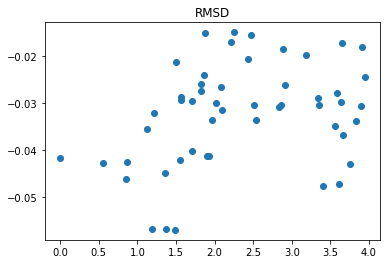

Nc1ncnc2c1c(COc1cccc(Cl)c1)nn2C1CCOCC1
tensor(2.2043)


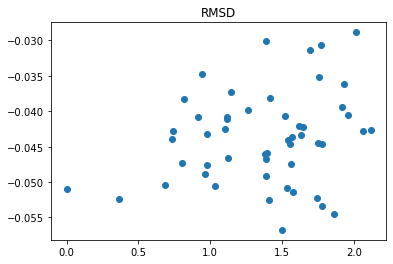

O=C([O-])C(=O)c1ccccc1
tensor(0.4127)


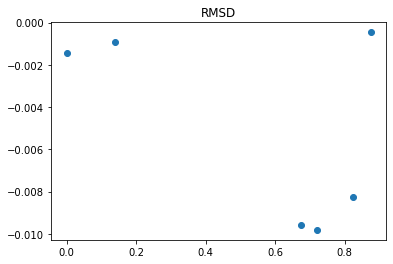

O=C([O-])c1ccc(Cl)cc1
tensor(0.0011)


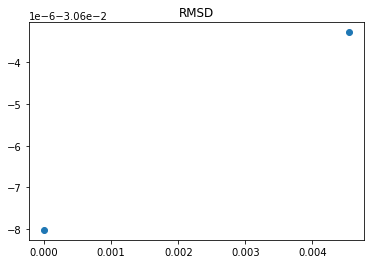

O=C([O-])c1ccccc1Nc1ccccc1C(=O)[O-]
tensor(1.7069)


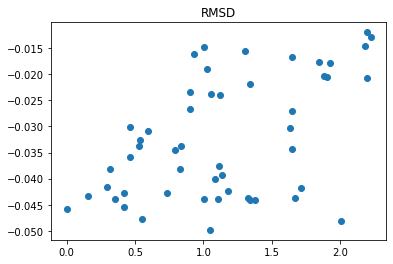

O=C([O-])c1ccccc1Cc1ccccc1
tensor(1.0425)


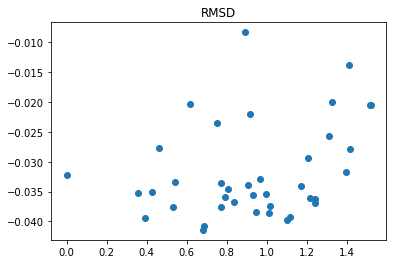

CCOc1cc(CNC(=O)c2c(OC)cc(O)c3c2OC2=CC(O)=C(C(C)=O)C(=O)C23C)c2ccccc2c1
tensor(6.6318)


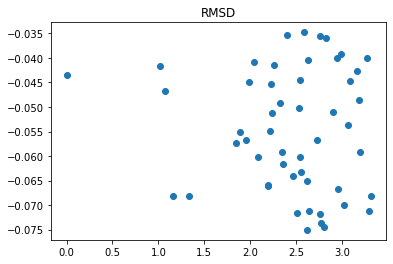

COc1ccc(/C=N/NC(=S)NC2OC(CO)C(O)C(O)C2O)cc1
tensor(2.6587)


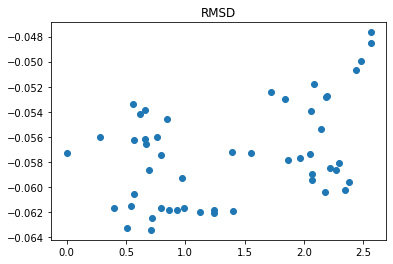

OCC1OC(NC(=S)N/N=C/c2ccc(Cl)cc2)C(O)C(O)C1O
tensor(2.5891)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([43, 1])) that is different to the input size (torch.Size([43])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


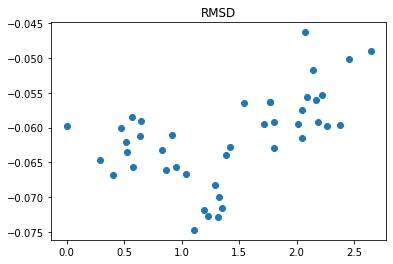

c1ccc(Cn2c(-c3ccccc3)nc3ccccc32)cc1
tensor(1.1188)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([30, 1])) that is different to the input size (torch.Size([30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


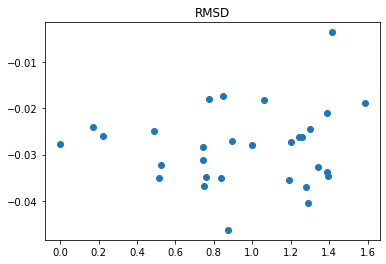

COc1cc(C(C)C#Cc2c(N)nc(N)[nH+]c2C)c(OC)cc1-c1ccccc1
tensor(3.1941)


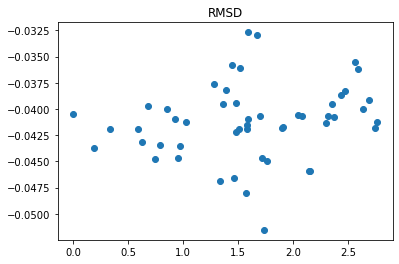

COc1cc(-c2ccccc2)ccc1C(C)C#Cc1c(N)nc(N)[nH+]c1C
tensor(1.9686)


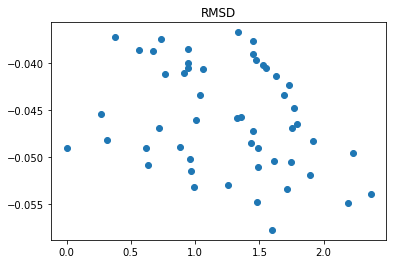

Cc1nc(N)sc1-c1ccnc(Nc2ccc(N(C)C)cc2)n1
tensor(3.0712)


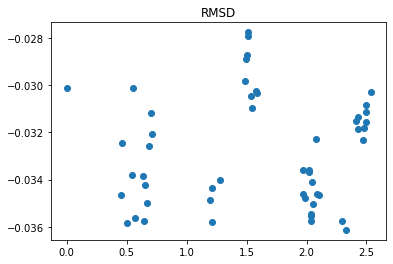

O=[N+]([O-])c1ccc(/C=N/NC(=S)NC2OC(CO)C(O)C(O)C2O)cc1
tensor(3.0792)


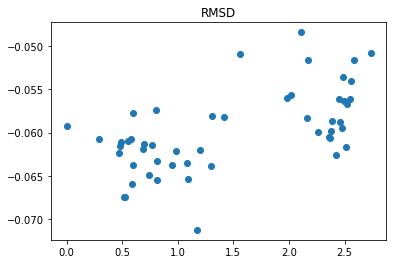

CN1CC(N)=NC(C)(c2cccc(NC(=O)c3ccc(Cl)cn3)c2)C1=O
tensor(3.8167)


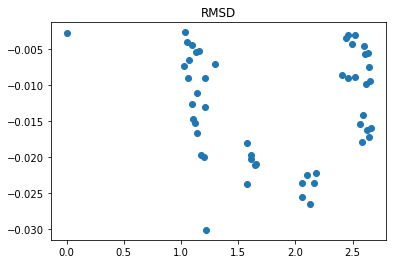

Cc1ccc(/C=N/NC(=S)NC2OC(CO)C(O)C(O)C2O)cc1
tensor(2.5445)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([46, 1])) that is different to the input size (torch.Size([46])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


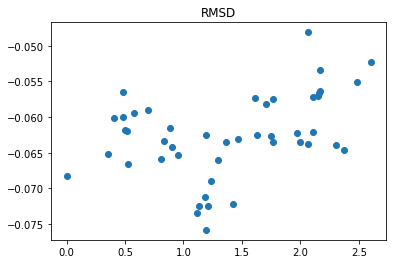

O=C([O-])c1ccc(CNS(=O)(=O)c2ccsc2C(=O)[O-])cc1
tensor(2.3221)


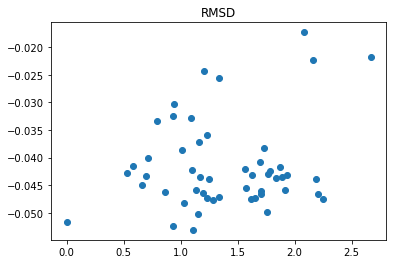

CC(O)(CS(=O)(=O)c1ccc(F)cc1)C(=O)Nc1ccc(C#N)c(C(F)(F)F)c1
tensor(4.1170)


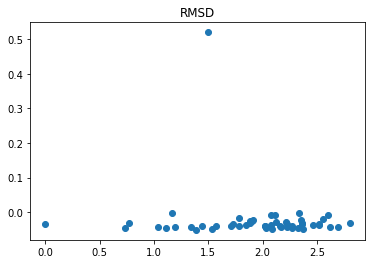

CN(C)C(=O)c1cc(-c2[nH]ncc2-c2ccccc2)c[nH]1
tensor(2.0410)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([45, 1])) that is different to the input size (torch.Size([45])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


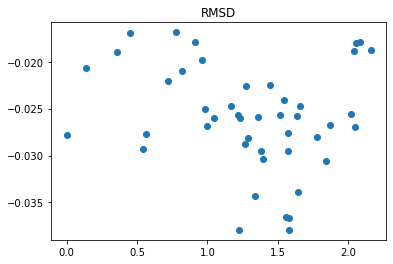

Cc1ccc(C(=O)Nc2cccc(N3CCOCC3)c2)cc1-c1ccc2c(C3CC[NH2+]CC3)noc2c1
tensor(3.9775)


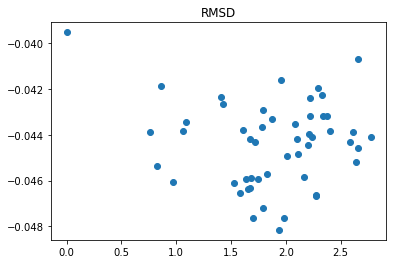

Cc1cc(OCCCc2c(C(=O)[O-])[nH]c3cc(Cl)ccc23)cc(C)c1Cl
tensor(4.4019)


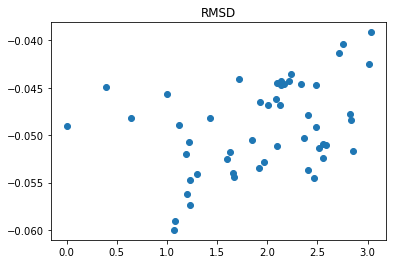

Nc1nc(=O)c2ncc(C(=O)NC(CO)C(=O)NC(Cc3c[nH]c4ccccc34)C(=O)[O-])nc2[nH]1
tensor(7.1522)


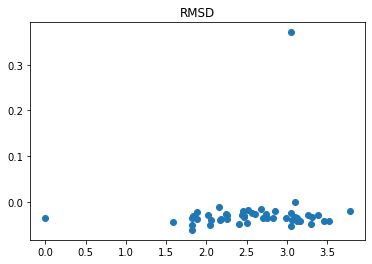

Nc1nc(=O)c2ncc(C(=O)NCC(=O)NC(Cc3ccccc3)C(=O)NC(Cc3ccccc3)C(=O)[O-])nc2[nH]1
tensor(10.3873)


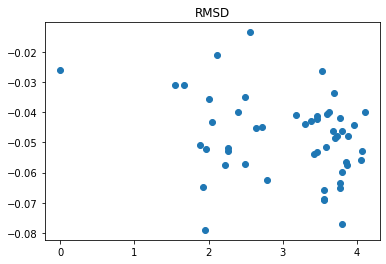

NC(=[NH2+])NCCCCC([NH3+])P(=O)([O-])[O-]
tensor(1.4576)


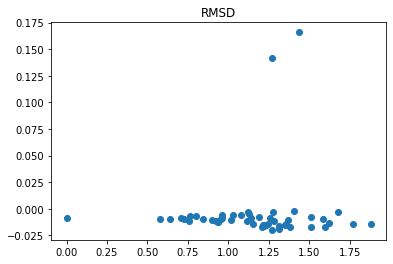

CCc1c(C)nc(-c2ccc(Cl)s2)nc1Nc1ccc(CC(=O)[O-])cc1
tensor(1.3795)


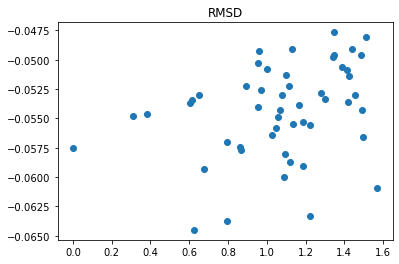

CCc1[nH]c2nc(Sc3cnc4nccnc4c3)nc(N3CCC([NH3+])C3)c2c1Cl
tensor(4.4936)


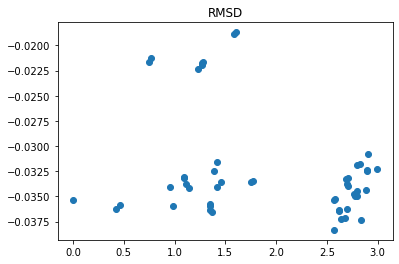

O=c1[nH]c(-c2ccccc2F)cs1
tensor(0.8893)


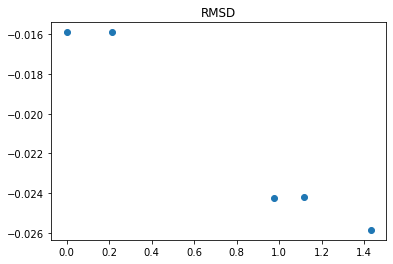

CCCC(=O)Nc1cc(NS(=O)(=O)c2cccs2)cc(-c2csc(=O)[nH]2)c1
tensor(4.5977)


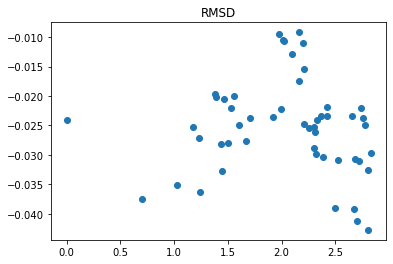

NC(=O)NC(NC(N)=O)C(=O)[O-]
tensor(1.4309)


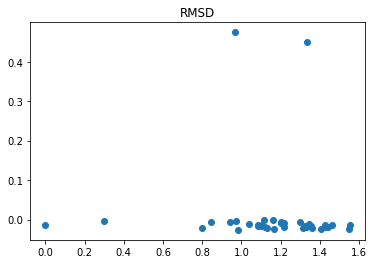

COc1ccc2c(c1)C(=O)N(c1nc(C(=O)Nc3cnccc3N3CC[NH2+]CC3)cs1)C2
tensor(3.0973)


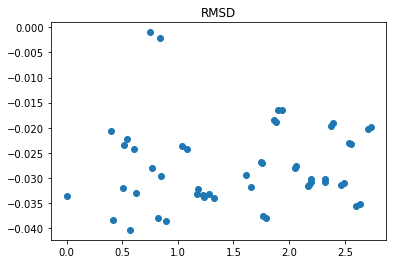

O=C(Nc1ccccc1N1CC[NH2+]CC1)c1csc(-n2ncc3ccccc32)n1
tensor(4.5330)


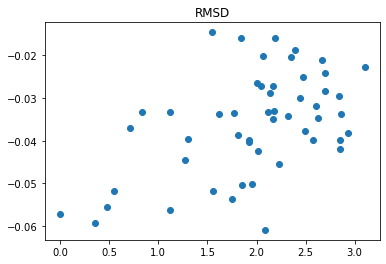

OCC(O)COCC(O)CO
tensor(1.6439)


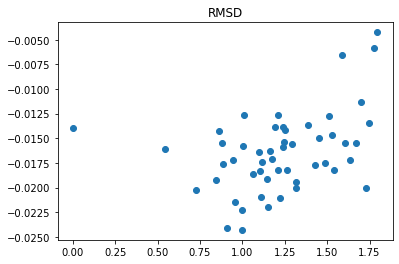

Cn1c(N2CCOCC2)nc2c1c(=O)n(Cc1ccc(Cl)c(Cl)c1)c(=O)n2C
tensor(2.6542)


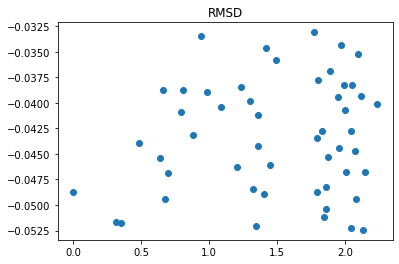

Cc1[nH]c2ccccc2c1CC(=O)NC(Cc1ccccc1)C(=O)N(C)c1ccccc1
tensor(4.6304)


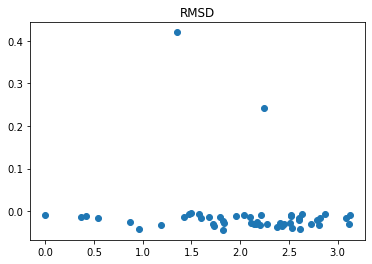

CC(O)C(N)C(=O)NS(=O)(=O)c1cccc(-c2ccc3[nH]ncc3c2)c1
tensor(4.2243)


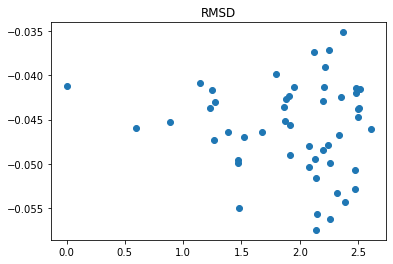

CC(O)C(N)C(=O)NS(=O)(=O)c1cccc(-c2ccc3c(N)nc(Cl)nc3c2)c1
tensor(4.7977)


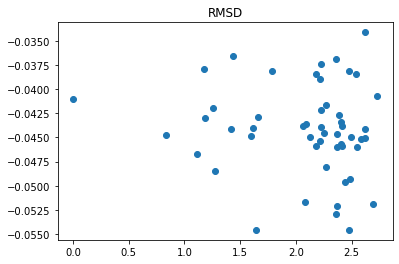

COc1cc(-c2cnc3[nH]cc(C(=O)NC(C)C)c3n2)cc(OC)c1OC
tensor(1.3485)


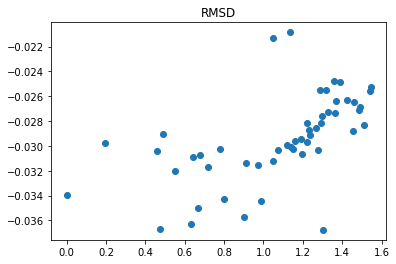

CC(C)NC(=O)c1c[nH]c2ncc(-c3nn(C)c4cc(Cl)ccc34)nc12
tensor(3.3427)


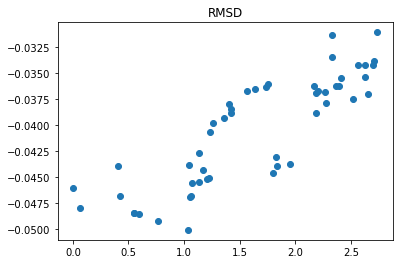

CC(C)(C)NC(=O)c1c[nH]c2ncc(-c3ncn4c3CCCC4)nc12
tensor(2.4120)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([18, 1])) that is different to the input size (torch.Size([18])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


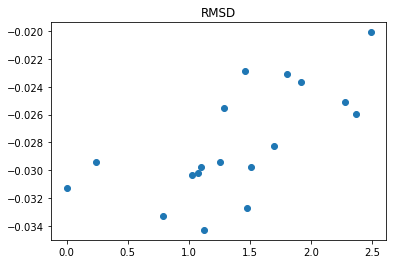

CCCc1cscc1CC(NC1=NC(C)(C)Cc2cc(Cl)ccc21)C(=O)[O-]
tensor(3.7648)


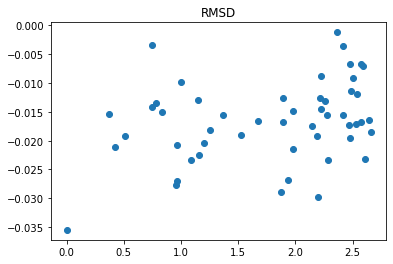

CC1(C)Cc2cc(Cl)ccc2C(NC(Cc2cscc2Br)C(=O)[O-])=N1
tensor(3.5501)


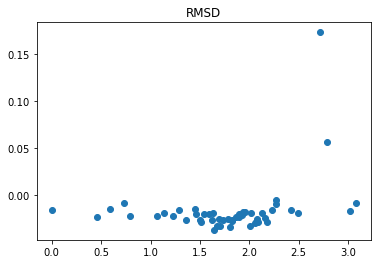

CCCc1scc(-c2cn[nH]c2)c1CC(NC1=NC(C)(C)Cc2cc(Cl)ccc21)C(=O)[O-]
tensor(8.3204)


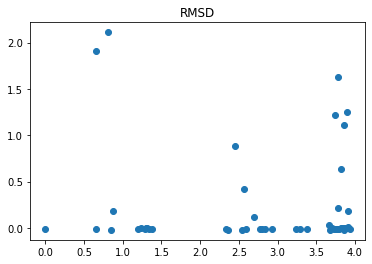

CC1(C)Cc2cc(Cl)ccc2C(NC(Cc2cscc2-c2cn[nH]c2)C(=O)[O-])=N1
tensor(5.4475)


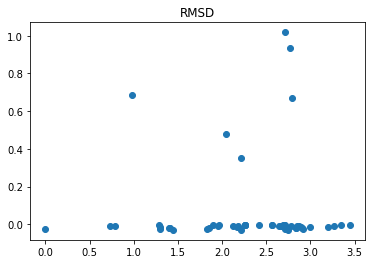

C[NH2+]C(C)C(=O)NC(C(=O)N1CC2CCC[NH+]2CC1C(=O)NC1CCCc2ccccc21)C1CCCCC1
tensor(7.5087)


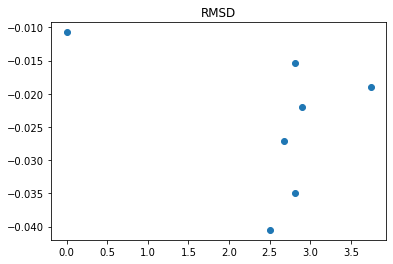

CS(=O)(=O)CCCOc1cccc2c1cnn2-c1ccnc(NC2CCC(O)CC2)n1
tensor(3.0877)


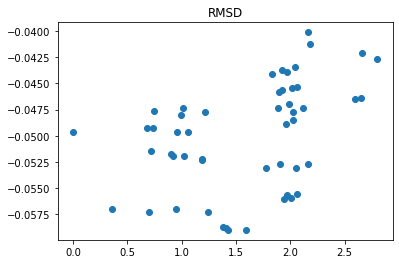

CC(C)(C)c1cccc(C2([NH2+]CC(O)C(Cc3cc(F)cc(F)c3)NC(=O)CCC(O)C(=O)[O-])CCCCC2)c1
tensor(8.9402)


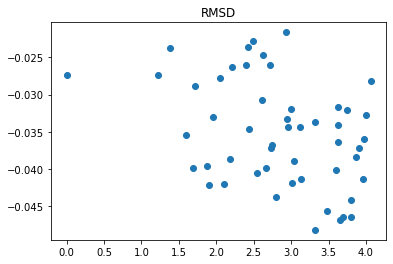

CC[NH+](CC)CCNc1cc(Nc2cc(O)ccc2C)nc(-n2cnc3ccccc32)n1
tensor(8.3584)


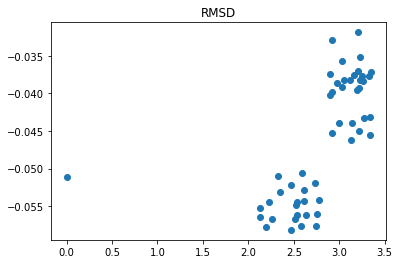

c1ccc(Cn2ccnc2)cc1
tensor(0.6788)


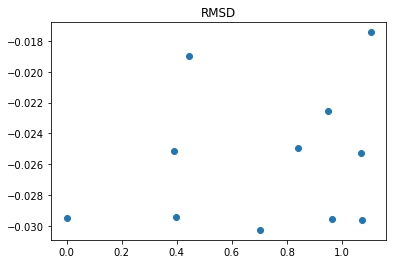

CN1c2ccc(NCc3ccc(C(C)(C)C)cc3)cc2-c2c(cnn2C)S1(=O)=O
tensor(2.8120)


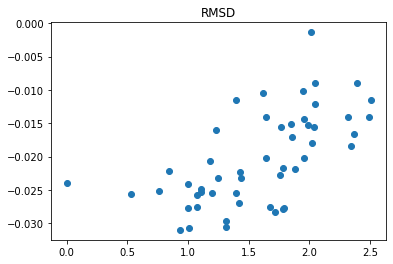

CC1(C)Cc2cc(Cl)ccc2C(NC(Cc2ccccc2)c2nc(=O)c3cnccc3[nH]2)=N1
tensor(4.5359)


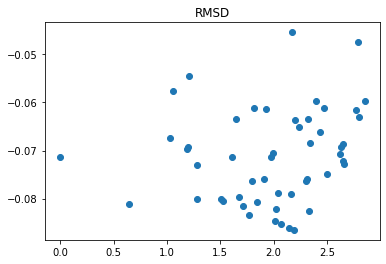

Cc1cccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(Nc3ncnc4ccc(N)cc34)cc2)c1
tensor(3.3036)


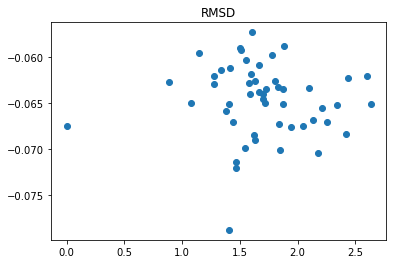

CCCC(=O)NC1C[NH2+]C(CO)C(O)C1O
tensor(1.1020)


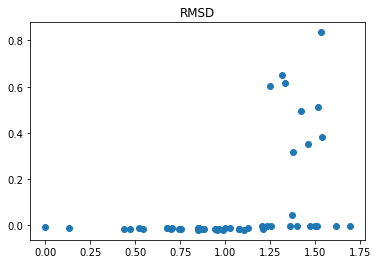

O=P([O-])([O-])C(CNc1ccccn1)P(=O)([O-])[O-]
tensor(1.2884)


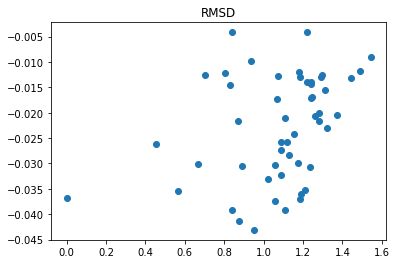

CNC(=O)C1Cc2ccc(NS(=O)(=O)[O-])cc2CN1C(=O)OC(C)(C)C
tensor(1.9891)


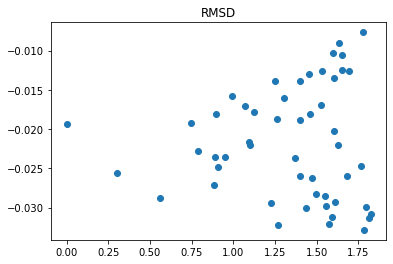

CC12CCC(=O)C=C1CCC1C2CCC2(C)C(C(=O)CO)CCC12
tensor(0.8108)


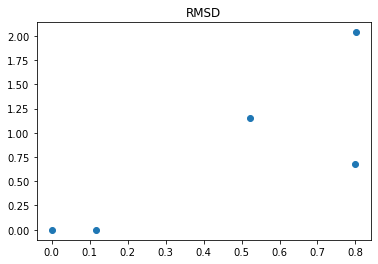

CC1(C)Cc2ccccc2C(NC(Cc2ccccc2)C(=O)[O-])=N1
tensor(2.6297)


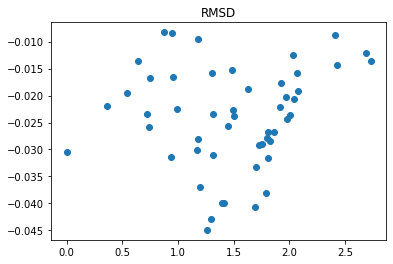

CC(O)(CCS)CC(=O)[O-]
tensor(1.1155)


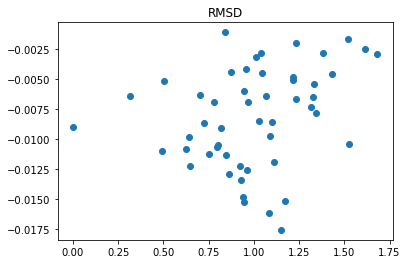

Oc1ccc(Nc2n[nH]c(-c3ccc(O)cc3)c2-c2ccc(O)cc2)cc1
tensor(2.2101)


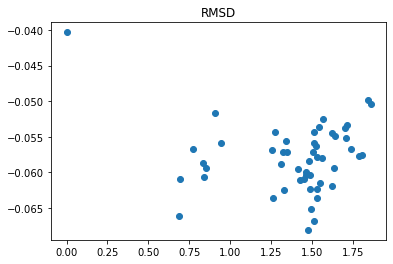

CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1
tensor(0.1153)


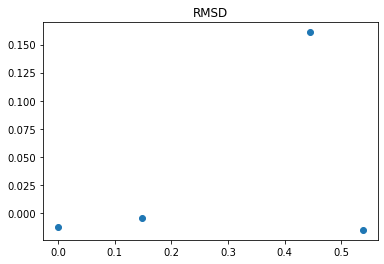

Cc1cccc(C(=O)C2=C(O)C(=O)N(c3ccc(CC(=O)[O-])cc3)C2c2cc(Cl)c3c(c2)OCO3)c1
tensor(3.5593)


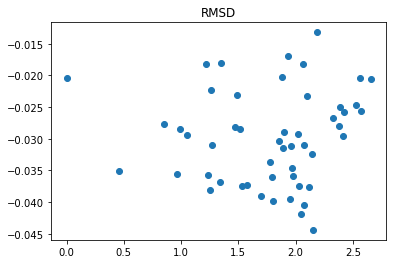

O=C([O-])c1cccc(N2C(=O)C(O)=C(C(=O)c3cccc(C(F)(F)F)c3)C2c2cc(Cl)c3c(c2)OCO3)c1
tensor(5.1137)


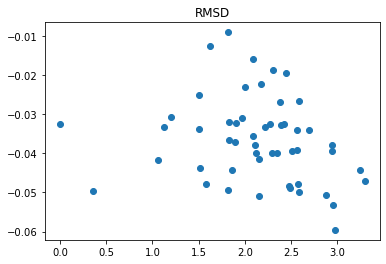

CC(NC(=O)CCc1nc2ccccc2c(=O)[nH]1)c1ccncc1
tensor(2.4843)


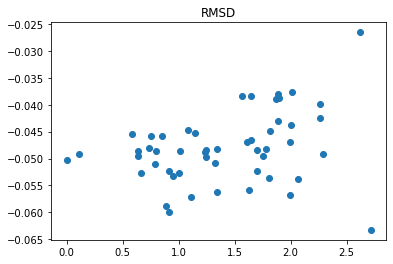

O=C([O-])c1cccc(N2C(=O)C(O)=C(C(=O)c3ccc(Cl)s3)C2c2cc(Cl)c3c(c2)OCO3)c1
tensor(3.4621)


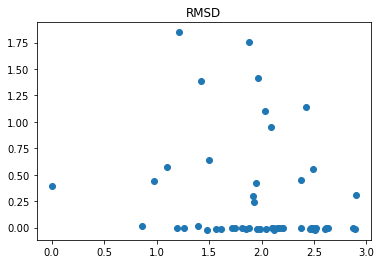

COc1cc(C(=O)[O-])cc([N+](=O)[O-])c1[O-]
tensor(0.2115)


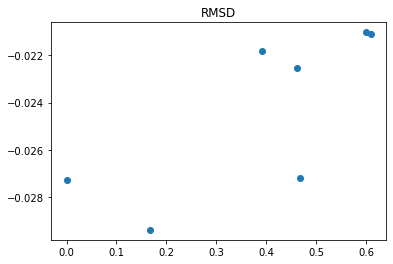

C#CC(O)c1ccccc1
tensor(0.0807)


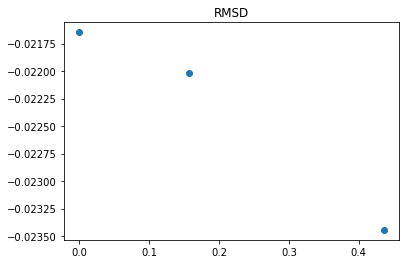

COc1cc2nc(-c3nccs3)n(-c3ccc4c(N)nc(N)[nH+]c4c3)c2cc1OC
tensor(1.8643)


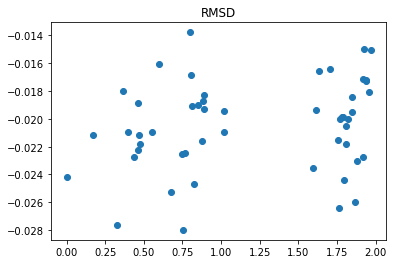

O=Cc1c[nH]c2c1ccc1c3ccccc3[nH]c12
tensor(0.0812)


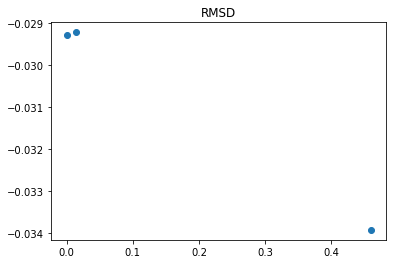

CC(NC(=O)c1c[nH]c2ncc(Oc3ccccc3)nc12)C1CC1
tensor(2.6427)


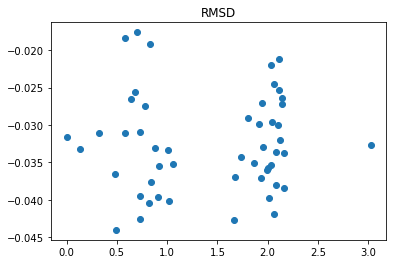

O=C(Nc1ccc([N+](=O)[O-])cc1)C1CC1
tensor(0.2776)


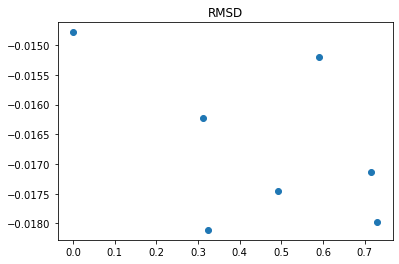

O=C1NC(Cc2ccc(O)cc2)C(=O)NC1Cc1ccccc1
tensor(3.5623)


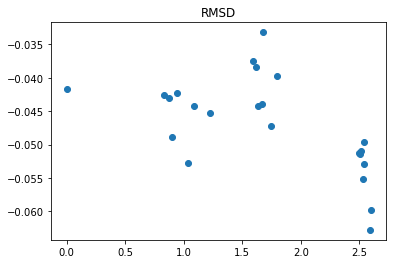

Fc1ccccc1Oc1cccn2c(C3(c4ccc(Cl)cc4)CC3)nnc12
tensor(2.9038)


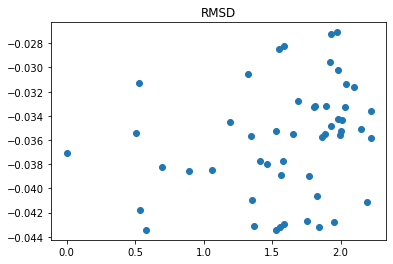

OC12CCC(c3nnc4c(Oc5ccccc5F)cccn34)(CC1)C2
tensor(1.8036)


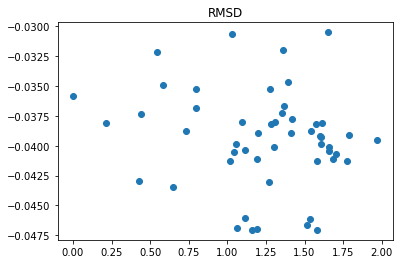

CCNC(=O)Nc1nc2cc(-c3cccnc3)cc(C(C)=O)c2[nH]1
tensor(1.8216)


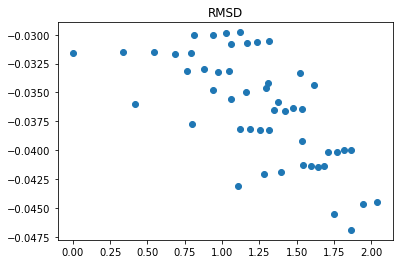

O=C([O-])c1ccc2cc[nH]c2c1
tensor(0.0132)


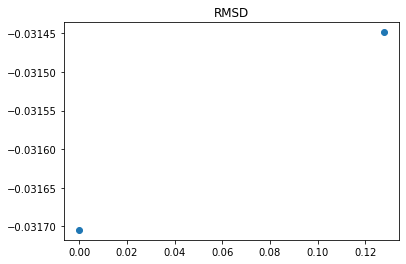

COCCN/C=C1/C(=O)N(C)c2ccc(C(F)(F)F)cc2N(c2ccccc2)C1=O
tensor(0.3554)


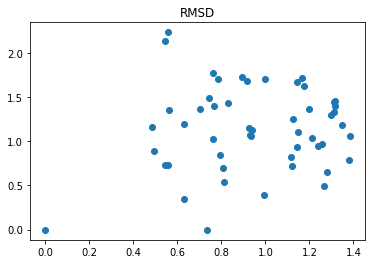

[NH3+]CC(=O)Nc1ccc2[nH]c(=O)[nH]c2c1
tensor(0.7838)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([19, 1])) that is different to the input size (torch.Size([19])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


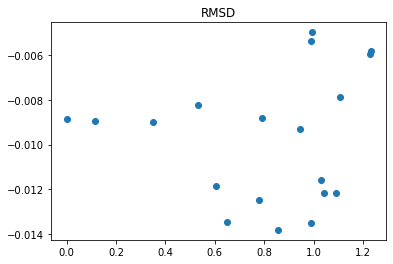

O=C(Nc1nccs1)C(CC1CCCCC1)n1c(=O)[nH]c2ccc(F)cc2c1=O
tensor(3.0151)


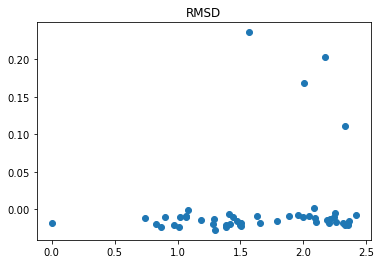

Cc1cn(C2CC(O)C(COP(=O)([O-])NP(=O)([O-])OP(=O)([O-])[O-])O2)c(=O)[nH]c1=O
tensor(4.9630)


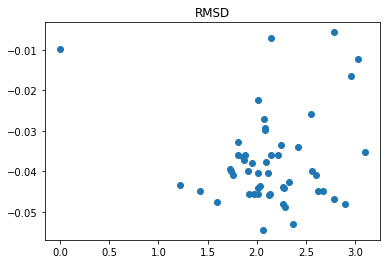

O=C1NC(Cc2ccc(O)cc2)C[NH2+]C1Cc1ccc(O)cc1
tensor(3.4246)


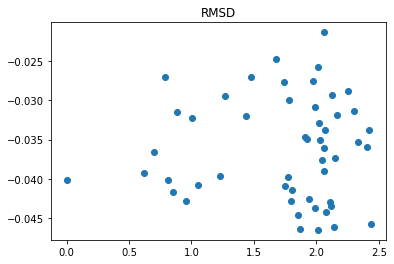

O=C1NC(Cc2ccc(O)c(O)c2)C(=O)NC1Cc1ccc(O)cc1
tensor(4.1525)


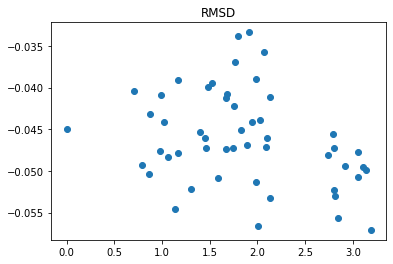

Nc1nc2c(ncn2C2CC(O)C(COP(=O)([O-])CP(=O)([O-])OP(=O)([O-])[O-])O2)c(=O)[nH]1
tensor(5.3765)


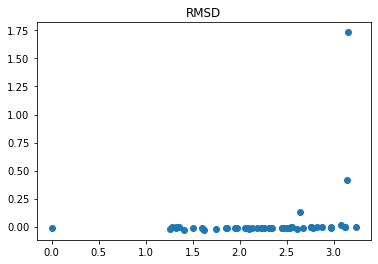

COc1cc(C2Nc3ccc(C(N)=[NH2+])cc3C3c4ccccc4CC23)c(-c2ccc(C(=O)[O-])cc2)cc1O
tensor(3.2045)


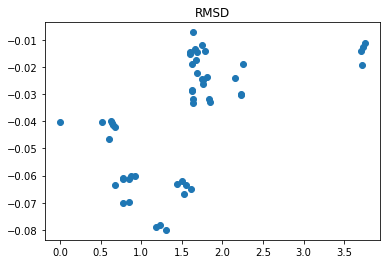

CCC1(CC)CC(C(=O)NCc2ccc(C(N)=[NH2+])cc2)n2c1c(Cl)nc(NC1CCC1)c2=O
tensor(4.4209)


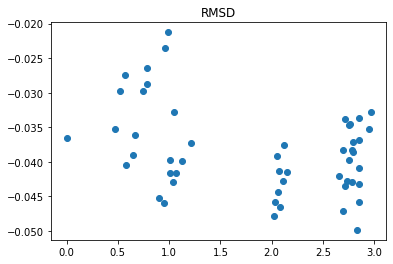

COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n(C(C)c3ccccn3)c12
tensor(3.0012)


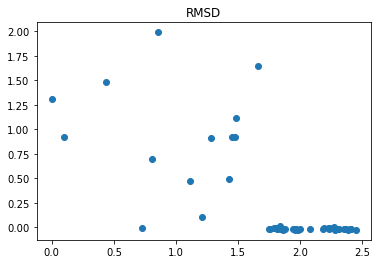

Oc1ccc(-c2c3cccc(C(F)(F)F)c3nn2Cc2ccccc2)c(O)c1
tensor(2.0383)


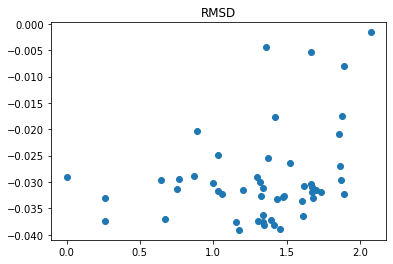

Cc1ccccc1C(=O)c1c[nH]c(C(=O)NCc2ccco2)c1
tensor(2.3223)


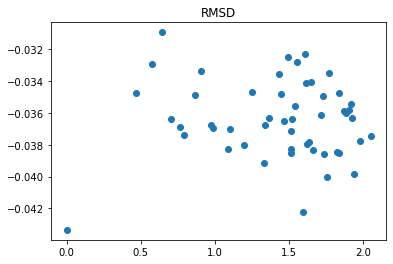

O=P([O-])([O-])OCC(O)CO
tensor(0.6327)


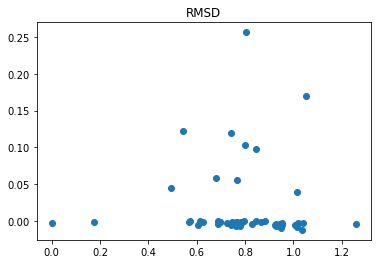

CC(C)Cn1nc(-c2ccc(O)cc2O)c2cccc(C(F)(F)F)c21
tensor(1.1494)


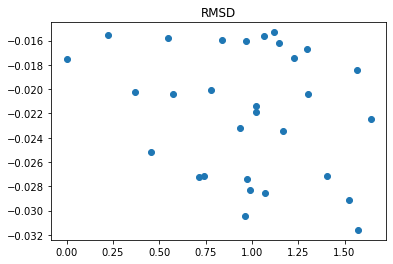

C=CCCn1nc(-c2ccc(O)cc2O)c2cccc(C(F)(F)F)c21
tensor(1.3747)


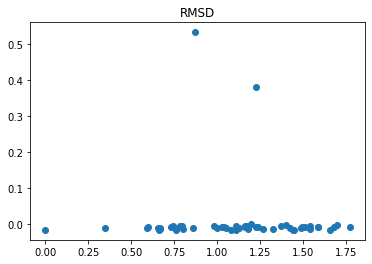

C=CCCn1nc2c(C(F)(F)F)cccc2c1-c1ccc(O)cc1O
tensor(1.6744)


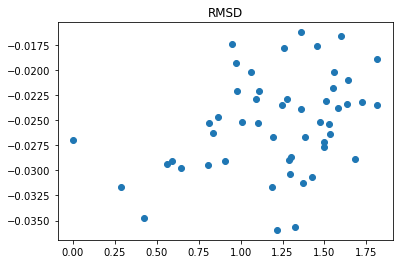

Cc1cc(O)ccc1-c1ccc(-c2ccc(O)cc2C)s1
tensor(1.3447)


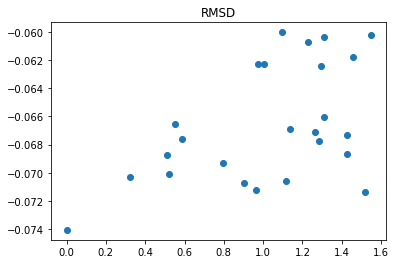

Cc1noc(C)c1-c1cc(O)cc(C(O)c2ccccc2)c1
tensor(3.1290)


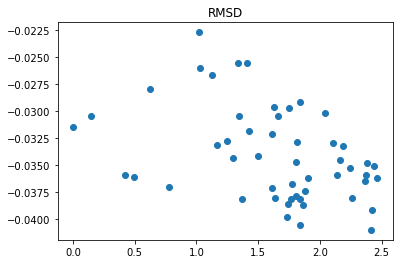

N#Cc1ccc(C(=O)Nc2ccc(F)c(C3(CF)N=C(N)OCC3F)c2)nc1
tensor(4.5853)


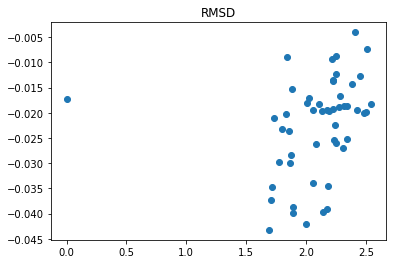

CC1(c2cc(NC(=O)c3ccc(C#N)cn3)ccc2F)N=C(N)OCC1F
tensor(2.9216)


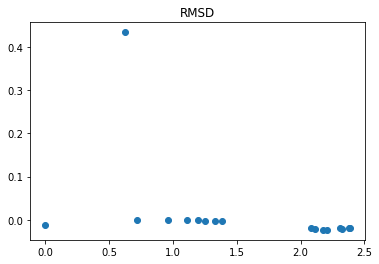

CC1(c2cc(NC(=O)c3ccc(C#N)cn3)ccc2F)CCOC(N)=N1
tensor(2.9452)


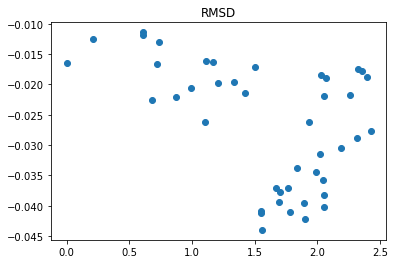

CC1(c2cc(NC(=O)c3ccc(C#N)cn3)ccc2F)N=C(N)OC(C(F)(F)F)C1F
tensor(2.6479)


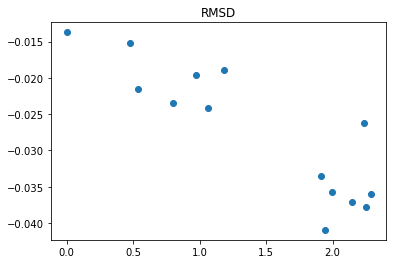

CC1(c2cc(NC(=O)c3ccc(C#N)cn3)ccc2F)CC(C(F)(F)F)OC(N)=N1
tensor(3.6664)


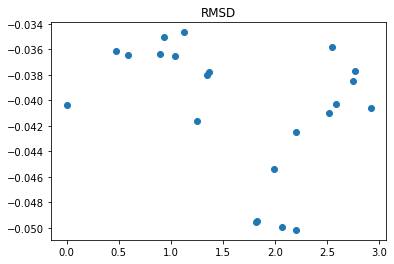

N#Cc1ccc(C(=O)Nc2ccc(F)c(C3(CF)CC(C(F)(F)F)OC(N)=N3)c2)nc1
tensor(2.5791)


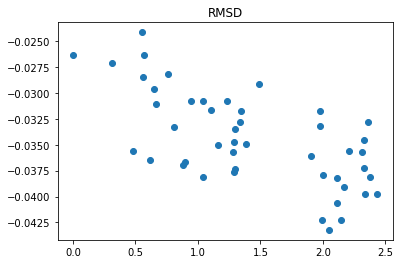

O=C([O-])c1ccc2ccccc2c1[O-]
tensor(0.0948)


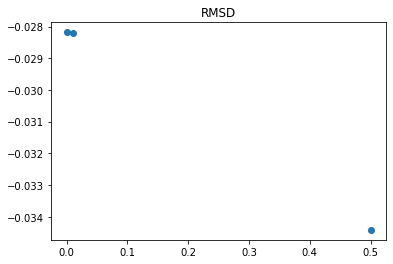

N#Cc1ccc(C(=O)Nc2ccc(F)c(C3(C(F)F)CCOC(N)=N3)c2)nc1
tensor(3.6257)


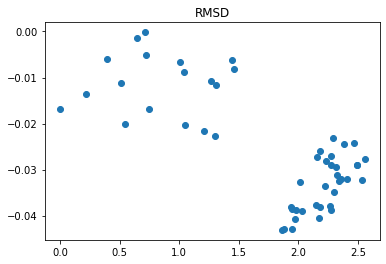

O=C([O-])C1CC1C(=O)c1ccc(Cl)c(Cl)c1
tensor(1.1217)


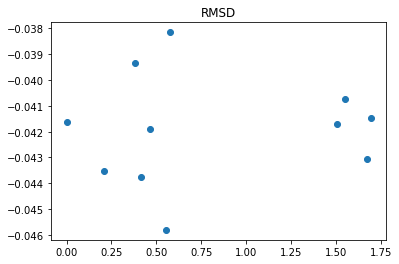

CC(NC(=O)c1ccc(C#N)n1C)c1c(F)cccc1Cl
tensor(2.0841)


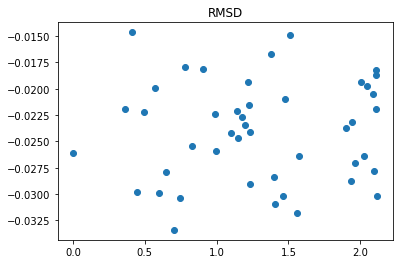

COc1nc2cccnc2n1C1CC(Nc2nc3ccccc3s2)C1
tensor(2.8814)


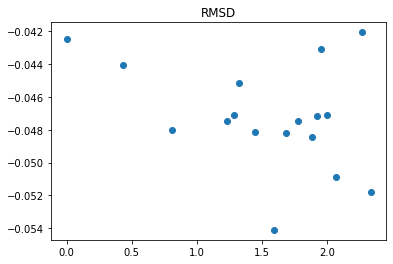

CC(CP(=O)([O-])C(Cc1ccccc1)NC(=O)C([NH3+])Cc1nnn[nH]1)C(=O)NC(C)C(N)=O
tensor(4.9918)


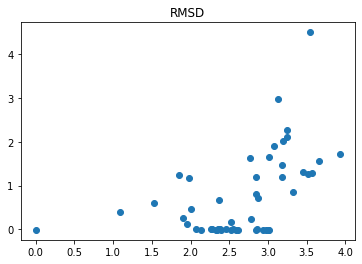

CS(=O)(=O)C1CCN(c2cccc3c2ccn3-c2ccnc(NC3CCC(O)CC3)n2)CC1
tensor(2.8727)


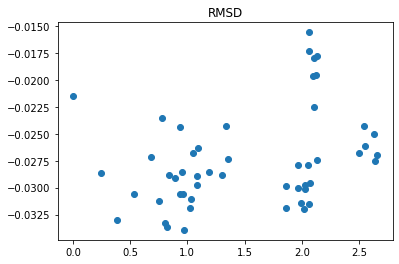

C=CC1(F)CN(C2CCCC2)c2nc(Nc3ccc(C(=O)NN4CC[NH+](C)CC4)cc3OC)ncc2N(C)C1=O
tensor(8.3787)


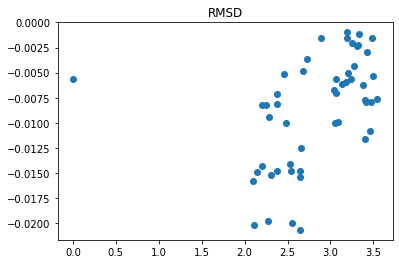

CC(O)c1nc2cnc3[nH]ccc3c2n1C1CCC(C#N)CC1
tensor(0.3584)


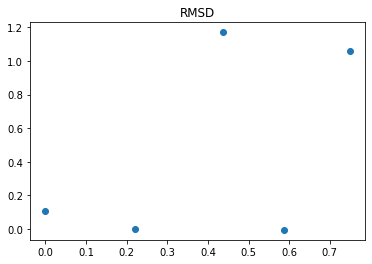

O=c1c2cc(CS(=O)(=O)NCc3ccccn3)ccc2ccc2ncc(-c3cnn(C4CC[NH2+]CC4)c3)cc12
tensor(3.0590)


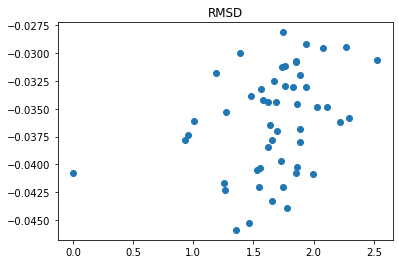

Cc1ccc(NC(=O)C(COC(C)C)Oc2ncnc3c2cnn3-c2ncccc2Cl)nc1
tensor(2.5718)


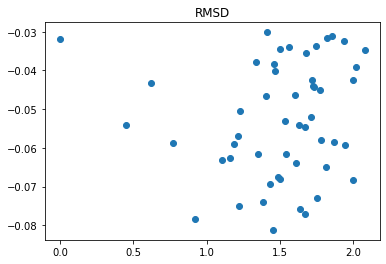

CCCC1(CC(=O)[O-])OCCc2c1[nH]c1c(Cl)ccc(Cl)c21
tensor(0.8377)


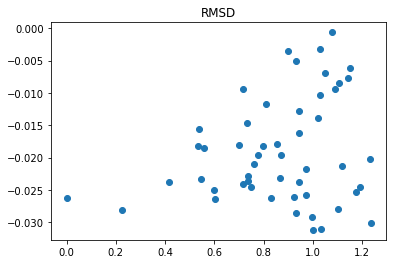

O=C([O-])c1ccc(Cl)cc1NS(=O)(=O)c1cc(Cl)c(Cl)cc1Cl
tensor(4.6506)


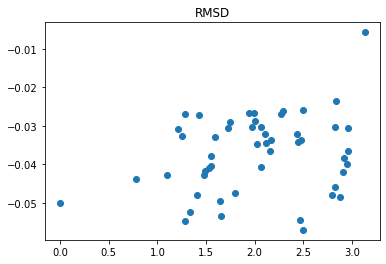

O=C([O-])c1ccc(Cl)cc1NS(=O)(=O)c1ccc(Br)s1
tensor(3.8912)


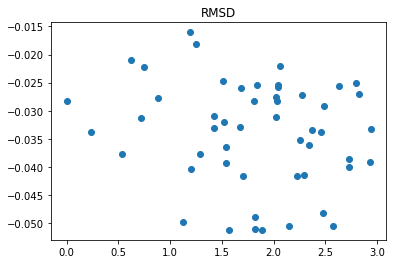

Cc1ccc(S(=O)(=O)Nc2ccc(Oc3ccccc3)cc2C(=O)[O-])cc1
tensor(4.3250)


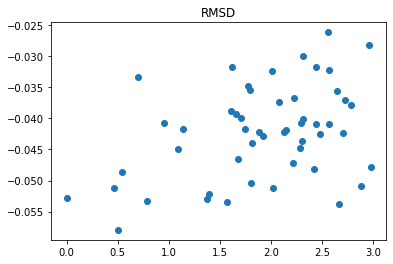

O=C1NC(c2cccnc2)c2c(-c3ccccc3)n[nH]c21
tensor(0.6993)


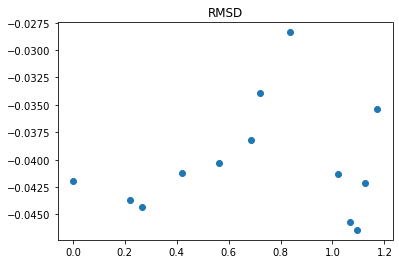

O=C(CCC(NC(=O)c1ccc(C#Cc2ccccc2)cc1)C(=O)N[O-])NCCCO
tensor(6.3506)


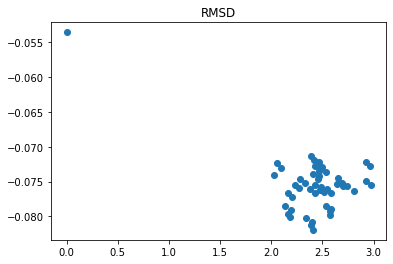

COc1ccc(Cn2cnc3cc4c(cc32)CCCC4)cc1C
tensor(2.7596)


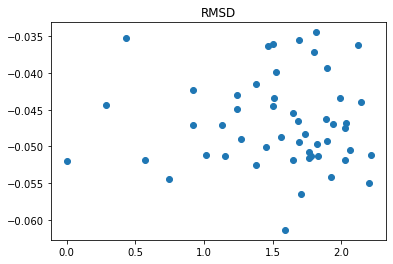

O=C(Nc1cccc(C(F)(F)F)c1)Nc1cc(S(=O)(=O)NC2CC2)ccc1-c1ccsc1
tensor(2.4189)


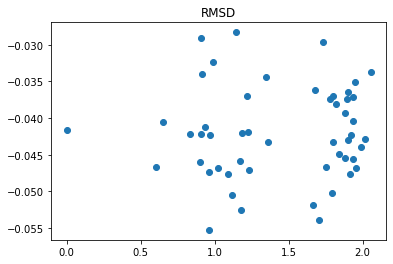

CCC(=O)OCC(C)CCC1OC2CC3C4CC=C5CC(O)CCC5(C)C4CCC3(C)C2C1C
tensor(4.5172)


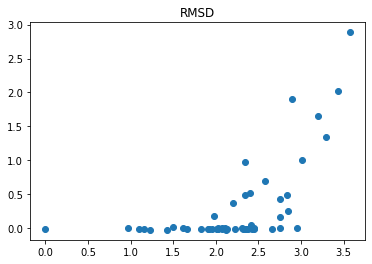

NC(=O)c1ncc(NC2CCC[NH2+]C2)c2nc(-c3ccc(Cl)cc3)cn12
tensor(1.2820)


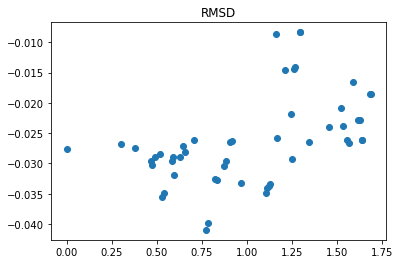

CN(C(=O)c1ccc(F)cc1C(F)(F)F)C1CCN(c2nnc(-c3ccnn3C)c3ccccc23)CC1
tensor(3.4759)


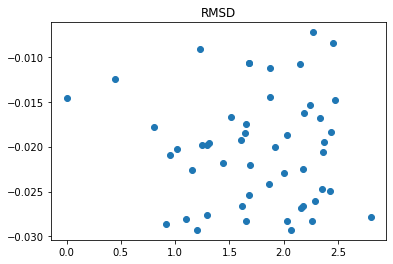

Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2[nH+]1
tensor(1.9051)


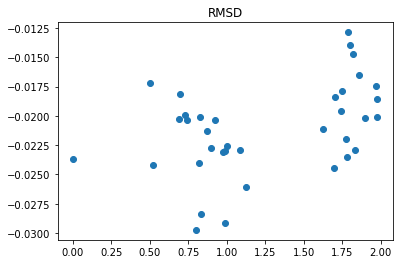

CCC(C)(C)c1nn(CCO)c2c1N=C(c1ccc(-n3ccnc3C)cc1)CNC2=O
tensor(0.4525)


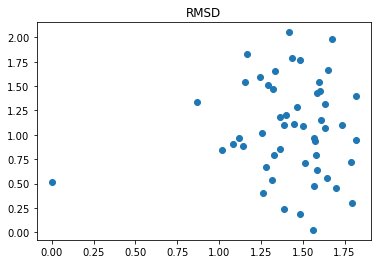

CNc1nc(C)nc(N2CCC(C(=O)NCc3ccccc3C(F)(F)F)CC2)n1
tensor(3.5091)


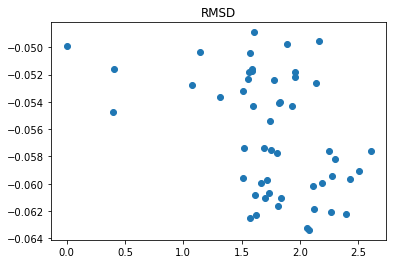

CCC([NH2+]C(C)CC(=O)NCC[NH3+])c1ccc(Cl)c(Oc2ccccc2)c1F
tensor(5.2604)


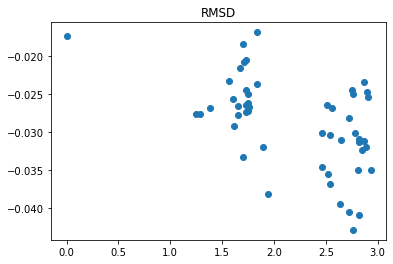

CC(=O)NC(Cc1cc(F)cc(F)c1)C(O)C[NH2+]C1(c2cccc(C(C)(C)C)c2)CCCCC1
tensor(5.2954)


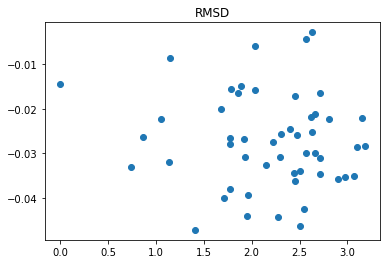

O=C(Nc1cccc(C(=O)[O-])c1O)c1ccccc1
tensor(0.6672)


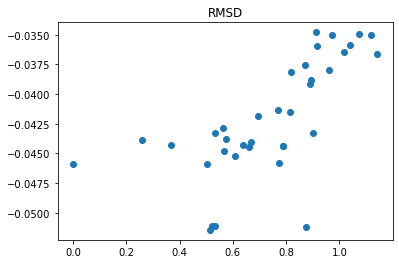

OCc1cnc2cc[nH]c2c1
tensor(0.1400)


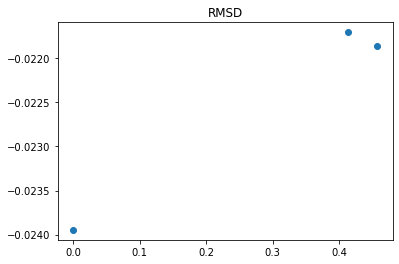

c1ccc(C2Nc3ccccc3-c3nc4ccccc4n32)nc1
tensor(0.6539)


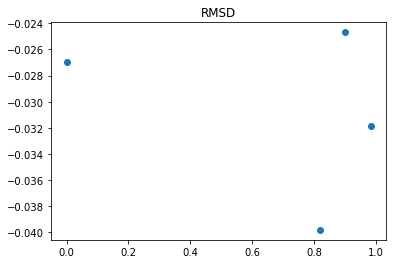

CNc1nc2ccccc2[nH]1
tensor(0.0063)


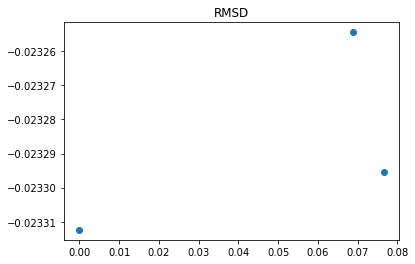

Cc1cnc(Nc2ccc(N3CC[NH+](C)CC3)cc2)nc1Nc1cccc(S(=O)(=O)NC(C)(C)C)c1
tensor(6.4472)


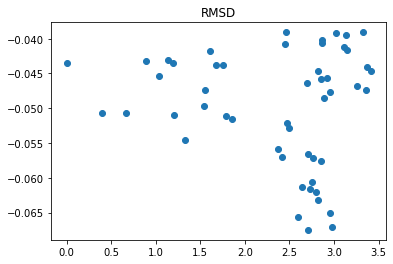

CN1C(=O)C2(CC(C)(C)Oc3ccc(-c4cccc(Cl)c4)cc32)[NH+]=C1N
tensor(1.0834)


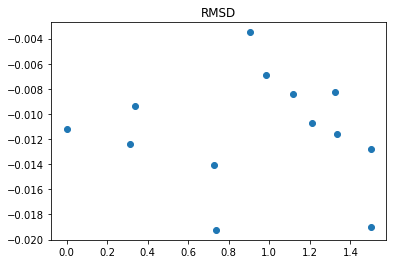

CN1C(=O)C2(CC(C)(C)Oc3ccc(-c4cccc(C#N)c4)cc32)[NH+]=C1N
tensor(1.5146)


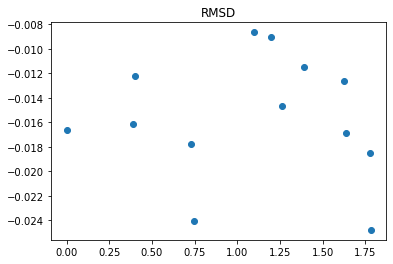

CN1C(=O)C2(CC(C)(C)Cc3ccc(-c4cncnc4)cc32)[NH+]=C1N
tensor(0.4548)


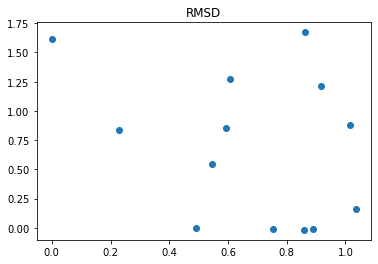

Cc1ccc(C(=O)NC2CC2)cc1NC(=O)c1ccc(-c2ccccc2Cl)s1
tensor(2.9352)


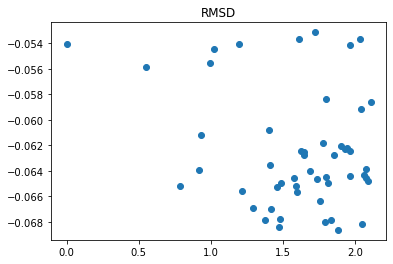

CC1CCC(C(=O)N(c2ccc(Oc3ccccc3C(F)(F)F)cc2C(=O)[O-])C(C)C)CC1
tensor(4.3685)


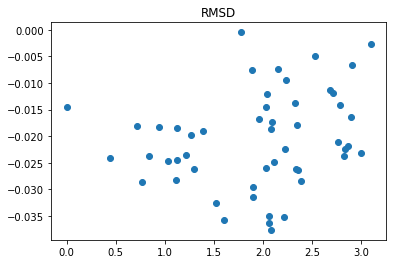

O=c1ncn(Cc2ccc(F)cc2F)c2ccc(Oc3ncccc3C(F)(F)F)cc12
tensor(3.5655)


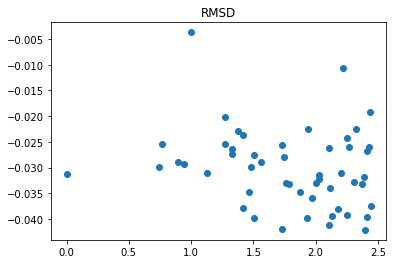

O=Cc1cnc2cc[nH]c2c1
tensor(0.0965)


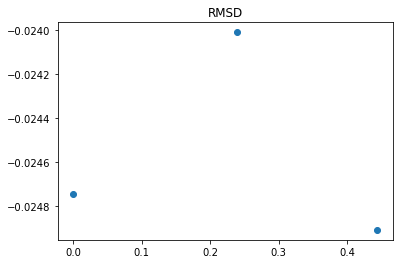

COc1ccc(C(=O)Nc2ccc(Oc3ccc(N(C(=O)C4CCC(C)CC4)C(C)C)c(C(=O)[O-])c3)cc2)cc1
tensor(4.3202)


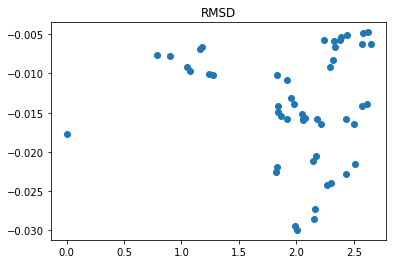

CN1C(=O)C(Cc2ccccc2)OC(c2ccc(Br)cc2)C1c1ccc(Br)cc1
tensor(0.9782)


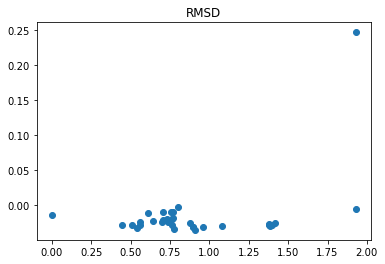

Cc1ccc(-c2cc3c(NC(P(=O)([O-])[O-])P(=O)([O-])[O-])ncnc3s2)cc1
tensor(0.5254)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([24, 1])) that is different to the input size (torch.Size([24])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


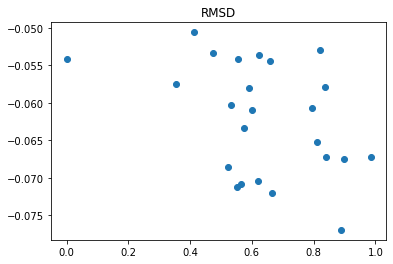

COc1ccc(-c2nc3c(NCCCNC(=O)C4(C[NH3+])CC4)c(Br)cnc3[nH]2)cc1
tensor(2.2753)


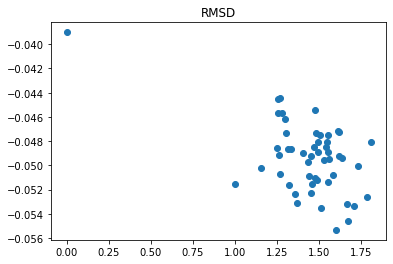

CCCc1cnn(O)c1C([NH3+])C(=O)[O-]
tensor(1.3371)


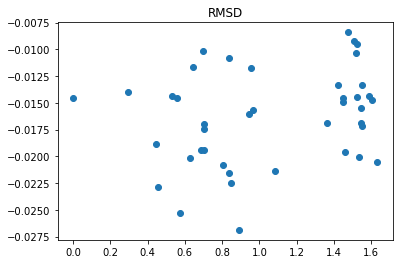

O=C([O-])C(O)CC(O)CCCO
tensor(1.5387)


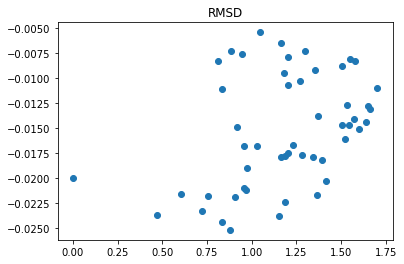

[NH3+]C1CCC(Nc2nc(Nc3cccc(C(F)(F)F)c3)c3c(=O)[nH]ccc3n2)CC1
tensor(3.4789)


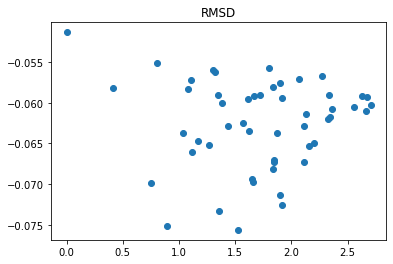

COc1ccc(-c2ccc(C(=O)NC(CO)C(C)(C)C)cc2C(=O)[O-])c(C(=O)Nc2ccc(C(N)=[NH2+])cc2)n1
tensor(3.5743)


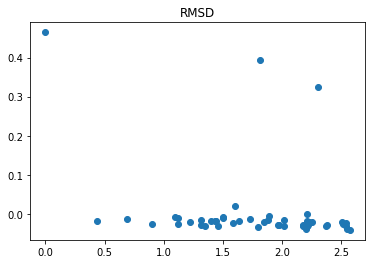

COc1ccc(-c2ccc(C(=O)NC(CO)C(C)(C)C)cc2C(=O)[O-])c(C(=O)Nc2ccc3c(N)[nH+]ccc3c2)n1
tensor(4.6708)


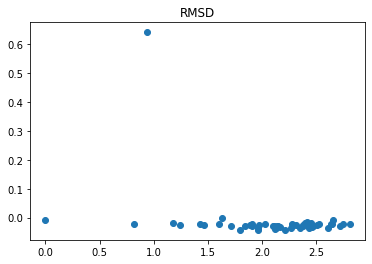

COc1ccc(-c2ccc(C(=O)NC(CO)C(C)(C)C)cc2C(=O)[O-])c(C(=O)Nc2cccc(C(N)=O)c2)n1
tensor(4.1222)


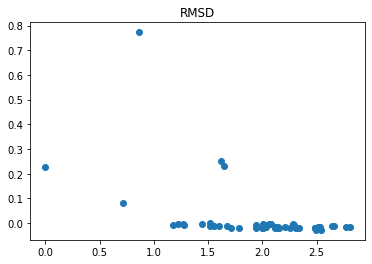

CCNC(=O)c1ccc(C(=O)NCCC2CCN(c3ncnc4cc(C(N)=O)sc34)CC2)s1
tensor(4.7759)


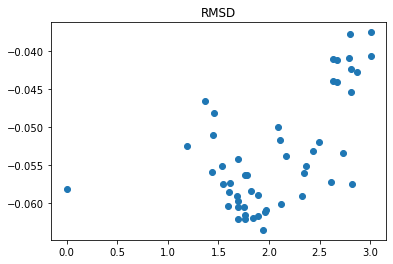

CC(C)(C)C(=O)NCCC1CCN(c2ncnc3cc(C(N)=O)sc23)CC1
tensor(2.8829)


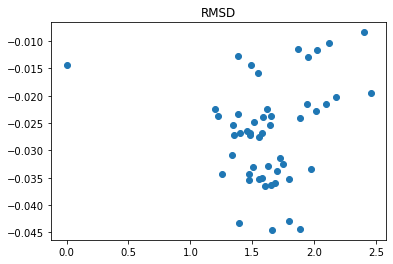

CS(=O)(=O)NCCC1CCN(c2ncnc3cc(C(N)=O)sc23)CC1
tensor(2.5516)


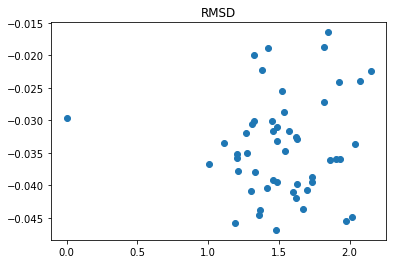

O=C([O-])C(O)(CC(O)C(O)C(O)C(O)COP(=O)([O-])[O-])OP(=O)([O-])[O-]
tensor(2.5175)


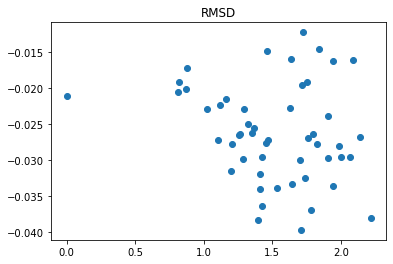

Cc1ccc(S(=O)(=O)Nc2ccc(Oc3ccc(C(=O)[O-])cc3)cc2C(=O)[O-])cc1
tensor(4.6123)


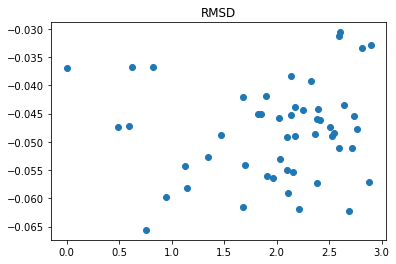

CC(=C/C=C/C(C)=C/C(=O)[O-])/C=C1\CCCc2ccccc21
tensor(2.2287)


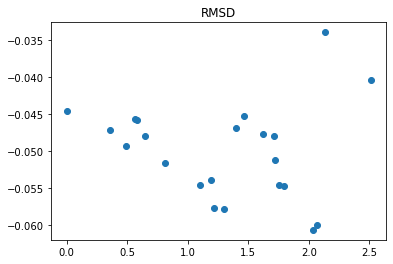

CC(C)CC1(C(=O)O)CC(c2cnccn2)C(c2nccs2)N1C(=O)c1ccc(C(C)(C)C)cc1
tensor(1.4237)


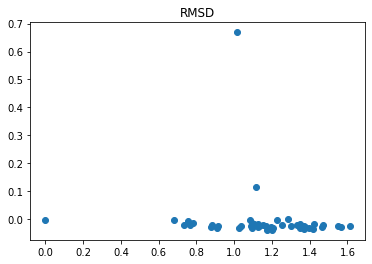

CCOc1cc(C(Nc2ccc3c(N)[nH+]ccc3c2)C(=O)NS(=O)(=O)c2ccccc2)ccc1OC(C)C
tensor(6.8072)


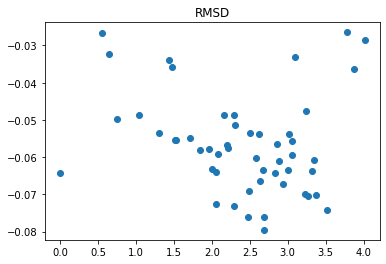

O=C(c1c(F)ccc([N-]S(=O)(=O)c2ccc(C(F)(F)F)cc2)c1F)c1c[nH]c2ncc(Cl)cc12
tensor(4.3168)


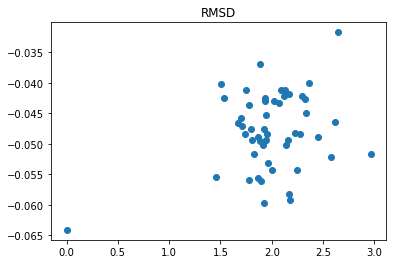

N#CC(c1ccc(F)cc1)c1cccc(C(F)(F)F)n1
tensor(2.2294)


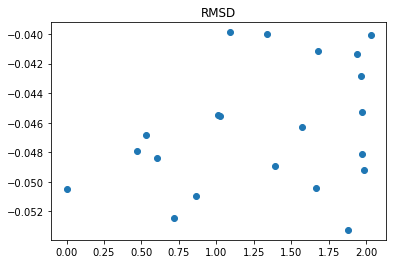

NC(c1ccc(-n2cccn2)cc1)P(=O)([O-])[O-]
tensor(0.6930)


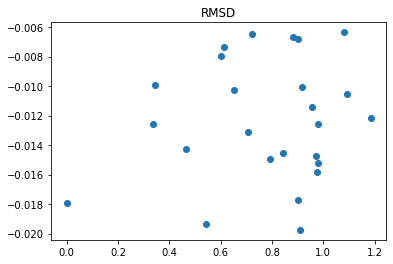

CC(Nc1cc(-c2c(N)nn3cccnc23)ncn1)c1ccc(F)cc1
tensor(5.9874)


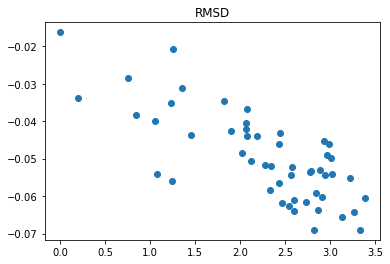

CCCC(CC(=O)[O-])n1c(=O)n(Cc2cc(Br)cc3c2CC(=O)N3)c2ccccc21
tensor(6.2548)


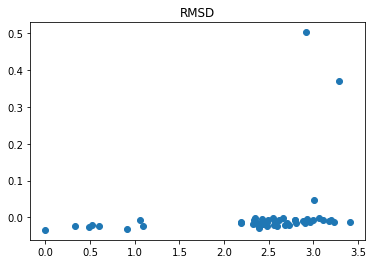

C[NH+]1CCC(Oc2ccc(-c3n[nH]c4cccc(OCC5CCCCC5)c34)cc2)CC1
tensor(2.1086)


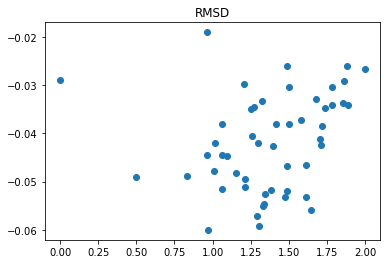

CC1CCC2C(C(=O)[O-])=CC3CC(C)(C)CC132
tensor(7.1019)


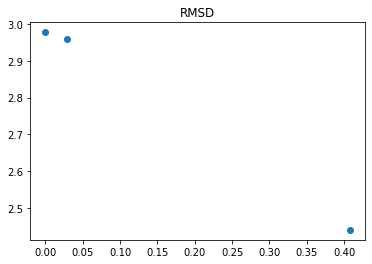

O=S(=O)([O-])CCC[n+]1ccccc1
tensor(0.7065)


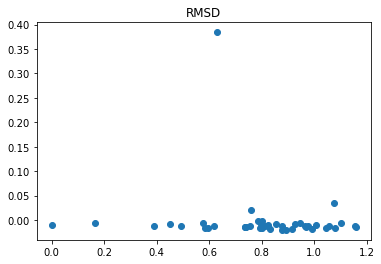

O=C(NCO)c1ccccc1
tensor(0.2778)


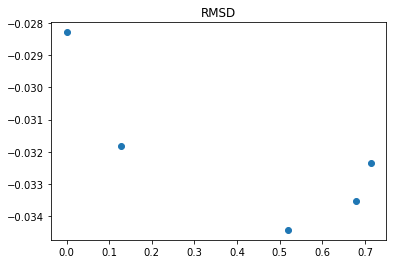

CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12
tensor(4.3532)


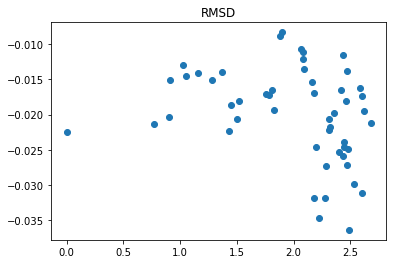

CCOC(=O)c1cnn2ccccc12
tensor(0.8944)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([15, 1])) that is different to the input size (torch.Size([15])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


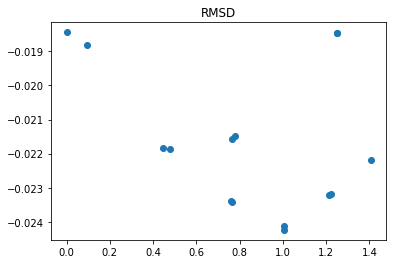

O=C(NCc1ccc(S(=O)(=O)N2CCCCC2)cc1)c1cc2cnccc2[nH]1
tensor(3.5923)


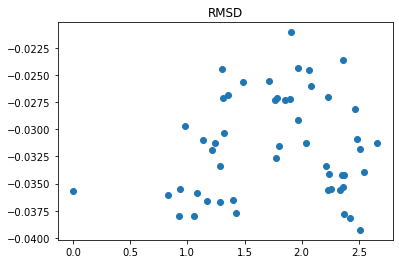

O=C(NCc1ccc(S(=O)(=O)c2cc(F)cc(F)c2)cc1)c1ccc2nccn2c1
tensor(4.0211)


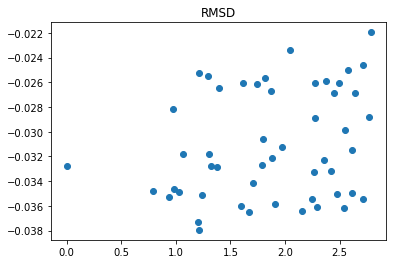

CCc1ccc2c(c1)C([NH2+]CC(O)C1Cc3cccc(c3)CCCCCCCC(=O)N1)CC1(CCC1)O2
tensor(5.5401)


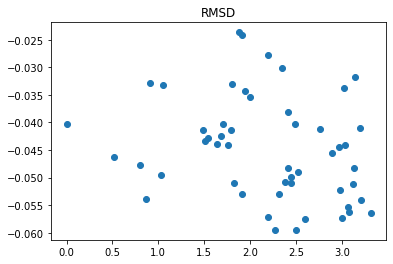

[NH-]S(=O)(=O)c1nc2c(F)c(F)c(F)c(F)c2s1
tensor(0.4904)


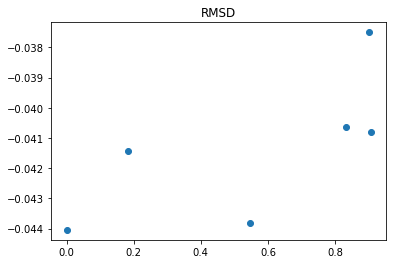

CCc1ccc2c(c1)C([NH2+]CC(O)C1Cc3cccc(c3)CCCCn3cc(ccc3=O)C(=O)N1)CC1(CCC1)O2
tensor(7.2776)


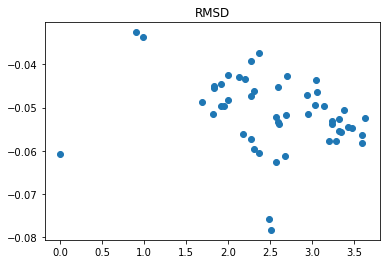

CCc1ccc2c(c1)C([NH2+]CC(O)C1Cc3cccc(c3)CCCCCCC(=O)N1)CC1(CCC1)O2
tensor(5.0896)


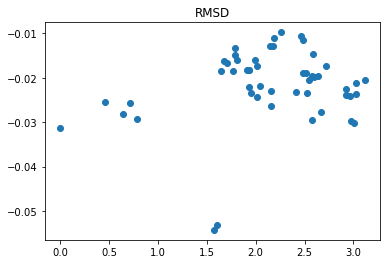

CCNC(=O)C1c2ccccc2CN1C(=O)c1cc(Cl)c(O)cc1O
tensor(4.9541)


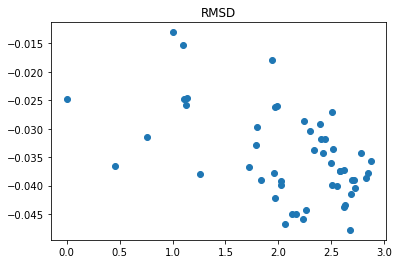

C[NH2+]C(C)C(=O)NC1CN(C(=O)c2ccc(N)cc2)c2ccccc2N(Cc2c(OC)ccc3ccccc23)C1=O
tensor(5.1056)


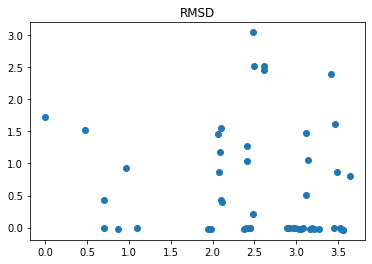

C[NH2+]C(C)C(=O)NC1C(=O)N(Cc2c(OC)ccc3cc(C(=O)[O-])ccc23)c2ccccc2OC12CCOCC2
tensor(6.7103)


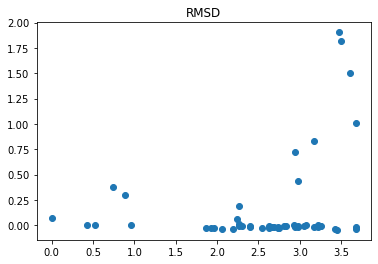

O=C(C1CC1)N1CCCC(Nc2nccc(-n3c(-c4ccc5ccccc5c4)nc4ccc(O)cc43)n2)C1
tensor(8.2183)


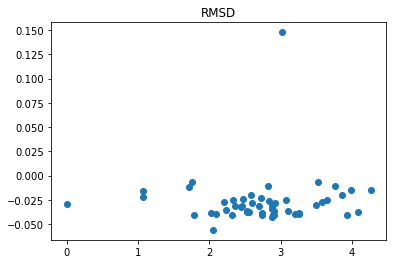

Nc1nc(=O)n(C2CSC(COP(=O)([O-])OP(=O)([O-])OP(=O)([O-])[O-])O2)cc1F
tensor(3.2671)


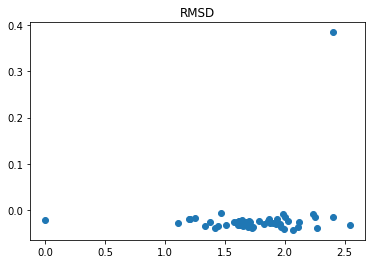

Nc1ccn(C2CC(O)C(COP(=O)([O-])OP(=O)([O-])OP(=O)([O-])[O-])O2)c(=O)n1
tensor(3.2973)


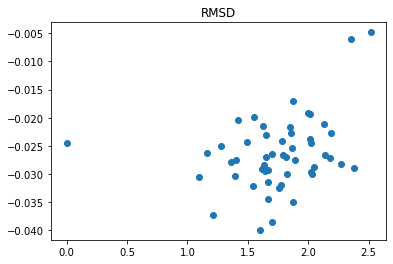

CCCCCCc1cc(=O)c(Oc2ccc(N)cc2C)cn1C
tensor(4.7027)


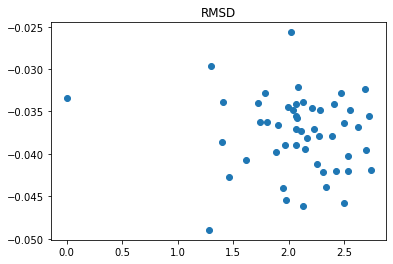

COc1cc2c(Nc3ccc(NC(=O)c4ccccc4)cc3)nc(Cc3ccccc3)nc2cc1O
tensor(2.6500)


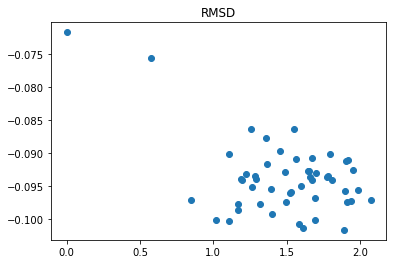

COc1cc2c(Nc3ccc(NC(=O)c4ccccc4)cc3)ncnc2cc1OCC(=O)[O-]
tensor(1.2415)


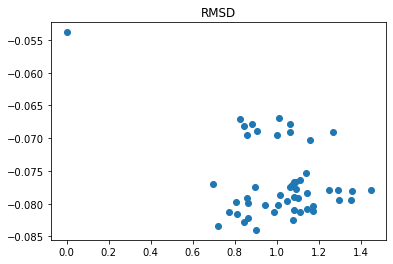

[NH-]S(=O)(=O)c1nnc(N)s1
tensor(0.5769)


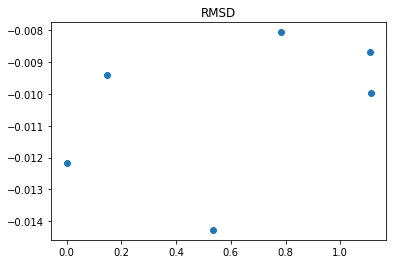

COc1cccc(CC(=O)N/N=C/c2ccc(O)cc2)c1
tensor(3.0611)


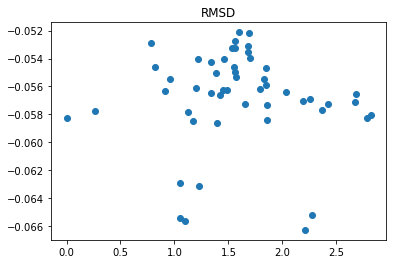

O=C(Nc1ccc(NC(=O)c2ccccn2)cc1)c1ccc(O)c([N+](=O)[O-])c1
tensor(1.4885)


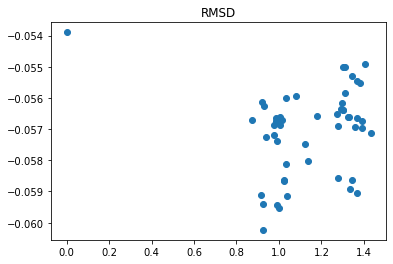

O=C1CCN(c2cccc([N+](=O)[O-])c2)C(=O)N1
tensor(1.2059)


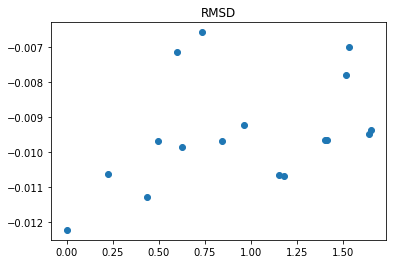

C=C(C)C1CCC2(C)CCCN=C2C1
tensor(7.5461)


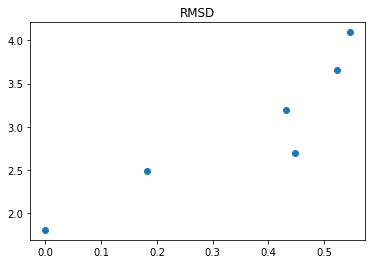

CC(=O)Nc1ccc2ccc3cccc4ccc1c2c34
tensor(0.6673)


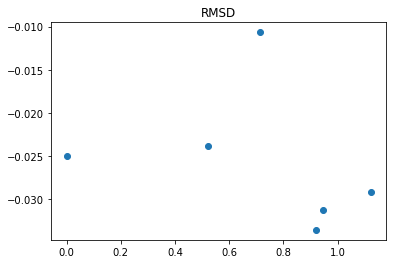

Nc1n[nH]c(-c2ccc(O)cc2)c1-c1ccc(O)cc1
tensor(0.4593)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([26, 1])) that is different to the input size (torch.Size([26])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


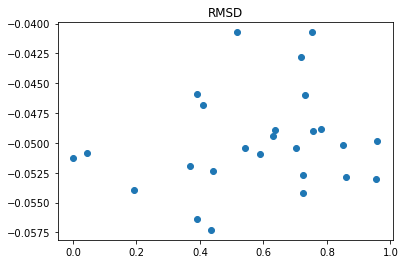

Cc1ncc(Cc2c(C(O)CO)sc(CCOP(=O)([O-])OP(=O)([O-])[O-])c2C)c(N)n1
tensor(3.5740)


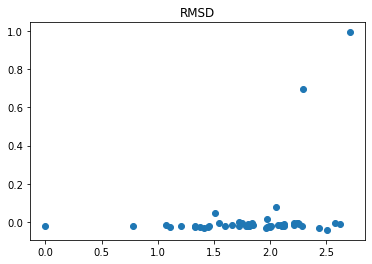

NS(=O)(=O)c1cc(Cl)sc1C(=O)[O-]
tensor(0.7153)


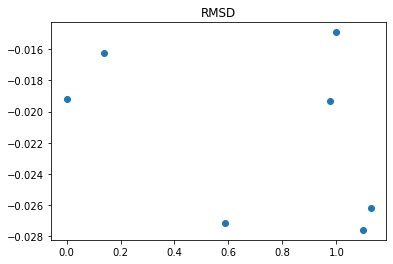

NC(=[NH2+])c1ccc2cc(NC(=O)Nc3ccccc3)ccc2c1
tensor(1.0828)


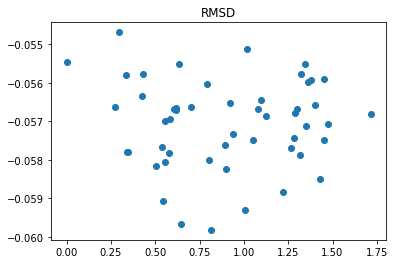

CC(C)CC(NC(=O)C(Cc1ccccc1)NP(=O)([O-])CNC(=O)OCc1ccccc1)C(=O)[O-]
tensor(9.8527)


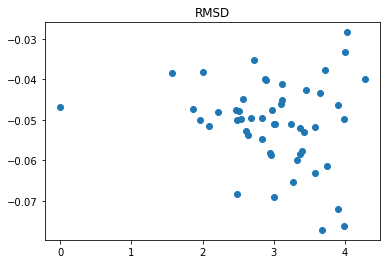

Cc1c(O)cccc1C(=O)NC(CSc1ccccc1)C(O)C[NH+]1CC2CCCCC2CC1C(=O)NC(C)(C)C
tensor(8.5555)


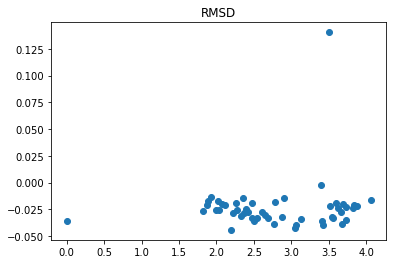

COc1ccc2ccc(C(N)=[NH2+])cc2c1OCC(N)=O
tensor(1.0378)


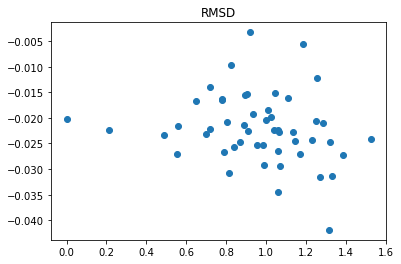

CN([O-])C(=O)CSC(c1ccccc1)P(=O)([O-])[O-]
tensor(2.6169)


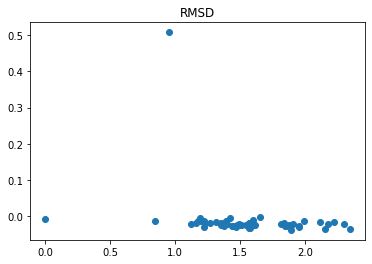

O=C([O-])c1ccc(-c2cc(=O)c3ccccc3o2)cc1
tensor(0.0126)


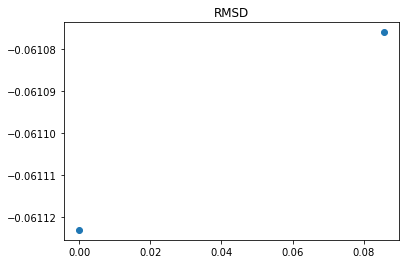

CN(C)c1ccc(-c2cc(=O)c3ccccc3o2)cc1
tensor(0.0157)


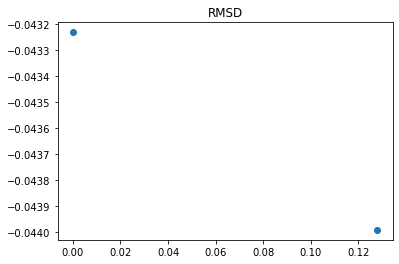

N#Cc1ccc(-c2cc(=O)c3ccccc3o2)cc1
tensor(0.0083)


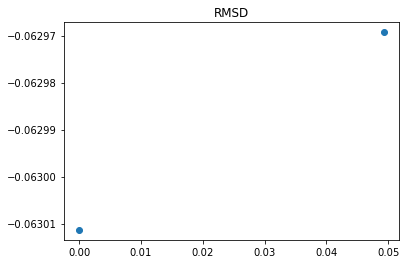

O=c1cc(-c2ccc([N+](=O)[O-])cc2)oc2ccccc12
tensor(0.1450)


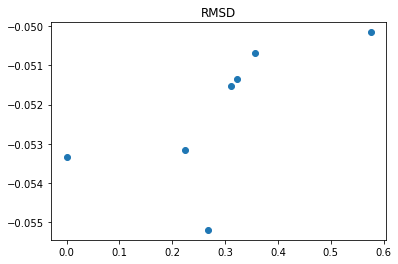

O=c1cc(-c2ccc(Cl)cc2)oc2ccccc12
tensor(0.0102)


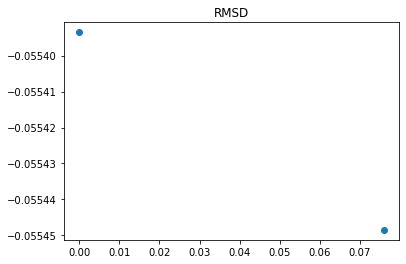

O=c1cc(-c2ccccc2)oc2ccc(F)cc12
tensor(0.0032)


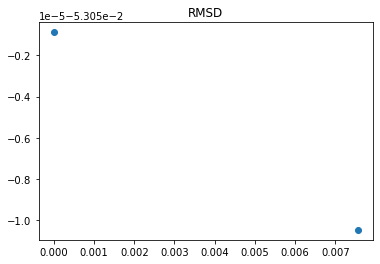

O=C(NC1(c2ccc(F)cc2)CC1)c1ccc2nc(NC3CCC(O)CC3)c3nccn3c2c1
tensor(2.9967)


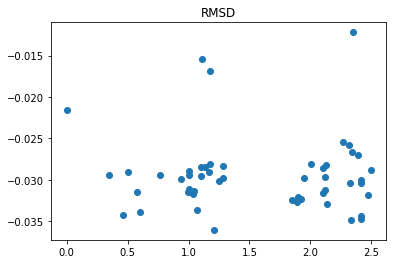

Nc1nc(-c2ccc(Cc3ccccc3)cc2)cs1
tensor(0.9346)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


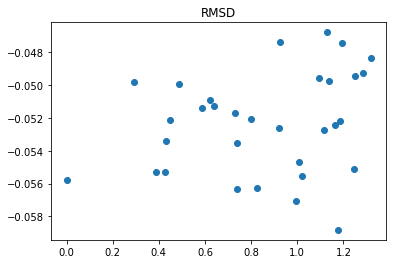

O=c1cc(-c2ccc3c(c2)OCO3)oc2ccccc12
tensor(0.7633)


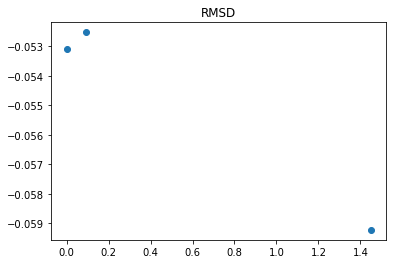

CCC(NC(=O)CCc1nc2ccccc2c(=O)[nH]1)c1ccccc1
tensor(2.4084)


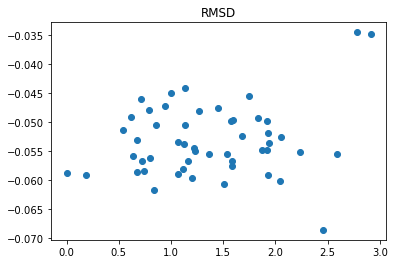

O=C(CCc1nc2ccccc2c(=O)[nH]1)NC(CO)Cc1ccccc1
tensor(3.5969)


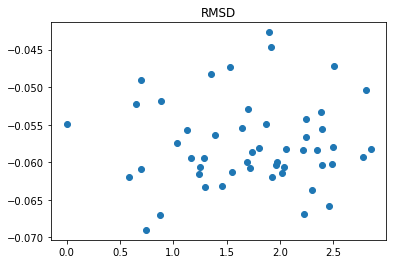

CC(NC(=O)CCc1nc2ccccc2c(=O)[nH]1)c1ccc(S(N)(=O)=O)cc1
tensor(2.2646)


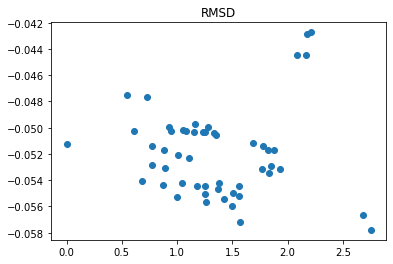

CC(NC(=O)CCc1nc2ccccc2c(=O)[nH]1)c1ccc(-n2ccnc2)cc1
tensor(2.6191)


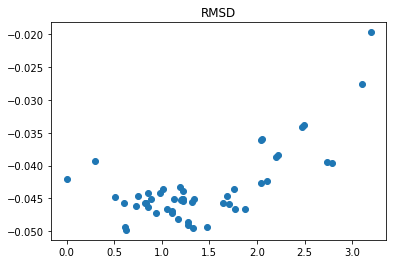

C[NH+]1CCN(C(=O)c2ccc(-c3cc(=O)c4ccccc4o3)cc2)CC1
tensor(1.9177)


/home/benoit/anaconda3/envs/GeoMol/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([35, 1])) that is different to the input size (torch.Size([35])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


KeyboardInterrupt: 

In [13]:
rmsds = []
pred_rmsds = []
rmsd_losses = []
for smiles, data_list in data_dict.items() :
    
    print(smiles)
    mol_rmsd = []
    mol_pred_rmsd = []
    loader = DataLoader(data_list, batch_size=24, shuffle=False)
    
    for batch in loader :
        batch = batch.to('cuda')
        rmsd_pred = litschnet(batch)
        mol_rmsd.extend(batch.rmsd.cpu().numpy())
        mol_pred_rmsd.extend(rmsd_pred.detach().cpu().numpy())
        
    rmsd_loss = F.mse_loss(torch.tensor(mol_rmsd), torch.tensor(mol_pred_rmsd))
    rmsd_losses.append(rmsd_loss.item())
    print(rmsd_loss)

    rmsds.extend(mol_rmsd)
    pred_rmsds.extend(mol_pred_rmsd)
    
    plt.scatter(mol_rmsd, mol_pred_rmsd)
    plt.title('RMSD')
    plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(rmsds, pred_rmsds)
plt.title('RMSD')
plt.xlabel('Bioactive RMSD')
plt.ylabel('Predicted RMSD')
plt.plot([0, 5], [0, 5], c='r')
plt.show()

In [ ]:
import seaborn as sns
pred_rmsds2 = [a[0] for a in pred_rmsds]
plt.figure(figsize=(10, 10))
sns.kdeplot(x=rmsds, y=pred_rmsds2)

In [ ]:
from sklearn.metrics import r2_score
r2_score(rmsds, pred_rmsds)

In [ ]:
def get_max_sim_to_train_dataset(mol, train_fps) :
    test_fp = AllChem.GetMorganFingerprint(mol, 2)
    sims = []
    for train_fp in train_fps :
        dice_sim = DataStructs.DiceSimilarity(test_fp, train_fp)
        sims.append(dice_sim)
    max_sim = max(sims)
    return max_sim

In [ ]:
from rdkit import DataStructs

In [ ]:
dataset = ConfEnsembleDataset(data_dir)
with open(os.path.join(data_dir, 'train_smiles_scaffold.txt'), 'r') as f :
    train_smiles = f.readlines()
    train_smiles = [smiles.strip() for smiles in train_smiles]
sdsupplier = Chem.rdmolfiles.SDMolSupplier(os.path.join(data_dir, 'platinum-dataset-2017-01-sdf', 'platinum_dataset_2017_01.sdf'))
platinum_mols = [mol for mol in sdsupplier]
platinum_smiles = [Chem.MolToSmiles(mol) for mol in platinum_mols]
train_indices = [i for i, data in enumerate(dataset) if Chem.MolToSmiles(data.mol) in train_smiles and Chem.MolToSmiles(data.mol) not in platinum_smiles]
train_subset = Subset(dataset, train_indices)

In [ ]:
data_dict = defaultdict(list)
for i, data in enumerate(platinum_dataset) :
    smiles = Chem.MolToSmiles(data.mol)
    if len(data_dict[smiles]) < 50 :
        data_dict[smiles].append(data)

all_ranks = []
accuracies = []
rmsd_losses = []
num_ha = []
max_sims = []
min_rmsds = []

train_smiles = set([Chem.MolToSmiles(data.mol) for data in train_subset])
train_mols = [Chem.MolFromSmiles(smiles) for smiles in train_smiles]
train_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in train_mols]

leaky_relu = torch.nn.LeakyReLU()
mseloss = torch.nn.MSELoss()
for smiles, data_list in data_dict.items() :
    
    mol_ys = []
    mol_preds = []
    loader = DataLoader(data_list, batch_size=16)
    for batch in loader :
        batch = batch.to('cuda')
        rmsd_preds = litschnet(batch)
        
        mol_ys.extend(batch.rmsd.cpu().numpy().tolist())
        rmsd_preds = rmsd_preds.detach().cpu().numpy().squeeze().tolist()
        if type(rmsd_preds) == float :
            rmsd_preds = [rmsd_preds]
        mol_preds.extend(rmsd_preds)
        
    rmsd_loss = mseloss(torch.tensor(mol_ys), torch.tensor(mol_preds))
        
    mol_ys = np.array(mol_ys)
    mol_preds = np.array(mol_preds)
        
    is_bioactive = mol_ys < 0.1

    rank = mol_preds.argsort().argsort()
    bioactive_ranks = rank[is_bioactive]
    
    bioactive_ranks = bioactive_ranks.tolist()
    if len(bioactive_ranks) and max(mol_ys) > 0.01 :
        accuracy = len(set(bioactive_ranks).intersection(set(range(len(bioactive_ranks))))) / len(bioactive_ranks)

        all_ranks.extend(bioactive_ranks)
        accuracies.append(accuracy)
        
        mol = Chem.MolFromSmiles(smiles)
        max_sim = get_max_sim_to_train_dataset(mol, train_fps)
        max_sims.append(max_sim)
        
        rmsd_losses.append(rmsd_loss.item())
        num_ha.append(mol.GetNumHeavyAtoms())
        
        generated_confs = mol_ys > 0.01
        generated_preds = mol_preds[generated_confs]
        min_rmsd = generated_preds.min()
        min_rmsds.append(min_rmsd)

In [ ]:
(np.array(min_rmsds) < 1).sum()

In [ ]:
(np.array(min_rmsds) > 1).sum()

In [ ]:
np.mean(accuracies)

In [ ]:
np.median(all_ranks)

In [ ]:
plt.figure(figsize=(5, 7))
plt.boxplot(all_ranks)

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(all_ranks, bins=49)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Counts of bioactive conformation ranks')
plt.savefig('Histogram_ranks', dpi=300)

In [ ]:
plt.scatter(accuracies, max_sims)

In [ ]:
plt.scatter(x=rmsd_losses, y=max_sims)
plt.xlim(0, 4)

In [ ]:
sns.kdeplot(x=rmsd_losses, y=max_sims)
plt.xlim(0, 3)

In [ ]:
plt.scatter(rmsd_losses, num_ha)
plt.xlim(0, 2)

In [ ]:
# test on ranking only generated conformations

In [ ]:
data_dict = defaultdict(list)
for i, data in enumerate(test_subset) :
    smiles = Chem.MolToSmiles(data.mol)
    data_dict[smiles].append(data)

accuracies = []

leaky_relu = torch.nn.LeakyReLU()
mseloss = torch.nn.MSELoss()
for smiles, data_list in data_dict.items() :
    
    mol_ys = []
    mol_preds = []
    loader = DataLoader(data_list, batch_size=16)
    for batch in loader :
        batch = batch.to('cuda')
        rmsd_preds = litschnet(batch)
        
        mol_ys.extend(batch.rmsd.cpu().numpy().tolist())
        rmsd_preds = rmsd_preds.detach().cpu().numpy().squeeze().tolist()
        if type(rmsd_preds) == float :
            rmsd_preds = [rmsd_preds]
        mol_preds.extend(rmsd_preds)
        
    mol_ys = np.array(mol_ys)
    mol_preds = np.array(mol_preds)
        
    is_bioactive = mol_ys == 0

    mol_ys_generated = mol_ys[~is_bioactive]
    mol_preds_generated = mol_preds[~is_bioactive]
    
    real_rank = mol_ys_generated.argsort().argsort()
    predicted_rank = mol_preds_generated.argsort().argsort()
    if max(mol_ys) > 0 :
        accuracies.append(real_rank[0] == predicted_rank[0])

In [ ]:
np.array(accuracies).mean()